In [4]:
import matplotlib.image as img
import matplotlib.pyplot as plt

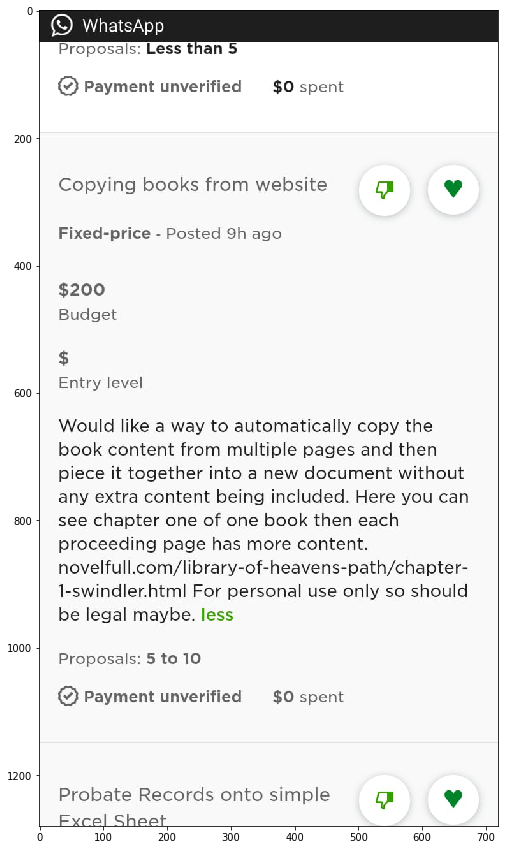

In [14]:
v=img.imread("task.jpg")
plt.figure(figsize=(15,15))
plt.imshow(v)


# So task is to webscrape chapters of book on  website

### website link <br>
<a>www.novelfull.com/library-of-heavens-path/chapter-1-swindler.html</a><br>

at the end but before <b>.html</b> we have chapter name so we need all chapters name<br>
1. so we need to first  scrape chapters name

In [40]:
# from IPython.display import IFrame
# display(IFrame(src='http://novelfull.com/library-of-heavens-path/chapter-1-swindler.html',width=1000,height=500))


In [42]:
import requests
from bs4 import BeautifulSoup as bsup
taken=requests.get('http://novelfull.com/index.php/library-of-heavens-path.html?page=1&per-page=50')

In [44]:
html=bsup(taken.text,"html.parser")
html


<!DOCTYPE html>
<html lang="en-US"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, height=device-height, initial-scale=1.0, user-scalable=0, minimum-scale=1.0, maximum-scale=1.0" name="viewport"/><meta content="_csrf" name="csrf-param"/><meta content="NjM2NGQzZjBmNDk1YjZhYjlkY2Y4ZDNiNWM2ZTBiMDEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA==" name="csrf-token"/><!-- TODO: Meta --><meta content="Read Library of Heaven’s Path online free - NovelFull" name="title"/><meta content="Read Library of Heaven’s Path online free from your Mobile, Table, PC...Library of Heaven’s Path is genre Comedy novel by author Heng Sao Tian Ya" name="description"/><meta content="http://novelfull.com/uploads/thumbs/library-of-heavens-path-d6292facbc-6d010b89b8fcb6a6cfa04853f099ea20.jpg" name="image"/><meta content="Library of Heaven’s Path,Library of Heaven’s Path full chapters,Library of Heaven’s P

In [173]:
import re
ul=html.find('ul',{'class':'list-chapter'})
span=ul.find_all('span',{'class':"chapter-text"})
for items in span:
#     if items.text.__contains__('Chapter'):
        print(items.text)


Chapter 1: Swindler
Chapter 2: Shameless
Chapter 3: Imperfections in Heaven's Path
Chapter 4: Slapping Face
Chapter 5: Young Mistress
Chapter 6: What Did You Do To Our Young Mistress
Chapter 7: You Were Dumped Before
Chapter 8: I Am That Trash
Chapter 9: Bet
Chapter 10: Going Against the Bet
Chapter 11: Begging for Mercy
Chapter 12: Emperor Bloodline
Chapter 13: Shameless Student
Chapter 14: Cultivation Technique
Chapter 15: Heaven's Path Divine Art
Chapter 16: Cleansing Muscles and Bones
Chapter 17: Assassination
Chapter 18: Scammed
Chapter 19: Framing
Chapter 20: Wang Ying's Shock
Chapter 21: Zephyr Acupuncture
Chapter 22: The Reason Behind Zhao Ya's Illness
Chapter 23: Troublemaker
Chapter 24: Throw Him Out
Chapter 25: Looking for Trouble


###  Now we have got 1st page chapter we can get all chapter 
now we will try to move to second page and repeat the above process<br>


In [125]:
bottom_bar=html.find_all('a',{'data-page':re.compile("[0-9]")})
bottom_bar

[<a data-page="0" href="/index.php/library-of-heavens-path.html?page=1&amp;per-page=50">1</a>,
 <a data-page="1" href="/index.php/library-of-heavens-path.html?page=2&amp;per-page=50">2</a>,
 <a data-page="2" href="/index.php/library-of-heavens-path.html?page=3&amp;per-page=50">3</a>,
 <a data-page="3" href="/index.php/library-of-heavens-path.html?page=4&amp;per-page=50">4</a>,
 <a data-page="4" href="/index.php/library-of-heavens-path.html?page=5&amp;per-page=50">5</a>,
 <a data-page="5" href="/index.php/library-of-heavens-path.html?page=6&amp;per-page=50">6</a>,
 <a data-page="6" href="/index.php/library-of-heavens-path.html?page=7&amp;per-page=50">7</a>,
 <a data-page="1" href="/index.php/library-of-heavens-path.html?page=2&amp;per-page=50">&gt;</a>,
 <a data-page="41" href="/index.php/library-of-heavens-path.html?page=42&amp;per-page=50">Last »</a>]

In [142]:
last_page=int(bottom_bar[-1].get('data-page'))+1
last_page

42

In [276]:

def scraping(name='library of heavens path',start_page=1,stop_page=41):
    name=name.lower().replace(' ','-')
    l=[]
    para={}
    print(f"book title: {name}\nfrom web-page({start_page}) to web-page ({stop_page})\nlisting all chapters name")
    for i in range(start_page,stop_page+1):
        taken=requests.get(f"http://novelfull.com/index.php/{name}.html?page={i}&per-page=50")
        html=bsup(taken.text,"html.parser")
        html
        ul=html.find('ul',{'class':'list-chapter'})
        span=ul.find_all('span',{'class':"chapter-text"})
        for items in span:
            print(items.text)
            l.append(items.text)
            print(items)
            a=ul.find('a',{'title':l[-1]})
            print('aaa',a)
            print(a.get('href'))

#             chapter=item.text.lower().replace("\'",'').replace(' ','-').replace(r'!','').replace('\"','').replace(':','').replace('?','').replace('(','').replace(')','')
#             chapterr=re.sub(r"[\'!?:\(\)\"]",'',single.lower()).replace(' ','-')
#             f=f+1 if chapter!=chapterr else None
    
            
#             print(single,chapter,chapterr,chapter==chapterr,sep='\n',end='\n----------------\n')
            link='http://novelfull.com'+a.get('href')
            taken=requests.get(link)
            html=bsup(taken.text,"html.parser")
            html
            div=html.find('div',{'id':"chapter-content"})
            p=div.find_all('p')
            print(p)
            para[f'{items.text}']=p
        
    print("f :",f)
    return para,l


In [277]:
scraping()

book title: library-of-heavens-path
from web-page(1) to web-page (41)
listing all chapters name
Chapter 1: Swindler
<span class="chapter-text">Chapter 1: Swindler</span>
aaa <a href="/library-of-heavens-path/chapter-1-swindler.html" title="Chapter 1: Swindler"><span class="chapter-text">Chapter 1: Swindler</span></a>
/library-of-heavens-path/chapter-1-swindler.html
[<p></p>, <p>Chapter 1: Swindler </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Swindler! Great swindler!"</p>, <p>An enraged roar can be heard and the sound of footsteps on a bluestone pavement by someone escaping could be heard.</p>, <p>Zhang Xuan stretches out his both hands helpless, "I am not a swindler, I am a teacher of the academy... I only want to make you my student! Besides that, do you have to add a 'great' while saying that I am a swindler? You make it sound as though I am some unpardonable criminal..."</p>, <p>After he finishes his muttering, he recalls the words of the director, "This 

[<p></p>, <p>Chapter 2: Shameless </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>After looking around for awhile longer, Zhang Xuan realizes that all of the books in the library are just like the moon reflected in the water, it is impossible to retrieve them from the shelves. Thus, he loses interest and his consciousness retreats from his mind.</p>, <p>"Time to eat lunch. After lunch, I will think of a way to coax another two more."</p>, <p>Looking out the window, it seems to be around noon. Out of the 18 students who came by in the morning, he only managed to get one of them to join him. His acceptance rate is really quite low. He can't continue at this pace in the afternoon. No matter what, he is a transcender. If he is unable to dupe those from the ancient era, how could he proudly say that he came from a world in the age of information?</p>, <p>Stretching his back, he walks out of the lecture hall towards the canteen.</p>, <p>Just like the high schools from 

[<p></p>, <p>Chapter 3: Imperfections in Heaven's Path </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"A live battle between teachers on offering pointers?"</p>, <p>Zhang Xuan's face darkens.</p>, <p>Although he has inherited the memories of the previous Zhang Xuan, he has yet to organize the information in his head. At most, he can only make sense out of the different realms in cultivation. If it is on mistakes of cultivation, even the previous Zhang Xuan could only smoke through it, needless to say, the current Zhang Xuan!</p>, <p>Guiding others... He is definitely inferior to this Teacher Cao!</p>, <p>If they were to really compete, he would surely lose!</p>, <p>"Why? Are you scared to accept the challenge? It is clearly written in the rules that teachers can compete with one another so as to allow the student to make a better choice. This isn't considered as poaching!" Cao Xiong chuckles. He flings his sleeves and a serene and scholarly look appears on him.<

[<p></p>, <p>Chapter 4: Slapping Face </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"I..."</p>, <p>The tremor from the Library of Heaven's Path just now caused his attention to be concentrated in his mind and he is still in a dazed state. Furthermore, he doesn't even know what the other person's punching routine is, so how the hell could he guide him!</p>, <p>"Teacher Zhang, please correct my flaws!"</p>, <p>Liu Yang steps forward and bends over completely.</p>, <p>By one side, Wang Ying blinks her eyes. She wants to see how this 'expert' she has just met would guide him.</p>, <p>"Keng!"</p>, <p>Everyone's gaze concentrates on him. If he doesn't speak soon, he will only end in embarrassment. Just as Zhang Xuan is about to spout bullshit, he suddenly remembers Liu Yang's flaws that were recorded in the book in the library.</p>, <p>He doesn't know whether what is recorded on it is true or not. However, given the situation, it is probably impossible for him to mak

[<p></p>, <p>Chapter 5: Young Mistress </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Have you heard? Cao Xiong laoshi had just competed with the academy's number one teacher from the bottom, Teacher Zhang Xuan!"</p>, <p>"They competed? Then, won't Zhang Xuan laoshi lose for sure?"</p>, <p>"Unexpectedly, that wasn't so. Zhang Xuan laoshi won! He casually guided a student and made his strength increase by one fold!"</p>, <p>"Increase by one fold? In his first guidance? Even Lu Xun laoshi wouldn't be capable of doing that! Are you for real?"</p>, <p>"A lot of people witnessed it for themselves, so how could it not be real?"</p>, <p>......</p>, <p>Those who witnessed the competition in the canteen are discussing over it excitedly.</p>, <p>"For the student's strength to increase by one fold in the first guidance?" Zhao Ya scoffs. "It is definitely just luck!"</p>, <p>Baiyu City is the third biggest city in the Tianxuan Kingdom and Zhao Ya is the daughter of its Cit

[<p></p>, <p>Chapter 6: What Did You Do To Our Young Mistress </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Finishing what that has to be done, Zhao Ya is ready to see the fellow before her make an embarrassment out of himself.</p>, <p>Suddenly, an idea comes to mind and a Record Crystal appears in her sleeves.</p>, <p>Record Crystal, it is an object capable of recording video and audio in its surrounding. She intends to use it as 'evidence' of Zhang Xuan's wrongdoing! This way, he would be unable to talk his way out of it when she spreads word about his crime.</p>, <p>"Let's see how you would be humiliated then. To think that you would dream of competing with Lu Xun laoshi, dream on!"</p>, <p>Upon the thought that she would be able to grab hold of 'evidence' on him soon to punish him and vent her frustration, Zhao Ya's eyes glitter and she almost failed to control her laughter. Suppressing her happiness, just as she was waiting to see what nonsense the other p

[<p></p>, <p></p>, <p>Chapter 7: You Were Dumped Before</p>, <p><strong>Translator:</strong>StarveCleric<strong></strong></p>, <p><strong>Editor:</strong>GaiaNova, Thaddpole&amp;Tortex</p>, <p>“What did I do?”</p>, <p>Upon seeing at the other party seethe with rage, Zhang Xuan was speechless.</p>, <p>Wasn’t this misunderstanding getting a little out of hand!</p>, <p>However, he could understand that it was natural for others to think that way. After all, without guiding her cultivation, he was able to make their young mistress willingly acknowledge him as her master and she even blushed upon bringing up the subject. What’s more, the Record Crystal had been shattered. That’s obvious an act of evidence destroying…</p>, <p>All of these showed that there’s something amiss with the situation.</p>, <p>Zhang Xuan was immediately labeled as a weird uncle, a sex maniac, a shameless teacher and other similar titles.</p>, <p>“Uncle Yao, what are you thinking? If you are going to continue behaving

[<p></p>, <p>Chapter 8: I Am That Trash </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Un?"</p>, <p>Zheng Yang stares blankly before his face turns red and darkens.</p>, <p>"I once had a crush on a girl. Then... I was humiliated by her. But this has nothing to do with teacher!"</p>, <p>He once had a crush on a girl and he had once confessed to her excitedly. However, he was humiliated heartlessly by the other party and he felt ashamed of it. He has kept this incident a secret such that not even Mo Xiao is aware of it. How did this teacher know of this?</p>, <p>"Is that for real? Zheng Yang, why didn't you tell me that you got humiliated by someone? Who is it?" Hearing him admit to it, Mo Xiao is surprised and hurriedly asks him.</p>, <p>"I will tell you about it later!" Zheng Yang shakes his head, refusing to say any more about it here. He looks at the teacher before him and says, "Teacher, this is my private affair. I have no idea how you could have knew this,

[<p></p>, <p>Chapter 9: Bet </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>There are many rumors regarding that useless teacher. Before even coming to the academy, they have heard so much about him that callouses were growing on their ears.</p>, <p>They say that he is skilled in nothing and that he had been misguiding disciples!</p>, <p>They say that he doesn't know how to cultivate and he doesn't know martial arts at all...</p>, <p>All in all, all kinds of slander there is!</p>, <p>As long as one is a student, it is best to stay as far away as possible from him. Do not mess with this fellow, otherwise going berserk is just a small matter at hand. At worse, they may even die in his hands!</p>, <p>When both brothers came to the academy to seek a teacher, they have also heard of such rumors. All along, they have been proceeding carefully but never in their dreams would they imagine that this unworldly and incredible expert is that legendary trash!</p>, <p>"Teacher

[<p></p>, <p>Chapter 10: Going Against the Bet </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Alright, since you said that you accepted four students, bring them here now so that can we verify your claim. Or, you do want to just present your face now for us to slap?"</p>, <p>Looking at the teacher who is first from the bottom arrogantly betting with the four of them, Qian Biao smirks coldly.</p>, <p>"Bring the students here?" Zhang Xuan shakes his head. "You are all teachers of the logistics branch, it can't be that you don't even know the simplest thing! It is easy to verify whether I recruited four students or not. As long as students were to claim ownership of my token, their personal information will automatically appear in the Education Bureau. As long as we verify it with the Education Bureau, the truth would be clear for all to see. After all, the Education Bureau can't possibly be working with me just to lie to you all!"</p>, <p>As long as a student had

[<p></p>, <p>In the Fighter 4-dan Pigu realm, one's muscles, bones and even skins will be tempered, causing one's strength to soar rapidly!</p>, <p>The difference between it and Zhenqi realm is like heaven to earth!</p>, <p>Yet, the brat in Zhenqi realm is able to cause a Pigu realm expert to vomit blood with just a single slap. Everyone found the sight unbelievable.</p>, <p>Besides, wasn't this fellow the last in the sparring during the Teacher Qualification Examination? Why... is he so strong now?</p>, <p>"It must just be a coincidence, do not fear him!"</p>, <p>Qian Biao howls.</p>, <p>One of the teachers also agrees with what Qian Biao says and charges over.</p>, <p>Just like Li Yuan, he has reached Pigu realm advanced stage. His muscles are just like metal tendons and his skin is just like a metal plate, giving an impression of indestructibility.</p>, <p>"You shall fall to the ground!"</p>, <p>Stepping forward, this teacher lifts his eyebrow and prepares to smack him with his palm

[<p></p>, <p>Chapter 12: Emperor Bloodline </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>An hour later, Zhang Xuan walks out from the Logistics Branch and his eyes twinkle in excitement. </p>, <p>If it had been his previous self, he would have ended up being taken advantage of today. However, with the Library of Heaven’s Path, his life took a complete turn towards another direction. </p>, <p>“Perhaps, it is a blessing for me to transcend over! This kind of exciting life is what I hope for!” </p>, <p>Zhang Xuan clenches his fist and exhales a breath of air. </p>, <p>In his previous life, he was only a librarian living a plain and simple life that only rotates around the library and his home. Even if he were to continue on like that, he would only continue claiming his salary and continue with his aimless life. However, things are different here. With a great gift package known as the Library of Heaven’s Path, perhaps he would be able to walk further and become s

[<p></p>, <p>Chapter 13: Shameless Student </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Upon hearing those words, the ice-cold Shen Bi Ru smiles faintly.</p>, <p>Although this roundabout manner of insulting another means nothing on Earth, it is an incomparably novel concept here.</p>, <p>Seeing the expression on his goddess, Shang Bin feels that he is being mocked. His face flushes in a moment and pales in the next. However, in front of the female goddess, he is determined to maintain uphold decorum, thus he doesn't dare to attack Zhang Xuan directly.</p>, <p>"Why? Is there something wrong with my words?" Suppressing his anger, Shang Bin sneers. "There isn't a single person who doesn't know what your standards are in the entire academy! This fatty came to my classroom previously. Fat like a pig, he only knows how to defend and nothing else! The strength behind his fist is only a mere 15 kilograms! He must be either the first or second from the bottom in the en

[<p></p>, <p>Chapter 14: Cultivation Technique </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>It wasn’t easy for Zhang Xuan arrange everything properly with fatty and send him away. Only then did he realize that the sun is already setting in the west and it is about to turn dark soon. </p>, <p>“Looks like I only have five students!” </p>, <p>He shakes his head. </p>, <p>Today is the last day to recruit students. Judging from the current time, it is probably the end of the recruitment. </p>, <p>Initially, he thought that he wouldn’t even recruit a student. He didn’t expect that he would end up pulling five students in. For a teacher who scored the worst in the Teacher Qualification Examination, it isn’t a bad result. </p>, <p>Closing the doors to the classroom, Zhang Xuan follows the path back to his room based on his memory. </p>, <p>As a teacher of the academy, he has a dormitory room of his own. However, it is only a small room of around a dozen meter square l

[<p></p>, <p>Chapter 15: Heaven's Path Divine Art </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Needless to say Hongtian Academy, even those top sects might not even have god or saint cultivation technique. Besides, even they have it, it is hidden deep inside the sect and normal people would be unable to obtain it. </p>, <p>What he wants to do is to create such a skill so that his training would be more efficient so as to hasten the rate of the rise of his cultivation by leaps and bounds! </p>, <p>“I don’t have any 4-dan cultivation method. Let me go to the Teacher Compendium Pavilion to take a look!” </p>, <p>Practicing the Hongtian Nine Dan Formula, the cultivator can only retrieve the secret manual for the next realm after breaking through their current realm. At this moment, he only has the cultivation method for 3-dan. He has yet to see the one for 4-dan. </p>, <p>Walking out, the sun hasn’t set for too long and there are still quite a few passers-by on th

[<p></p>, <p>Chapter 16: Cleansing Muscles and Bones </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Let me give it a try!"</p>, <p>After obtaining a cultivation technique without any flaws, Zhang Xuan doesn't hesitate to follow the method recorded in the Heaven's Path Divine Art and starts to meditate.</p>, <p>The pores on his body widens as he absorbs spirit energy from the air into his body.</p>, <p>Fighter 4-dan.</p>, <p>1-dan Juxi, 2-dan Dantian, 3-dan Zhenqi, 4-dan Pigu.</p>, <p>Juxi realm, cultivators would learn innate breathing and sensing of spirit in the air. Also, they would gain the ability to look into their body and control the flow of spirit energy in their body with their mind.</p>, <p>Dantian realm, the opening up of a cultivator's dantian to allow it to hold spirit energy as well as to reform his body, turning a normal human into a true Fighter.</p>, <p>Zhenqi realm, the gathering of the spirit energy in the dantian to create zhenqi.</p>, <p>P

[<p></p>, <p>Chapter 17: Assassination </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>So what if the parents ask about it? You are the lowest level teacher, it is normal that you can’t answer their questions! </p>, <p>So, in order to put on a show, you specially came here to view the 5-dan cultivation technique. If this isn’t being hypocritical and vain, what is it? </p>, <p>“Tomorrow, I will look for the principal and have this unrealistic fellow expelled!” </p>, <p>Scoffing coldly in his heart, Old Mo’s mind is resolute. </p>, <p>Leaving such a vain fellow who doesn’t cultivate properly in the academy will just sully the culture of the academy! </p>, <p>Zhang Xuan doesn’t know that the two meetings with Elder Mo have placed him in the expulsion list of the latter. If he were to know, he would have no idea whether he should burst into laughter or weep in tears. </p>, <p>Those words that he said are only excuses! </p>, <p>In reality, his cultivation has reached 

[<p></p>, <p>Chapter 18: Scammed </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"You want to kill me?"</p>, <p>Seeing the other party whipping out a knife, Zhang Xuan raise his eyebrows.</p>, <p>It is fortunate that he has been cultivating and not sleeping. Otherwise, when the other party approaches him silently like this, won't he be killed for sure?</p>, <p>"Let me first ascertain who this fellow is!"</p>, <p>Zhang Xuan knows that conducting this kind of night assault would mean that he is not an individual. Perhaps, there could even be an organization behind him. If he doesn't accurately identify the one trying to murder him, even if he were to kill this assassin, there might be more coming for his life in the future. If he doesn't dig out the organization behind the assassination, he wouldn't have to dream of sleeping peacefully anymore.</p>, <p>"Who is it?"</p>, <p>Just when Zhang Xuan is pondering how he should force the man before him to confess the organ

[<p></p>, <p>Chapter 19: Framing </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>After a violent thrashing, Zhang Xuan finally feels the rage in his heart subsiding slightly.</p>, <p>Lowering his head to take a look, Yao Han's mask has already fallen off in the midst of the bashing and his face is warped from taking his hits. Probably, even his own mother would be unable to recognize him in his current state.</p>, <p>"Keng..."</p>, <p>Now that anger is no longer clouding his mind, Zhang Xuan immediately grasps his current situation. "This fellow is the butler of Baiyu City Lord, as well as the uncle of my disciple. It is still okay for me to teach him a lesson, but I should not kill him by any means."</p>, <p>No matter what, this fellow is still Zhao Ya's Uncle Yao. If Zhang Xuan were to really kill him, won't the disciple he just admitted go to waste?</p>, <p>There would surely be zero possibility for reconciliation if that were to happen!</p>, <p>Besides, Baiyu

[<p></p>, <p>Chapter 20: Wang Ying's Shock </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>After hearing that the young mistress has acknowledged Zhang Xuan as her master, Yao Han rushes here furiously, oblivious to the fact that Zhang Xuan has already accepted several students.</p>, <p>He had just let out word that the other party would be unable to recruit a second student other than the young mistress but in the next moment, he meets Wang Ying and the rest. He feels as though he was slapped in the face in public. His face immediately darkens.</p>, <p>"Teacher!" Zhao Ya also feels a burning sensation on her face and she feels tempted to find a burrow to hide in.</p>, <p>"You are alright?"</p>, <p>A short moment later, Yao Han recovers and stares in confusion at Zhang Xuan.</p>, <p>That fellow yesterday was so brutal to him, so he thought that even if Zhang Xuan isn't reduced to a pig head, he would at the very least be crippled. So why... does he seem to be ful

[<p></p>, <p>Chapter 21: Zephyr Acupuncture </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Even though she had no problem walking normally with her leg injury, she faced great difficulty in her training. It feels as though poison has soaked into her bones. In the past half year, there doesn't seem to be a single day she spent in happiness.</p>, <p>Precisely so, she became the current her who is a little fearful towards stranger, as well as reticent.</p>, <p>Initially, she thought that her injury would stay with her for her entire life. Yet, she didn't expect that the Zhang Xuan laoshi, whom everyone thought was trash, would say that 'It is a small matter!'. She found it hard to believe what her ears are hearing.</p>, <p>If it was a moment ago, she might have thought that Zhang Xuan was simply bragging. However, from the instant he pointed out the reason behind her injury, expectation starts to well up in her.</p>, <p>"The reason why I had you to come into this r

[<p></p>, <p>Chapter 22: The Reason Behind Zhao Ya's Illness </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Liu Yang might have been guided by Zhang Xuan previously, but he doesn't believe that the latter is capable. Rather, he thought that Zhang Xuan simply got lucky.</p>, <p>After all, asking someone to use a different hand to execute a punching routine doesn't involve much skill.</p>, <p>Thus, from the depths of his heart, he still looks down on the teacher in front of him.</p>, <p>"Teacher!"</p>, <p>Walking into the room, he cups his hand and bows slightly to Zhang Xuan, although his tone isn't very respectful.</p>, <p>"I have seen you execute your battle techniques before!"</p>, <p>Seemingly oblivious to his disrespect, Zhang Xuan continues, "To be able to train Soaring Flower Fist to the rookie level and Dragon Inch Fist to the expert level, not bad!"</p>, <p>"What? You... How did you know that I am trained in... Dragon Inch Fist?"</p>, <p>Hearing those wo

[<p></p>, <p>Chapter 23: Troublemaker </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Tianxuan City is the capital of Tianxuan Kingdom. To be capable of becoming one of the four great families of the city, the prowess of the Wang family is one to behold.</p>, <p>Even the principal of the Hongtian Academy would have to spare some face for such a powerful family. To think that of all teachers, Wang Ying would choose to acknowledge a fellow who has scored zero in the Teacher Qualification Examination. That is an insult!</p>, <p>A massive insult!</p>, <p>Even though other people might not be aware of the affairs shrouding Zhang Xuan, as a student of the academy, Wang Tao has heard a lot about him. He has once misguided a student, causing his cultivation to go berserk, thus sullying the reputation of the teachers!</p>, <p>This person is the topic of discussion and target of mockery over a meal or tea with his peers. Yet, never in his imaginations would he expect his y

[<p></p>, <p>Chapter 24: Throw Him Out </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Impossible..."</p>, <p>Wang Tao is also in a state of disbelief.</p>, <p>Before he came, he had made sure to look into Zhang Xuan's strength. Back then, the information he got was that he was only Fighter 3-dan Zhenqi realm, a weakling!</p>, <p>How could he possibly stop his attack with just two fingers?</p>, <p>In order to achieve such a feat, not only must one possess sufficient strength, he must also be precise in his timing, control over his strength, his positioning and many other factors. If there were to be a slight discrepancy in his judgment, it is possible for his fingers to be severed and he would be severely injured!</p>, <p>The other teachers, or perhaps even the Pixue realm elders, would be unable to achieve such a feat! Yet, a fellow who is reputed to be trash...</p>, <p>Impossible!</p>, <p>"Coincidence! It must be a coincidence!"</p>, <p>Such a thought pops int

[<p></p>, <p>Chapter 25: Looking for Trouble </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Shang shaoye!"</p>, <p>Shaoye -&gt; Young master</p>, <p>Cao Xiong says respectfully.</p>, <p>"Cao Xiong laoshi, you were looking for me?" Shang Bin looks over with a puzzled expression.</p>, <p>They might be both teachers of the academy and they often bump into one another, but their relationship is still stuck at the level of an acquaintance.</p>, <p>"Indeed. I have something which I would have to trouble Shang shaoye with!" Cao Xiong hesitates for a moment before speaking.</p>, <p>"As long as it is something I could help you with, I will try my best!" Cao Xiong replies.</p>, <p>As the grandson of Elder Shang Chen, there are quite a few teachers who come looking for him for favors every day and he has long gotten used to it.</p>, <p>"Is that so? I... Yesterday, I took much difficulty in admitting a student under my tutelage, but he was snatched away by another teacher 

Chapter 51: Heaven's Path Golden Body
<span class="chapter-text">Chapter 51: Heaven's Path Golden Body</span>
aaa <a href="/library-of-heavens-path/chapter-51-heavens-path-golden-body.html" title="Chapter 51: Heaven's Path Golden Body"><span class="chapter-text">Chapter 51: Heaven's Path Golden Body</span></a>
/library-of-heavens-path/chapter-51-heavens-path-golden-body.html
[<p></p>, <p>Chapter 51: Heaven's Path Golden Body </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>By the corner, books are stacked densely on the bookshelves and they are all on cultivation techniques and related subjects. There are manuals on Fighter 1-dan, 2-dan, 3-dan and 4-dan. Similar to Hongtian Academy, the higher the tier is, the less the number of books there are on it. As for Fighter 6-dan manuals, there are only about ten books or so on it.</p>, <p>"The number of books may be few, but it beats having none at all!"</p>, <p>Initially, he thought that it would be like the Compendium 

[<p></p>, <p>Chapter 52: Master Lu Chen on the Verge of Tears </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"Ah?"</p>, <p>Zhang Xuan is taken aback.</p>, <p>He didn't turn around that quickly, neither did he use that much strength. Why did Master Lu Chen fly backward?</p>, <p>Could he be jumping around for fun?</p>, <p>"Master..."</p>, <p>He rushes forward to help the other party up. He places his palm on the back of Master Lu Chen's body to support him up.</p>, <p>"I'm fine..."</p>, <p>Sou!</p>, <p>Before his words can escape his mouth, Master Lu Chen feels his entire body go weightless as he somersaults forward. His head knocks into another bookshelf, causing his face to be showered with books.</p>, <p>"I..."</p>, <p>The master is on the verge of tears.</p>, <p>Are you playing with me? Must you use so much strength to help me up?</p>, <p>"Master..."</p>, <p>Seeing his current state, Zhang Xuan rushes forward to continue helping him up. Upon seeing the sight, 

[<p></p>, <p>Chapter 53: Bai Xun's Breakdown </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"This..."</p>, <p>The crowd stare at one another, dumbfounded.</p>, <p>This is Master Lu Chen, the emperor's tutor. Who is the one who dared lay his hands on him, beating him into such a state?</p>, <p>Besides, didn't you two go to the study? Why did he return... like this?</p>, <p>Could it be that they didn't go to the study to read books, but to... fight?</p>, <p>The elegant Master Lu Chen has such interest?</p>, <p>"I'm fine..." Master Lu Chen waves his hands awkwardly.</p>, <p>After all, he can't possibly say that... Zhang Xuan has just achieved a breakthrough and unintentionally injured him due to lacking control of his strength.</p>, <p>He also knows that it will be difficult to explain. Thus, Master Lu Chen walks over to the main seat, then turns to look at Uncle Cheng and says, "Ah Cheng, go and fetch a Strength Measuring Rock Pillar over!"</p>, <p>He is a master 

[<p></p>, <p>Chapter 54: Hongjin Pearl Fruit </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Who is this? </p>, <p>The sole son of the number one authoritative subject of Tianxuan Kingdom, Zhennan Wang! </p>, <p>For him to be crying Zhang Xuan as his grandpa? Surely I am hearing things… </p>, <p>Uncle Cheng only feels his vision blurring before him and almost loses consciousness. </p>, <p>I just stepped away for a moment to grab a Strength Measuring Rock Pillar… What happened? Can anyone enlighten me… </p>, <p>“Cough cough, alright. Little brother Zhang Xuan, there are plenty of opportunities for the both of you to spar in the future. Bai Xun is injured and needs to regulate his cultivation for awhile! Anyway, since the Strength Measuring Rock Pillar is already here, I think it would be best for you to try out your strength first!” </p>, <p>Sensing the awkwardness of the situation, Master Lu Chen quickly steps in. </p>, <p>“Alright!” Seeing that Bai Xun is unwill

[<p></p>, <p>Chapter 55: Surrounded (1) </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Chatting for a moment longer, Zhang Xuan was questioned on where he obtained the Hongjin Pearl Fruit from. He casually replies that he got it from the market, causing Master Lu Chen and the rest to exclaim at his fortune.</p>, <p>"Right, brother Zhang Xuan, are you a local or..." Lu Chen asks.</p>, <p>"I am a teacher at Hongtian Academy!" Zhang Xuan replies.</p>, <p>"No wonder you possess such strength and a deep understanding towards painting!" Master Lu Chen praises him. He turns around to Huang Yu and Bai Xun who are sitting by the side and says, "Painting can mold a person's personality and train their character. Don't let fighting and killing occupy your mind all day long! Since brother Zhang Xuan is a teacher of the academy, go and visit him to learn from him whenever the both of you are free. I will consider giving the person who learns a thing or two from him a pass an

[<p></p>, <p>Chapter 56: Surrounded (2) </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Surrounded (2) </p>, <p>“So it seems that he isn’t weak, no wonder he is so arrogant!” </p>, <p>Seeing ‘Number Four‘ being sent flying by a single palm, Master Mo Yang freezes for a moment before his expression turns even more savage. Waving his hands grandly, as though he is in control of the entire situation, he says, “However, your luck ends here!” </p>, <p>After which, he turns to look at the artifact dealer by the side and says, “End it fast. We still have matters to attend to!” </p>, <p>“Un!” </p>, <p>The artifact dealer nods his head and advances forward. </p>, <p>Boom! </p>, <p>Before he even strikes, he emanates an aura from his body. It is similar to the mountains and the oceans, immeasurable. If one were to close their eyes, they could clearly feel ten acupoints in the other party’s body absorbing and exuding spiritual energy, each of them bright as though the stars

[<p></p>, <p>Chapter 57: Storage Ring </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>"You won't get away that easily!"</p>, <p>This fellow had Zhang Xuan surrounded, and demanded him to kneel down and compensate him. Naturally, Zhang Xuan can't possibly let him off the hook so easily. Zhang Xuan does a quick job out of the several Fighter 5-dan Dingli realm pinnacle 'supports' and turning his body around, he heads straight for the 'Master Mo Yang' ahead of him.</p>, <p>With the significant breakthrough in the strength of his physical body, Zhang Xuan's body movement is reminiscent of a frog. Every single time the base of his foot comes into contact with the ground, he will fly forward 10 meters. Despite not possessing any footwork techniques, his speed is swift like a roc.</p>, <p>"The heck!"</p>, <p>The frantically escaping 'Master Mo Yang' turns his head, just to see the other party flitting towards him with large strides, his movements similar to that of the 

[<p></p>, <p>Chapter 58: How Did He Do It?</p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>A moment ago, when his hidden stash was exposed by Zhang Xuan, he panicked, but a portion of it was still feigned. However, the current fear that he is expressing on his face at this very moment is completely real. He feels a chill rushing down through his body, threatening to freeze him into a snowman. </p>, <p>It wouldn’t be weird if the other party could identify him. After all, he can be considered a wanted serial offender, so there’s always the possibility of an attentive person seeing through his disguise. </p>, <p>However… The fact that he practices the Voice of Allurement is something that not even lao er and the rest are aware of. Furthermore, he had not dared reveal the fact to anyone, so how could this fellow be aware of it? </p>, <p>This was a secret manual that he attained with much difficulty during a chance encounter. He had hidden this fact in the depth of hi

[<p></p>, <p>Chapter 59: The Frenzied Students </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“I have already found an excuse for grandfather to take action. Cao Xiong laoshi has a student named Liu Yang, and this Liu Yang was coerced by Zhang Xuan to become his student. Cao Xiong laoshi has already applied for an 【Enlightenment Will Trial】, which will be conducted tomorrow. By then, as long as grandfather makes a move, it would be an easy task to strip him of his license!” </p>, <p>Shang Bin squeezes these words through gritted teeth. </p>, <p>The deception Cao Xiong spoke of turned into coercion through his words. There is a world of difference between these two words. </p>, <p>Deception only means that there’s something wrong with that person’s personality. On the other hand, coercion is a matter of morals. </p>, <p>“Coercion? Are you sure?” Elder Shang Chen is taken back. </p>, <p>“I’m sure!” Shang Bin nods his head affirmatively. </p>, <p>“If that’s the cas

[<p></p>, <p>Chapter 60: The Greatest Person </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Zhang Xuan is a transcender, so how could he have known that creating a cultivation technique would result in such astonishment and commotion. As such, he is unable to understand the reason behind the expressions of the students. With a calm face, he takes out another book, “Liu Yang, this manual is something I just wrote based on your situation. Cultivate according to it, and your right hand should recover completely within half a month or so!” </p>, <p>Before anyone can even react, he takes out a few more books again and passes them over. </p>, <p>“Yuan Tao, you have good defensive abilities. The book I passed you the previous time is your fundamental cultivation technique while this one is aimed at improving your defensive abilities. Wang Ying and Zheng Yang as well, I have compiled your unique characteristics and wrote a book for you two each. If you two were to train

[<p></p>, <p>Chapter 61: She Loves Me </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>After inviting Zhang Xuan out for dinner yesterday, they ended up meeting with Shang Bin. </p>, <p>For him, the grandson of an elder and a high-level teacher of the academy, to be pummeled to such a state, it would be bizarre instead for him not to seek vengeance! </p>, <p>However, since the academy bans private duels between teachers in its compounds, could it be possible that the fellow sent someone else to intentionally mask himself so as to assault Zhang Xuan here? </p>, <p>It is no wonder that Shen Bi Ru would think so. After all, Yao Han’s dress up is way too bizarre. A thick layer of white cloth covers his entire face, revealing only his eyes. At a glance, the impression he gives others is of one unwilling to reveal his true identity! </p>, <p>Furthermore, he refuses to answer upon being questioned! </p>, <p>Thinking about it now, the reason why Zhang Xuan forbade her fro

[<p></p>, <p>Chapter 62: Shang Bin on the Brink of Collapsing </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>No matter where a beauty goes, she would always attract the attention of males. For her, many have came up with all kinds of methods just to make her spare them an additional glance. This kind of ‘hero rescuing the beauty’ is one of the lousiest tricks in the book! </p>, <p>In such a play, either he would showcase his incredible prowess, or he would allow the other party to bash him up, thus inducing her to feel pity for him. From then on, the pity would slowly give rise to love… </p>, <p>In any case, regardless of which, those are doings with purposeful intentions and it incurs her irritation. </p>, <p>Upon coming to this realisation, Shen Bi Ru retreats from the circle of battle. </p>, <p>Since the both of you are doing it purposely, I won’t bother with it then. You can carry on doing whatever you like… </p>, <p>Peng peng peng peng! </p>, <p>Seeing his 

[<p></p>, <p>Chapter 63: Elder Mo Xiang </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>Elder Mo Xiang </p>, <p>In the lofty 【Enlightenment Will Tower】. </p>, <p>“Elder Mo, I will be depending on you this time!” Elder Shang Chen looks at the elderly who is sitting by his side. </p>, <p>An elder from the Teacher Guild, Mo Xiang! </p>, <p>“Elder Shang, there is no need to be so formal. After all, we are already old friends!” </p>, <p>Elder Mo Xiang is in his fifties and a sparse gray-colored beard can be seen on his face. “Worry not, if this teacher really resorts to coercion, and forces others to become his students, I will definitely report it up to the guild to strip him of his teaching license!” </p>, <p>“Sigh, it is negligence on my part!” Elder Shang Chen shakes his head. With a bewailing look, he laments, “When this teacher scored a zero in the Teacher Qualification Examination, I gave him an ultimatum. If he doesn’t recruit any students, he would be fired i

[<p></p>, <p>Chapter 64: Trust Level </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>If one is expelled from the school, at the very least, he would still be a teacher. Even if not in Hongtian Academy, he can still teach at other academies! </p>, <p>On the other hand, if one’s teaching license is revoked, it would mean losing their identity. No matter where they go, it will remain as a stain on their history and they would suffer from the mocking of others! </p>, <p>That’s precisely the reason why Elder Shang Chen got Elder Mo from the Teacher Guild here. After all, despite being the head of the Education Bureau in Hongtian Academy, he doesn’t have the qualifications to strip a teacher of his teaching license. Just, he didn’t expect that… before he could even talk about it, this fellow has already brought it up! </p>, <p>Furthermore, adding a hundred God Slaying Flogs into the mix… </p>, <p>God Slaying Flog is a unique object created specially within Tianxuan Kin

[<p></p>, <p>Chapter 65: Ten？</p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“Indeed, one of the requirements to becoming a Master Teacher is to have a student’s trust in him exceed 60. This is a standard prerequisite! Otherwise, they won’t be qualified!” Elder Mo Xiang nods his head. </p>, <p>“60…” Elder Shang Chen can’t help but be astonished. “This level of trust is equivalent to the position of their parents in the heart of the students!” </p>, <p>Despite being together for their entire life, the trust level between parents and children are only 60. It is clear to see how difficult it would be for the relationship between a teacher and a student to reach such a level as well! </p>, <p>It is no wonder that there isn’t a single Master Teacher in Tianxuan Kingdom. The prerequisites are simply too harsh! </p>, <p>“If Lu Xun and Wang Chao of your academy were to maintain this standard for thirty years or so, there is a possibly of them becoming an Associate Master

[<p></p>, <p>Chapter 66: This Can't Be True! </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“Only 10 points?” </p>, <p>Not only does Cao Xiong feels himself going insane, even Elder Mo and Elder Shang Chen can’t help but blink their eyes in disbelief. </p>, <p>To apply for an Enlightenment Will Trial with just that meager trust level. May I ask… where did your self-confidence come from? </p>, <p>If you wish to take a student off the hands of another teacher, you should at least possess unparalleled standing in the heart of the student. Otherwise, you are just making a fool out of yourself. Initially, we thought that his trust level towards you should be able to reach at least twenty. Even though it isn’t a really high number, it is still within an acceptable range. Yet… The heck, 10? Are you sure that you aren’t joking with us! </p>, <p>Elder Shang Chen’s face darkens. An inauspicious omen looms in his mind. </p>, <p>One doesn’t fear a godly opponent, only a pig

[<p></p>, <p>Chapter 67: The Arrival of the Wang Clan </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>This reverence comes from the depth of his heart. There is no way to feign those bright and clear eyes. </p>, <p>That gaze is indubitably the gaze that one directs at someone whom he is impressed with. There isn’t the slightest impurity in his gaze. </p>, <p>With a single look, Elder Mo Xiang knows that Liu Yang truly reveres this Zhang laoshi, and that it isn’t a fault with the crystal! </p>, <p>“Shut up!” Knowing this, Elder Mo’s face darkens. Cold intentions exude from his glare, “The Will Inquisition Crystal tests one’s heart, forcing them to make the most correct decision in their opinion. Never has a problem occurred with it, and it is impossible for it to malfunction! If you continue on with this nonsense, I will throw you both out!” </p>, <p>“I…” </p>, <p>Seeing Elder Mo so angry, Shang Bin and Cao Xiong go mute, not daring to say a single word more. </p>

[<p></p>, <p>Chapter 68: Paying Respect to Teacher Zhang Xuan </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“Grandfather, I have heard of clan head Wang Hong. He is listed in the potential Zongshi board and he ranks within the top ten most influential figures within the kingdom. His cultivation has already reached Fighter 7-dan pinnacle, just a step off from Zongshi! Why would a person of such standing pay a visit to you?” </p>, <p>Shang Bin’s eyes shine in excitement, although he still finds the situation before him unbelievable. </p>, <p>In Tianxuan Kingdom, those who know of the royal family are aware of the Four Great Clans as well. Clan head Wang Hong, as the strongest individual in the Wang Clan, has already reached Fighter 7-dan pinnacle and his name spreads far and wide. Normally, it is impossible to fawn on such a person even if one intended to. Yet, today, he specially made the journey to pay a visit to his grandfather. If it weren’t for him hearing t

[<p></p>, <p>Chapter 69: Withdrawing from Tutelage </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“Clan head Wang, you…” </p>, <p>Not just the crowd is shocked, even Zhang Xuan is slightly bewildered by the current situation. </p>, <p>Even if he had taught Wang Ying, there shouldn’t be any need for him to specially make the journey to visit him. </p>, <p>“You treated my daughter’s legs and imparted to her incredibly profound knowledge. It is only fitting for me to come in person to show you my gratitude!” Clan head Wang nods his head. </p>, <p>The issue with Wang Ying’s legs has always been a weight on his heart. Not only did this teacher treat her disability, he even brought about a rise in her strength. His capabilities are already comparable to a Master Teacher! </p>, <p>Before a Master Teacher, even his identity as the head of the Wang clan means nothing at all! </p>, <p>“She is my student, so it is natural that I have to guide her well. This is where my res

[<p></p>, <p>Chapter 70: Doubts </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“The heck!” </p>, <p>“Refuse? Brother, are you serious?” </p>, <p>Shang Bin, Cao Xiong and Shen Bi Ru tug on their hair, every single one of them on the verge of going mad. </p>, <p>The thrill that they have experienced today is much more than what they have experienced in their entire lifetime. </p>, <p>Who is Wang Tao? One of the top ten geniuses in the academy. There isn’t a single teacher who isn’t vying to pull him under their wing. Back then, Elder Shang Chen only managed to rope him in through exploiting his identity as the head of the Education Bureau… </p>, <p>A genius like that, accompanied with the personal plea from the Wang clan’s head… The hell, you actually refused it? </p>, <p>Shang Bin and others feel as though they have just incurred 10000 damage, and they find themselves unable to catch their breath. </p>, <p>Just a moment ago, he just criticised him for being unabl

[<p></p>, <p>Chapter 71: The Arrogant Young Bai Wangye </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“Bai Xun xiao wang ye?” </p>, <p>Xiao -&gt; Young </p>, <p>Everyone in the room is taken aback. </p>, <p>This Bai Xun may be young, but he is a martial arts genius. At just seventeen years old, he has already reached Fighter 5-dan pinnacle, causing his name to spread far and wide in the entire Tianxuan City. </p>, <p>Emperor Shen Zhui once commented that it is very possible for him to become the youngest Pixue realm expert in the kingdom. </p>, <p>Zhennan Wang is preoccupied with guarding the southern borders and thus, he doesn’t reside in the capital. As a result, this young wangye doesn’t attend classes at Hongtian Academy. However, due to his outstanding results, he managed to be admitted into the even more incredible Beiwu Academy! </p>, <p>Beiwu Academy is a school with a 1-star Master Teacher in it! </p>, <p>All those who are able to pass the examination t

[<p></p>, <p>Chapter 72: Unable to be Revoked </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“Save him? Unable to control his strength?” </p>, <p>“Based on xiao wangye‘s words, Zhang Xuan laoshi‘s strength is superior to Elder Shang Chen? How… is this possible?” </p>, <p>Without taking too much time, everyone manages to process the events that just occurred. </p>, <p>This is especially so for Shang Bin and Cao Xiong, who claimed that Zhang Xuan is weak and that Wang Tao is lying. The both of them are unable to believe the situation unfolding before them. </p>, <p>In the previous examination, Zhang Xuan is confirmed to be only Zhenqi realm pinnacle. This is something that the entire academy is aware of, and there aren’t any news of him breaking through. If so, how can he be stronger than Bai xiao wangye? Furthermore, based on his words, it seems that even Elder Shang Chen is incapable of matching up to him. </p>, <p>It might be bizarre and unbelievable, but no on

[<p></p>, <p>Chapter 73: Cao Xiong's Counterattack </p>, <p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p>, <p>“Xiao Yu is here too?” </p>, <p>Bai Xun’s eyes light up. </p>, <p>Right after Master Lu Chen tasked them to study under Zhang Xuan yesterday, he rushed here early in the morning. If so, how can Xiao Yu lag behind him! </p>, <p>In the midst of his words, an elegant figure walks through the doors. Her light yellow top brings out her slim and delicate figure perfectly. Her skin is as white as snow and she doesn’t pale in comparison even to Shen Bi Ru. </p>, <p>“Paying respect to Zhang laoshi!” </p>, <p>The moment she enters the room, she heads towards Zhang Xuan and bows deeply. </p>, <p>“Un!” Knowing that the other party is here for the same motive as Bai Xun, Zhang Xuan’s head hurts and he rubs his glabella. </p>, <p>Glabella -&gt; Center of eyebrows </p>, <p>Actually, he knows nothing about painting at all and all he can do is to point out the flaws in them! He does

[<p></p>, <p>Chapter 74: The Education Bureau Has Falsified Results?</p>, <p>Translator: StarveCleric Editor: Thaddpole and Tortex</p>, <p>"This..." </p>, <p>Hearing the howling of the three, Elder Mo and Huang Yu glanced at one another before turning to look at Zhang Xuan. </p>, <p>If what they said was true, the Teacher Guild would have to look into the matter! </p>, <p>If the results of the investigation were in line with their claims, it was quite likely for this Zhang laoshi to be stripped of his teaching license! </p>, <p>"Seems like I have underestimated them. They are also skilled at using rules to their advantage!" </p>, <p>He didn't expect that after suffering so many consecutive blows, they would still be able to make a counterattack. Zhang Xuan frowned. </p>, <p>It seemed that regardless which world one was in, some things never changed. If a despicable person were to lay their fangs on someone, they could only await their death. </p>, <p>To speak of the truth, the mess tha

[<p></p>, <p>Chapter 75: Shang Chen Pukes Blood</p>, <p>Translator: StarveCleric Editor: Thaddpole and Tortex</p>, <p>"Before, when I discussed several questions in the Teacher Qualification Examination with Zhang laoshi, not only was he able to answer them clearly, he was able to come up with seven to eight answers for each of them. Furthermore, I was unable to come up with some of the answers he proposed. His comprehensive knowledge is indeed worthy of respect! Back then, I was puzzled over how he was unable to score a single mark in the simple Teacher Qualification Examination. Turns out that... the results being released were falsified!" </p>, <p>Shen Bi Ru suddenly recalled something and interjected. Rage could be seen in her beautiful eyes. </p>, <p>Yesterday night, she tested Zhang Xuan and the other party managed to answer her questions easily. Back then, she thought that it was weird. Now, upon hearing the conversation, she 'came to a realisation'. </p>, <p>He must have answer

Chapter 101: Zhao Ya Is Moved
<span class="chapter-text">Chapter 101: Zhao Ya Is Moved</span>
aaa <a href="/library-of-heavens-path/chapter-101-zhao-ya-is-moved.html" title="Chapter 101: Zhao Ya Is Moved"><span class="chapter-text">Chapter 101: Zhao Ya Is Moved</span></a>
/library-of-heavens-path/chapter-101-zhao-ya-is-moved.html
[<p></p>, <p>Chapter 101: Zhao Ya Is Moved</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>As xiaojie was adamant to acknowledge Zhang Xuan as her teacher, Yao Han had been looking into Zhang Xuan's background these few days. </p>, <p>This Zhang laoshi was once known as a genius, reaching Fighter 3-dan Zhenqi realm by sixteen years old. However, his legacy stopped there. He had been stuck at that cultivation realm ever since and as time passed, the genius became trash. </p>, <p>At eighteen years old, he took the teacher examination and passed in one go, thus becoming Hongtian Academy's youngest teacher. Back then, his name rang brightly, incurring the 

[<p></p>, <p>Chapter 102: To the Top of the World</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"Hu! It's finally done!" </p>, <p>Zhang Xuan had been flipping through the books since afternoon, and it was already around ten at night. Finally done with his work, Zhang Xuan heaved a sigh of relief. </p>, <p>There were all kinds of books on in the basic tier book collection vault, and they were all regarding pill forging. Even though his cultivation realm had risen by leaps and bounds recently, flipping through that huge collection of books still caused him fatigue. </p>, <p>After flipping through all of the books, he confirmed that there were no books regarding unique constitutions in this book collection vault. </p>, <p>Naturally, he was unable to find an answer to his question. </p>, <p>That was to say, he had to become an apothecary to look through the advanced tier book collection vault to achieve his goals. </p>, <p>"This knowledge should be enough for the apothecary exami

[<p></p>, <p>Chapter 103: Fighter 6-dan Pixue Realm (First Half)</p>, <p>Translator: Editor: </p>, <p>"Zhang laoshi, I don't have sufficient money to pay for the Frigid Sun Mother Grass now, so I will pay you a portion first. Treat it as our Baiyu City buying it from you. After all, we can't expect you to go bankrupt while teaching xiaojie…" </p>, <p>Xiaojie -&gt; Young mistress </p>, <p>Oblivious to the changes that had occurred in Zhang Xuan, Yao Han stepped forward to pass over banknotes worth twenty thousand in total. </p>, <p>"There's no need for it. It’s just a medicinal herb, it's just a small affair!" Zhang Xuan shook his head. </p>, <p>The responsibility of a teacher had just dawned on him, so how could he accept money from a student at this moment? </p>, <p>Furthermore, it was just a stalk of Frigid Sun Mother Grass. Frigid Sun Grass was only worth hundred gold coins per stalk, so a Frigid Sun Mother Grass shouldn't be worth much either. His fortune counted in the millions, s

[<p></p>, <p>Chapter 104: Fighter 6-dan Pixue Realm (Second Half)</p>, <p>Translator: Editor: </p>, <p>"Let's begin!" </p>, <p>Everything else went easy after discovering the correct acupoint. The method to breaking them open was about the same. Without much hesitation, Zhang Xuan directed the zhenqi in his body towards the Xinqiao acupoint. </p>, <p>Boom! </p>, <p>Not long after, there was a loud explosion and Zhang Xuan's body swayed uncontrollably. </p>, <p>Instantaneously, Zhang Xuan felt a qualitative improvement in his mental state. </p>, <p>Regardless of whether it was his vitality or his reaction speed, they improved by leaps and bounds. </p>, <p>He had successfully broken through Fighter 6-dan Pixue realm! </p>, <p>If he closed his eyes at this instant, he could sense radiance emitting from an acupoint within his body, like a star in the middle of a dark night. </p>, <p>Goo goo goo! </p>, <p>With the acupoint opened, spiritual energy immediately gushed in, inducing a rise in h

[<p></p>, <p>Chapter 105: New Worries (First Half)</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>Pipa! Pili pala! </p>, <p>Throughout the entire night, the sound of him breaking through in his cultivation could be heard every now and then as his strength soared continuously. </p>, <p>"To think that the night would be over in a flash!" </p>, <p>Finally, Zhang Xuan opened his eyes. </p>, <p>The sun had already risen. </p>, <p>Despite going without sleep the entire night, not only did Zhang Xuan not feel fatigued, he even felt revitalized instead. </p>, <p>With the level of purity of his zhenqi and the uniqueness of his Heaven's Path Divine Art, breaking through his cultivation realm was an extremely easy task. It was just that it took time for him to identify the correct acupoints. Even so, in a single night, he had opened over twenty acupoints! </p>, <p>Going by conventional standards, a fighter could only open 72 acupoints in their entire body. Every 18 acupoints opened was c

[<p></p>, <p>Chapter 106: New Worries (Second Half)</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>If he were to train them conventionally, he was confident that he could induce a massive improvement in his five students, grasping the entire school by surprise. </p>, <p>However, it was too daunting a task to achieve it within half a month to make it in time for the Freshmen Tournament. </p>, <p>Regardless of whether it was Wang Ying, Zhao Ya, Zheng Yang, Liu Yang or Wang Tao, each of them had problems with their bodies. Even though he knew the remedy to treating each of them, it was hard for him to resolve their problems entirely within this short period of time. </p>, <p>The Library of Heaven's Path could see through flaws, but it didn't show him the correct way to resolving them. </p>, <p>The methods he came up with to solve the problems that his students encountered were the conclusions he came up with after researching innumerable books, so the effectiveness of them all co

[<p></p>, <p>Chapter 107: Pill Debate Begins</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>Normally, if one wanted to take the examination for a 1-star apothecary, a 2-star apothecary had to be present to witness the proceedings. </p>, <p>However, Zhang Xuan was taking the Pill Debate examination instead of the traditional Pill Forging examination. As such, his examination only required ten 1-star apothecaries to conduct the examination. Even so, the entire proceedings had to be recorded using a Record Crystal, so that the headquarters could check and verify it. In fact, even some apprentice apothecaries were qualified to look through it and if it was proven that some of the examiners went easy on the examinee or so, all apothecaries involved in the proceedings would be stripped of their position and expelled. </p>, <p>This was precisely the reason why no one dared to go easy on others during a Pill Debate. Regardless of how formidable the power backing the examinee was, they

[<p></p>, <p>Chapter 108: Meng Yan</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"What?" </p>, <p>"We are official apothecaries, and you, a mere apprentice, dares to claim that you are able to point out our mistakes?" </p>, <p>"What are you putting on an act for? We apothecaries have numerous means up our sleeves. Putting aside whether you can point out our mistakes, if you can even recognize the method we are using to forge pills, we can consider it your win!" </p>, <p>Upon hearing Zhang Xuan's words, everyone exploded once more. </p>, <p>An immature brat dared to claim that he had the ability to see through their forging methods and flaws just by seeing them forge a pill before him? </p>, <p>"Is he mad?" </p>, <p>At one side, Ouyang Cheng and Wen Xue felt frenzied. </p>, <p>At the very most, one could only ask some remote questions in Pill Debate. As long as one was well-versed in the knowledge of pill forging, much of it could be rationalized and inferred. However, to poin

[<p></p>, <p>Chapter 109: Tranquil Heart Pill</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"Not bad!" </p>, <p>"Meng Yan is getting more and more adept in his pill forging technique!" </p>, <p>"Indeed! If he is able to identify a flaw in his pill forging method, I will twist my head off!" </p>, <p>Zhang Xuan noticed that the gazes of the other apothecaries were fixated on Meng Yan and they nodded their head in approval in response to the display of his skills. </p>, <p>They were able to tell what the other party's pill forging method before and they had once used it as well, so they weren't too unfamiliar with it. </p>, <p>This was also precisely the reason why it was harder to find flaws in it. Even they were unable to see the slightest mistake in the other party's forging. Every movement of his strictly adhered to the forging method without a single error in it. </p>, <p>"Guild Leader Ouyang, do you think that he will be able to see through the forging method and the flaws

[<p></p>, <p>Chapter 110: You Are About to Die</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>Just like what Zhang Xuan said, Meng Yan was hiding resentment and killing intent within his heart. </p>, <p>He was also betrayed by someone he deeply trusted in. </p>, <p>Just that, it was something that happened this morning. He thought that his rage had already ceased and never would he have thought that he would infuse these emotions into his pill. </p>, <p>But... How was he able to tell? </p>, <p>Through the pill he forged? </p>, <p>How was that possible? </p>, <p>"It's true?" </p>, <p>"This..." </p>, <p>Upon seeing Meng Yan's expression, even the most dull-witted of the lot could tell that what Zhang Xuan said was the truth. </p>, <p>They stared at one another in disbelief. </p>, <p>[Not only was he able to discern the killing intent in him through his pill forging, he is even able to deduce that he was betrayed by a trusted person. You... Are you an apprentice apothecary or a f

[<p></p>, <p>Chapter 111: Death Aura</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>Pu! </p>, <p>He thought that the other party would speak of some theory to convince him of it. Hearing his words, however, Apothecary Chen Xiao almost puked blood. </p>, <p>[Just because I’m not eating or sleeping well, you say that I’m going to die? You’re the one who is going to die, your family is the one who is going to die...] </p>, <p>Not just him, the other examiners also glared at him furiously. </p>, <p>Apothecary Chen Xiao was an esteemed figure in the circle of apothecaries and they had always respected him. Yet, this fellow dared to curse him straight to his face. [Do you dare to spout any more nonsense?] </p>, <p>"I have been an apothecary for many years. Even though I have been stuck at this level for very long, I have been working diligently and studying hard to improve myself! I might not be a talented genius, but I am well aware of my body's condition. The reason why I haven’t 

[<p></p>, <p>Chapter 112: Cheng Jiang</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"Could it be that… I am really going to die?" </p>, <p>Apothecary Chen Xiao's mouth quivered and his entire body shivered slightly. </p>, <p>The first time Zhang Xuan said these words, he thought that the other party was cursing him, so he didn't pay it any heed. However, upon seeing the Pill Sample Beast die upon consuming the pills he forged, he was rattled. Even more so, he felt fear. </p>, <p>"This…" </p>, <p>Seeing him in such a state, everyone felt bad for him. They wanted to console him, but they couldn't find the right words to say. </p>, <p>If he weren't on the verge of death, how could a Pill Sample Beast die just like that from eating the pill he forged? It was clear that what the other party said was true! </p>, <p>"I have explained what I should. Who wants to challenge me next!" </p>, <p>Zhang Xuan scanned the surroundings. </p>, <p>"No… Brother Zhang Xuan, don't be in such a hurr

[<p></p>, <p>Chapter 113: Forging Technique</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>Telling the references from a complete pill forging technique—using an analogy—was like creating a solution of water from numerous wells and demanding for another to identify the origin of the water. It was an impossible task! </p>, <p>Unless one witnessed him creating the pill forging technique step by step, it would be impossible to identify three references. The difficulty of the task Cheng Jiang proposed, compared to simply finding the flaws in a pill forging technique, was at least five times harder! </p>, <p>Zhang Xuan's eyes narrowed. </p>, <p>As expected of the apothecaries, they weren't as easy to deal with as he expected. </p>, <p>This fellow might be a bundle of smiles and look magnanimous. However, he was truly the most shameless of the group. </p>, <p>Even if Zhang Xuan agreed… identifying the references in a pill forging technique was basically an impossible task! Given how

[<p></p>, <p>Chapter 114: Convergence of Ten Thousand Tributaries</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"What? Cheng Jiang, is what he said true? I demonstrated the skill to you out of kindness, and you secretly picked up my Frost Threaded Hands?" </p>, <p>"Dammit, no wonder I wasn't able to find you for a long time after the banquet started. Confess, when did you sneak into my study?" </p>, <p>"Cheng Jiang, we are fellow apothecaries. If you wish to learn my forging technique, you could have asked me sincerely for it and I might have taught it to you. Yet you chose to entice my apprentice with benefits to obtain my Hundred Intertwining Method. Aren't you being too underhanded!" </p>, <p>…… </p>, <p>… </p>, <p>A pill forging technique was similar to a fighter's battle techniques. Most of them were exclusive to a certain clan or sect and mustn't be taught to outsiders lightly. </p>, <p>This Cheng Jiang actually secretly learned the forging techniques of other apothecar

[<p></p>, <p>Chapter 115: Acupoint Soothing Pill</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>Even though the person in front of them had only pointed out the flaws in the pill forging techniques of three apothecaries, the abilities he had revealed in doing so induced fear and terror in the remaining few. </p>, <p>Not just them, even Chen Jiang's swift and fluid actions—factoring in the short duration he took to forge the pill—were clearly seen through by Zhang Xuan, who had also analyzed the origin of his movements, and deduced that he had stolen the forging techniques of others…. </p>, <p>That ability of discernment and knowledge of his was something none of the people here could match up to. </p>, <p>"Three apothecaries have admitted defeat, seven more to go. Who will go first?" </p>, <p>Seeing all of them silence, Zhang Xuan continued to stare at them. </p>, <p>Pill Debate required ten apothecaries to admit their defeat before Zhang Xuan could be declared victorious. </p

[<p></p>, <p>Chapter 116: Apothecary Bai Ming's Breakdown (First Half)</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"Amazing!" </p>, <p>"Only Apothecary Bai Ming possesses such capabilities, to think that he could successfully forge a Acupoint Soothing Pill under such circumstances!" </p>, <p>"It is extremely difficult to forge an Acupoint Soothing Pill. Even more so, Apothecary Bai Ming's forging technique is so complex that I have never seen it before. Now I am curious to see what Zhang Xuan will say!" </p>, <p>"Hehe, let's wait for the show then!" </p>, <p>Upon seeing Apothecary Bai Ming forging an Acupoint Soothing Pill, most of the apothecaries present laughed. </p>, <p>The higher grade a pill was, the more complex the method required to forge it. Acupoint Soothing Pill could be considered one of the higher grade pills among the grade-1 tier and its forging method was incomparably complex. Even the rest of them were unable to perceive any mistakes in his forging techniq

[<p></p>, <p>Chapter 117: Apothecary Bai Ming's Breakdown (Second Half)</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>He felt stifled within, but Bai Ming also knew that he was unable to refute Zhang Xuan's words. </p>, <p>It was the basics to check the cauldron and flames of the cauldron before forging pills. Even apprentices were aware of it. His action of going straight to forging was clearly a huge mistake. </p>, <p>Using the words in Zhang Xuan's previous world, if a person didn't buckle their seat belt, check the tires, and scan the surroundings before starting to drive, they couldn't refute anything if an accident occurred. </p>, <p>Right now, that was the emotion Bai Ming was experiencing. Lectured by an apprentice apothecary in public, yet unable to refute anything at all. It was clear just by thinking of how stifled he was at this moment. </p>, <p>"Alright, now that I have touched on the cauldron and the flames, I shall talk about the fusing of the medicinal herbs!"

[<p></p>, <p>Chapter 118: The True Pill Debate (First Half)</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"I admit defeat!" </p>, <p>After declaring that he would no longer forge pills, Apothecary Bai Ming bowed deeply to Zhang Xuan. </p>, <p>It had been slightly more than two hours since the beginning of the Pill Debate and there were already four apothecaries who had admitted defeat. </p>, <p>This conclusion was unexpected for all involved. Even Ouyang Cheng shuddered in disbelief. </p>, <p>Previously, he didn't hold high hopes for Zhang Xuan's victory. He didn't expect it to end up like this! </p>, <p>It was completely one-sided! </p>, <p>It was no wonder that he was able to achieve a perfect score on the apprentice apothecary examination, even recognizing medicinal herbs that the examiners got wrong. His abilities were simply way too impressive! </p>, <p>On the other hand, Wen Xue's eyes were full of fear and her body trembled nonstop. </p>, <p>To think that she had mocke

[<p></p>, <p></p>, <p>Chapter 119: The True Pill Debate (Second Half)</p>, <p><strong>Translator:</strong>StarveCleric<strong></strong></p>, <p><strong>Editor:</strong>GaiaNova, VirtualFrappe</p>, <p>"Clearly, the theory about the difference being attributed to the constitution does not hold!</p>, <p>"Thus, Apothecary Zhang Jian investigated the matter and wrote the conclusion of his research into 《Discussions of Tempering Pill》. This book clearly details his opinions and he disagrees with the notion that the difference in effects of the Body Tempering Pill is due to one's constitution. Rather, it was because the medicinal effects of the herbs weren't distributed fairly among the different pills during the forging process! As such, even in the same cauldron and among pills of the same quality, there could be different medicinal effects!</p>, <p>"This theory was accepted for a few years until twelve years ago, when someone cast doubts and overthrew it! The one who doubted the theory was

[<p></p>, <p>Chapter 120: Not a Thing</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>"Since I've answered the second question already, name your third one!" </p>, <p>Seeing the other party conceding the second question, Zhang Xuan couldn't be bothered to continue lingering about the matter. </p>, <p>"I admit defeat! These are already the two most difficult questions I can think of. I will just be making a mockery of myself if I continue asking!" </p>, <p>Apothecary Jin Chen shook his head. </p>, <p>The other party's action of listing out the names of so many books felled his confidence. He knew that if he continued like this, the only one being embarrassed would be him. He might as well surrender at this point. At least he could retain some dignity. </p>, <p>"You aren't going to ask the third question?" </p>, <p>Zhang Xuan was taken aback for a moment before coming to a realization. </p>, <p>Since he was able to easily answer the most difficult questions he could come up with,

[<p></p>, <p>Chapter 121: Vying to Go First</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>'I asked you to look for the flaws in my method in forging the Meridian Expansion Pill, yet you insulted my concubine, saying that she wasn't a person. What do you mean by that?' </p>, <p>Even though Lin Mu was good-natured, he was still displeased by those words. </p>, <p>Not only did his face darken, the others also had bizarre expressions on theirs. </p>, <p>What was going on? </p>, <p>Why did he suddenly start insulting others? </p>, <p>"Apothecary Lin, please calm down!" </p>, <p>Zhang Xuan seemed to have guessed that the other party would react like that and he looked at him playfully. "Have you been working hard every day, not resting even during daytime?" </p>, <p>"Er…" </p>, <p>Upon being posed with such a question, Lin Mu's face reddened and he was a little embarrassed. "I just married my concubine, so I might have… might have… worked a little hard!" </p>, <p>An old man like hi

[<p></p>, <p>Chapter 122: Pill Debate Ends</p>, <p>Translator: StarveCleric Editor: Frappe</p>, <p>Not just Zhang Xuan, even Ouyang Cheng and the others were dumbfounded by their actions. </p>, <p>'The hell, can anyone tell me what is going on? </p>, <p>'Weren't they still behaving apprehensively a moment ago? Why are they vying to go first, as though seeing a beautiful lady and charging towards her?' </p>, <p>"You all…" </p>, <p>Wen Xue was also completely baffled. </p>, <p>"I get it, this bunch of fellows, they really…" Du Man shook his head with a wry smile on his face. </p>, <p>"Get what?" Ouyang Cheng looked over. </p>, <p>"Previously, Zhang Xuan was able to point out their flaws through pill forging. It gave a feeling akin to being stripped naked in public. Under such circumstances, no one would be willing to pose questions!" Apothecary Du Man said. "But now, not only did he solve Apothecary Lin Mu's problem, he even pointed out a hidden threat for him. It is clear that this is a

[<p></p>, <p>Chapter 123: Solution Found</p>, <p>Translator: StarveCleric Editor: Christopher Zhao</p>, <p>The Apothecary Guild's advanced tier book collection vault wasn't too far away from where they conducted the Pill Debate. It barely took a few steps before they arrived there. </p>, <p>"There are a total of ten official apothecaries in the Tianxuan Kingdom Apothecary Guild. Most of them only head here to pore through these books upon encountering truly difficult questions. As such, this place tends to be quite deserted. Anyways, feel free to pick out any book that you would like to read!" Ouyang Cheng introduced, pushing open the doors. </p>, <p>Zhang Xuan voiced his acknowledgment before heading into the room. </p>, <p>Even though there weren't too many official apothecaries in Tianxuan Kingdom's Apothecary Guild, the books inside were more than a few. It might be unable to compare to the hundreds of thousand of books in the basic tier book collection vault, but there was still m

[<p></p>, <p>Chapter 124: Thinking of a Solution</p>, <p>Translator: StarveCleric Editor: Christopher Zhao</p>, <p>Zhang Xuan was on the verge of tears! </p>, <p>He thought that these things would cost a maximum of a few hundred thousand gold coins. With that fortune of a million gold coin that he possessed, spending a little slight amount more didn't mean much. Anyway, he didn't really work for the money. Yet, never in his dreams did he expect that the cost would total more than twenty million…. </p>, <p>He prided himself on his wealth, but before such an outstanding sum, he wouldn't have enough money even if his wealth multiplied severalfold! </p>, <p>What kind of damned situation was this! </p>, <p>Initially, he was determined to awaken their bloodlines to make up for their weaknesses, thus causing their fighting prowess to soar. They would be able to astonish everyone with their strength at the Freshmen Tournament, and at the same time, Zhang Xuan would gain the image of an expert 

[<p></p>, <p>Chapter 125: Renting a Mansion</p>, <p>Translator: StarveCleric Editor: Christopher Zhao</p>, <p>"Right, I should first look for a residence. As long as I can build a reputation, people would definitely come scrambling to me... This way, I can avoid knocking on the doors and retain my dignity as an expert, while earning money." </p>, <p>An idea popped into his head. </p>, <p>As a master teacher, one had to uphold his stature. He couldn't simply go around visiting houses. As such, he could only lie in wait for willing preys to take the bait. </p>, <p>As long as someone were to come knocking, he was confident of subduing them with his hoodwinking prowess and Library of Heaven's Path. </p>, <p>"Yup, I should first look for a base of operation!" </p>, <p>After contemplating carefully, he realized that this was indeed the best way to go about it. With a snap of his fingers, Zhang Xuan made up his mind. </p>, <p>He would do it this way. </p>, <p>With a concrete idea in his mind,

Chapter 151: I Am Here to Slap Your Face
<span class="chapter-text">Chapter 151: I Am Here to Slap Your Face</span>
aaa <a href="/library-of-heavens-path/chapter-151-i-am-here-to-slap-your-face.html" title="Chapter 151: I Am Here to Slap Your Face"><span class="chapter-text">Chapter 151: I Am Here to Slap Your Face</span></a>
/library-of-heavens-path/chapter-151-i-am-here-to-slap-your-face.html
[<p></p>, <p>Chapter 151: I Am Here to Slap Your Face</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>As firstly, a teacher and, secondly, a Fighter 4-dan Pigu realm expert, although Zhou Tian had never learned spearmanship, he could tell how powerful the move was.</p>, <p>The force behind the spear was so powerful that it compressed the air before it to the extent that a strong gust of wind was sent into the surroundings. Even if Zhou Tian had not suppressed his cultivation, he would have found it difficult to deal with such a move!</p>, <p>How could a Juxi-realm lad possess such inc

[<p></p>, <p>Chapter 152: Treating Du Miaoxuan</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Teacher, this spear technique..."</p>, <p>Upon walking in, Zheng Yang could no longer suppress his curiosity.</p>, <p>"That technique is something that I have just created. I will tell you the cultivation method now!"</p>, <p>Zhang Xuan recited the cultivation method to him once.</p>, <p>"This... This..."</p>, <p>Upon hearing the entire cultivation method, Zheng Yang was stunned.</p>, <p>The spear technique is simply too profound. All the other spear arts which he had learned previously are trash compared to it.</p>, <p>Previously, he thought that the skill is shaky, crooked and does not have a good form, but that isn't true.</p>, <p>The emphasis on this technique isn't its form. One can execute it either inelegantly or gracefully. Even though there is only one move to it, it still surpasses countless other spear techniques. Not only is the move flexible, containing countless vari

[<p></p>, <p>Chapter 153: Stuffed Yourself When You Were Full (Looking For It)</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"The secret manual is real, but the most important portion had been destroyed by someone else, leaving behind an incomplete version. That is the reason why you are in such a state!" After which, Zhang Xuan did not continue to linger on the topic: "Alright, I will be performing acupuncture on you to resolve the hidden problems in your body!"</p>, <p>"Yes!" Du Miaoxuan took a step forward hurriedly.</p>, <p>With a turn of Zhang Xuan's wrist, a silver needle appeared. Then, with a flick of his finger, the needle flew straight at Du Miaoxuan.</p>, <p>The Library of Heaven's Path only revealed basic information and the person’s flaws; the way to solve their problems are not written in it. However, Du Miaoxuan's problem is similar that of Ling Tianyu's wife, and he had blockages in his meridians. This caused the blood of the Snow Wolf to fail in achieving 

[<p></p>, <p>Chapter 154: The Use of the Golden Book?</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"What?"</p>, <p>Luo Chong's face darkened.</p>, <p>Even if you are a master teacher, you shouldn't insult me like that!</p>, <p>No matter what, I am the dignified leader of the Blacksmith Guild. I am of noble standing, and you say that I stuffed myself despite being already full (looking for it)...</p>, <p>I came here in earnest to consult you, yet you gave me such an answer. Aren’t you are looking down on me...</p>, <p>Even though Sun Qiang already knew that the old master would say such shocking words, he was still unable to control his shock upon hearing those words and nearly knocked his head against the wall.</p>, <p>My great old master, it is really okay for you to speak to a true blacksmith like this?</p>, <p>Cough cough, even an ordinary person would turn all out against you if you say such words to them...</p>, <p>Most importantly... The reason why he came here is t

[<p></p>, <p>Chapter 155: 5-star Incident</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>The Chen Clan, due to having an official apothecary within its ranks, is an extremely prominent and distinguished clan in Tianxuan Kingdom.</p>, <p>Usually, in such a clan, there would be no shortage of pills, everyone would have great accomplishments and they would walk with their heads held high. Yet, at this moment, every member of the clan had put on a bitter expression. A depressing atmosphere loomed over the entire Chen Residence.</p>, <p>"Alright, let's go by this rule. No one is to object or he will face being expelled from the clan!"</p>, <p>In the hall, Apothecary Chen Xiao surveyed the surroundings before speaking sentimentally and desperately.</p>, <p>He was invited as an examiner for the Pill Debate with a fellow named Zhang Xuan, but the other party declared that he would be unable to live for much longer. Feeling that his body functions are indeed starting to fail, he fel

[<p></p>, <p>Chapter 156: Resounding throughout the Capital</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"You say that even Guild Leader Luo Chong was full of praises?"</p>, <p>"Du Miaoxuan had knelt for an entire day, and not only was his complexion glowing when he left the mansion, his cultivation was even raised?"</p>, <p>"Looks like we have all guessed wrongly, this Yang Xuan is definitely a master teacher!"</p>, <p>"Only a true master teacher can make a person like Du Miaoxuan kneel willingly and leave Guild Leader Luo Chong impressed..."</p>, <p>"Hurry up and prepare my name scroll, I want to pay him a visit!"</p>, <p>TL: It is like a name card when you visit others, detailing one's occupation, official rank, and everything else on it.</p>, <p>"What? The Yang Residence isn't accepting any visitors? Those who truly want to meet Yang shi has to first pay three million, and the sum is not refundable?"</p>, <p>"That makes sense as well. Everyone wants to meet a master t

[<p></p>, <p>Chapter 157: Painting Examination</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>As his fame grew, ‘Master Teacher Yang Xuan’, who is a guise of Zhang Xuan, instead had more time to relax.</p>, <p>Even though there are many wealthy individuals in Tianxuan City, not many of them are capable of whipping out three million gold coins out of a blue. Furthermore, considering their own status, if they truly didn’t have grave problems that were beyond their own means, they would not dare to interrupt a master teacher's rest.</p>, <p>After Guild Leader Ouyang and Apothecary Chen Xiao's departure, the courtyard quietened once more.</p>, <p>After resting for an entire afternoon and seeing that no one came, Zhang Xuan removed his disguise and returned to the academy.</p>, <p>"Teacher, Huang Yu xiaojie has come to look for you and she is currently waiting in the classroom..."</p>, <p>Before he even reached the classroom, Yuan Tao had walked up to welcome him.</p>, <p>"What 

[<p></p>, <p>Chapter 158: It's Your Turn</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"However, it hasn't been long since you two came into contact with painting. Not only would it be ineffective to have you paint for your examination, it would be an insult to the craft. Thus, after discussing with Yuanyu, we came up with a new examination format.”</p>, <p>It has just been a month since Huang Yu and Bai Xun first came into contact with painting. Even if Master Lu Chen were to have them paint, what kind of painting could they come up with? It would just be embarrassing to have that. Thus, Master Lu Chen chose to use another method to test them instead.</p>, <p>Speaking to this point, he chuckled and continued, "The format would be that... I, Yuanyu, and Brother Zhang Xuan will first paint, and the two of you will then appraise and rate the paintings. The person, whose review is the most accurate and precise, will be presented the Ink Daylily Canvas!"</p>, <p>"To paint? Hm?

[<p></p>, <p>Chapter 159: Fraudster?</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Browse through some books?"</p>, <p>Lu Chen and Yuanyu exchanged gazes. They were perplexed.</p>, <p>We invited you here to draw, you can feel free to draw anything you like to display your painting prowess...</p>, <p>Browse through some books?</p>, <p>What does that have to do with drawing?</p>, <p>Bai Xun and Huang Yu, who had prepared to be amazed by Zhang Xuan, were also stunned.</p>, <p>To want to browse through books when you are about to draw... Isn't it a little too late for that!</p>, <p>More importantly... Brother, given your high standards, are you sure that reading books will help with your painting at all?</p>, <p>"Yes!"</p>, <p>Even though he could sense that everyone was looking at him with bizarre looks, Zhang Xuan could only suppress his awkwardness.</p>, <p>He truly had no other ways.</p>, <p>Painting?</p>, <p>He also wished that he is an expert who can produce a third lev

[<p></p>, <p>Chapter 160: The Fight Between Brothers</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Upon hearing that they would be dueling, the rest of the students immediately stood by the corner of the classroom.</p>, <p>Sensing the aura the two emitted, Zhao Ya's face turned grim.</p>, <p>Zheng Yang's fighting prowess was far below hers previously, but after learning a spear art from Zhang laoshi, his strength had been growing swiftly. If she were to fight with him now, she wouldn't be a match for him at all.</p>, <p>"Who of the two do you think will win?"</p>, <p>Liu Yang asked.</p>, <p>"They grew up together, and Mo Xiao's talent and comprehension toward the spear isn't something Zheng Yang can compare up to. I've heard that in the few times that they had crossed blows, Zheng Yang had always been on the losing end. I'm afraid that it would be difficult to surpass him this time as well!"</p>, <p>Zhao Ya hesitated for a moment before saying.</p>, <p>Even though she hate

[<p></p>, <p>Chapter 161: Dual Traversing Dragons</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Hualala!</p>, <p>Zhang Xuan stopped.</p>, <p>Even though Master Lu Chen had a huge collection of books, Zhang Xuan managed to flip through all of them within two hours. Tens of thousand of books that were identical to those on the bookshelves had appeared in the library in his mind.</p>, <p>《Elementary Painting Cognizance》, 《The Complete Collection of Painting Techniques》, 《Collection of the Setting Sun》...</p>, <p>As expected of a painting expert, nearly all of the books one could find on painting in Tianxuan Kingdom could be found in his study. He even had several hundreds of exclusive collection books, those that were hard to find in the market.</p>, <p>Any other master painter wouldn't be able to accomplish such a feat. It was due to his guidance to Emperor Shen Zhui that the latter had his men gather this collection for him.</p>, <p>"It should be sufficient with these books

[<p></p>, <p>Chapter 162: Second Level?</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Furthermore, painting revolves around one's state of mind. Without artistic conception, no matter how vivid one's drawing is, it is useless. The Dual Traversing Dragons technique forcefully divides a painting into two portions, causing a split in the artistic conception... Thus, even if the two sides match up perfectly in the middle, it would be difficult to reach the third level."</p>, <p>No matter how well one's left and right hands manage to coordinate together, one is still severing the painting into two. It is absolute that the artistic conception would be lacking as compared to when one uses only a single hand for the entire painting.</p>, <p>"Flaunting his painting technique, but losing sight of the original goal of painting. Hypocritical!" After explaining, Master Yuanyu shook his head.</p>, <p>After the initial shock, not only did his impression of Zhang Xuan not improve, it eve

[<p></p>, <p>Chapter 163: I'll Just Draw Another One!</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>No eyes?</p>, <p>Did he really forget to draw it, or was there another hidden reason?</p>, <p>Everyone was filled with doubts.</p>, <p>Regardless of humans or animals, the eyes are the most expressive. The painting can't be considered complete without their eyes having been drawn.</p>, <p>For an incomplete painting to reach the pinnacle of the second level?</p>, <p>"Brother Zhang, this is..."</p>, <p>Lu Chen turned to look at Zhang Xuan with a look of utmost confusion.</p>, <p>"Oh, I will add them in now..." Zhang Xuan smiled. The brushes began to dance once across the canvas, this time swiftly adding in the missing parts.</p>, <p>Weng!</p>, <p>The moment the eyes were drawn, it was as if the painting was jolted awake. A peculiar sensation permeated into everyone present. All of the humans and animals within the painting seemed to have come alive in an instant, and it was as

[<p></p>, <p>Chapter 164: That Beast</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Why, you don't want it anymore?"</p>, <p>Noticing the deadpan silence in the surroundings, Zhang Xuan stared at her.</p>, <p>"That's not it..."</p>, <p>Huang Yu hurriedly waved her hands.</p>, <p>"It's good that that's not it. I will draw it now then..."</p>, <p>Zhang Xuan didn't dawdle on the matter. He immediately took out another piece of white canvas, picked up his brushes, dabbed them in ink, and started painting. Not too long later, another painting emerged.</p>, <p>This time, it isn't a painting about the courtyard. Depicted in the painting is a wild deer on a grassland. It is currently eating grass while warily keeping a lookout at its surroundings. There are wildflowers in the all around and the moment the painting was completed, countless bees were attracted to the surface, swarming busily around it. After which, the wild deer seemed to come alive and leaped from the painting befo

[<p></p>, <p>Chapter 165: Diagnosis of the Three Master Teachers</p>, <p>Translator:  Editor:</p>, <p>If Zhang Xuan were to witness this sight, he would definitely faint on the spot.</p>, <p>The most well-known celebrity teacher in the Hongtian Academy is actually the son of his peer, Master Lu Chen...</p>, <p>Perhaps it was because Huang Yu had thought of this that she hesitated upon saying such words.</p>, <p>The father considers Zhang Xuan as a peer, wanting to deepen their relationship. Yet, the son is trying his best to drive him down... It is no wonder that Master Lu Chen would get angry. He can be considered to be extremely well-cultured to not explode on the spot.</p>, <p>"I will take that beast in right now and have him admit defeat..."</p>, <p>After which, Master Lu Chen stood up, desiring to charge out in his fit of anger.</p>, <p>But before he could step out of the room, the butler, Uncle Cheng, hurriedly in.</p>, <p>"Old master, His Majesty has sent someone to deliver a me

[<p></p>, <p>Chapter 166: The Kingdom's Book Collection Vault</p>, <p>Translator:  Editor:</p>, <p>"Oh?" Shen Zhui turned to look at Master Yuanyu.</p>, <p>"A few days ago, a master teacher arrived in the capital and judging from his deeds, he appears to be more than just a 1-star."</p>, <p>Master Yuanyu spoke of the news that he had heard of.</p>, <p>"Master teacher? Not just a 1-star?" Emperor Shen Zhui had been away all this time and he hadn't had the time to look through the report Pavilion Elder Qian sent him. Thus, he wasn’t aware of the '5-star' incident.</p>, <p>"Yes. This master teacher effortlessly treated the illness plaguing Ling Tianyu's wife, solved Du Miaoxuan's persistent affliction..." Master Yuanyu started recounting all that he knew about the matter.</p>, <p>As a master physician, he was once invited to treat each of these people and thus, he knew the level of difficulty involved. Yet, this 'Yang shi' was able to cure them fully in just a short ten to twenty minutes.

[<p></p>, <p>Chapter 167: The Arrogant Sun Qiang</p>, <p>Translator:  Editor:</p>, <p>Dong dong dong dong!</p>, <p>Stepping forward, Master Yuanyu started to knock on the door. Not too long later, the door opened and Sun Qiang emerged, holding out his belly with conceit.</p>, <p>Glancing once at the crowd, he said, "Pay three million gold coins and wait at the door. The old master will invite you in when he feels like meeting you."</p>, <p>Master Yuanyu is prominent among the upper echelons in the capital and many people know him. However, insignificant figures such as Sun Qiang never had the chance to meet him.</p>, <p>Besides... He doesn’t care who he is anyway.</p>, <p>The old master is a master teacher. Even if you were a tiger or a dragon, you had better lay low obediently.</p>, <p>"Cough cough..." Master Yuanyu nearly choked on his own saliva.</p>, <p>There are three master teachers behind him. For a small butler to act so arrogantly... isn't he afraid of being beaten to death?</

[<p></p>, <p>Chapter 168: The Discerning Ability of a Master Teacher</p>, <p>Translator:  Editor:</p>, <p>Pu!</p>, <p>Everyone's body shook, as though they had been struck by lightning.</p>, <p>Initially, they thought that perhaps Sun Qiang may have made a mistake, or perhaps their ears were playing tricks on them. Yet, that fellow repeated the same message.</p>, <p>Cursing Liu shi's family...</p>, <p>Furthermore, so brazenly. The heck, fatty, where did your confidence come from?</p>, <p>Master Yuanyu was frozen on the spot and tears streamed down his face.</p>, <p>I had only spoken of Master Teacher Yang Xuan's existence, I didn't mean to offend anyone... Now great, if Liu shi were to be maddened, it would definitely cause an uproar. If Yang Xuan turns to be a real master teacher and he pursues the matter, a battle would definitely ensue. Afterward, ... there would be no more afterward...</p>, <p>The crowd was shocked. Sun Qiang thought that the reaction meant that he was spot-on and 

[<p></p>, <p>Chapter 169: The 6-dan of the Heaven's Path Divine Art</p>, <p>Translator:  Editor:</p>, <p>Zhang Xuan was oblivious to the visit by the three master teachers. At the moment, he was in the kingdom's Book Collection Vault, and his eyes were gleaming with excitement.</p>, <p>"It's complete..."</p>, <p>After reading books for an entire afternoon, he had finally finished flipping through all of the Pixue realm books in the Book Collection Vault. He had also managed to compile a complete version of the 6-dan Heaven's Path Divine Art in the library.</p>, <p>The front part was exactly as he had deduced before, so he only had to follow the steps behind.</p>, <p>"Time to cultivate!"</p>, <p>In any case, he was here alone, so there was no need to restrain himself. Without any hesitation, Zhang Xuan sat onto the ground and started cultivating.</p>, <p>Pipa! Pipa! Pipa!</p>, <p>The moment he started training, a dense congregation of spiritual energy immediately surged into his body fr

[<p></p>, <p>Chapter 170: Brewing Storm</p>, <p>Translator:  Editor:</p>, <p>Tianxuan Kingdom</p>, <p>"Beiwu Tier 2 Kingdom Liu shi and Zhuang shi, as well as Hanwu Kingdom's Zheng shi, have arrived at the kingdom and they went to pay a visit to this Yang Xuan together?"</p>, <p>"Indeed. It is said that after they paid him a visit, they summoned Ling Tianyu, Du Miaoxuan, and the rest of them into the royal palace. No one knows what happened in there, but the second day, the three master teachers visited the mansion once more... Furthermore... They had turned up at the mansion for five consecutive days, but were nevertheless unable to meet with the master of the mansion?"</p>, <p>"The heck! That's way too intense, he even turned away master teachers? I know about Liu shi and he is one of the more capable 1-star master teachers. To think that such a person would be turned away at the entrance... Just exactly how capable is this Yang shi?"</p>, <p>"I'm afraid that he probably isn't just a

[<p></p>, <p>Chapter 171: Old Master is Back</p>, <p>Translator:  Editor:</p>, <p>Huala!</p>, <p>Unable to accept the sight before them, a frenzied look appeared on their faces. Suddenly, an elder walked approached with big strides.</p>, <p>Seeing him, respect immediately appeared on everyone's faces as they opened a path for him.</p>, <p>"Is this... The Ninth Heaven of Benevolence, Old Master Zhang?" Forcefully suppressing his shock, Zhang Liao swallowed a mouthful of saliva.</p>, <p>"It is said that Old Master Zhang is already in his nineties. Thirty years ago, he had already reached Tongxuan realm pinnacle... Of course, he isn't respected for his age or his prowess. Rather... He used to be a star teacher in Hongtian Academy and countless experts were personally groomed by him. In fact, nearly half of the experts here had been to his lessons... But why would he be here?"</p>, <p>Zhang Mo's mouth was opened so wide that an egg could be stuffed into it.</p>, <p>This Old Master Zhang en

[<p></p>, <p>Chapter 172: Catching a Pig?</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Old master?"</p>, <p>Upon seeing Butler Sun's abnormal reaction, everyone immediately understood that Yang shi had returned. All eyes immediately turned to look at the approaching figure and saw a yellowish-faced middle-aged man looking at them with a perplexed expression.</p>, <p>"Is this the old master that kept everyone waiting?"</p>, <p>Zhang Liao and Zhang Mo had a dizzy spell witnessing the situation before them.</p>, <p>This fellow looks like an extremely ordinary person. How did he manage to get an emperor and several master teachers waiting outside his door so willingly?</p>, <p>They hadn't been in Tianxuan City for the past half a year and as such, were completely oblivious to the storm that the presence of 'Master Teacher Yang Xuan' had created.</p>, <p>"Xiao Qiang, what is going on?"</p>, <p>While the duo experienced a dizzy spell, Zhang Xuan felt severe vertigo. Just by lo

[<p></p>, <p>Chapter 173: Yang Xuan, Screw You!</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>A normal person would only use a gunny sack and wooden sticks when catching a pig. However, upon hearing that such items would be used to help him advance his cultivation, Zhuang Xian felt a pool of blood accumulating in his chest and the flesh on his face twitched uncontrollably.</p>, <p>If not for the incredible self-control he had cultivated throughout the years as a master teacher, he would have long flown into a rage.</p>, <p>There are only a few means which master teachers use to guide one's cultivation; refining one's cultivation technique, identifying the flaws in the cultivation, consuming all kinds of pills... Yet, this fellow uses gunny sacks and wooden sticks...</p>, <p>The heck!</p>, <p>What is the use of a gunny sack in advancing one's cultivation?</p>, <p>Other people eat pills to advance their cultivation, do I eat the gunny sack to do so?</p>, <p>Furthermore, call

[<p></p>, <p>Chapter 174: The Confident Ah Yun</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>He could sense the raging strength flowing through his body. He is now several times stronger than he was a moment ago. Clearly, he had already broken through Tongxuan realm pinnacle.</p>, <p>"Half... Zongshi?"</p>, <p>Zhuang Xian's mouth was wide open.</p>, <p>Fighter 8-dan Zongshi realm is the level where one gains the capability to create their own schools and become the conquerors. Even though just a thin line separates it from Fighter 7-dan Tongxuan pinnacle, the breakthrough is equivalent to a butterfly breaking out from its cocoon.</p>, <p>This is the first true obstacle that one would face throughout the 9 dans of a Fighter. Countless geniuses found themselves stuck at this hurdle.</p>, <p>Half-Zongshi is the buffer between the two realms. In order to reach Zongshi realm, one has to first reach this level.</p>, <p>The Royal Elder of Tianxuan Kingdom which had kept the surro

[<p></p>, <p>Chapter 175: Striking it Rich</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>As the guard of a master teacher, he is absolutely clear of the standing and prestige the three master teachers possess in this kingdom. Yet, when the three master teachers emerged from the mansion, only the butler could be seen escorting them to the door... the 'fraud' did not even show his face!</p>, <p>Is that for real?</p>, <p>Didn't you come here to expose that fellow's disguise? To be fawning on a butler and piling gifts on his hands... Even calling him 'Brother Sun', what is going on?</p>, <p>Ah Yun felt that he is mistaken, severely mistaken.</p>, <p>Can it be that... Yang Xuan is really a master teacher?</p>, <p>Just a moment ago, he had confidently declared that the master teachers had entered the mansion to expose Yang Xuan's fraud before everyone. Upon witnessing the situation, he felt light-headed.</p>, <p>Didn't you say that he is a fraud? Then why are you treating his bu

Chapter 201: The Test
<span class="chapter-text">Chapter 201: The Test</span>
aaa <a href="/library-of-heavens-path/chapter-201-the-test.html" title="Chapter 201: The Test"><span class="chapter-text">Chapter 201: The Test</span></a>
/library-of-heavens-path/chapter-201-the-test.html
[<p></p>, <p>Chapter 201: The Test</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Reporting to Tian laoshi, this is Zhang Xuan, a young, outstanding teacher of Hongtian Academy," Liu Ling introduced.</p>, <p>Even though Elder Tian no longer taught him, Liu Ling still called him teacher out of habit.</p>, <p>'He who teaches me for a day, I regard as a father for life.'</p>, <p>In this world, the relationship between a teacher and a student was uncompromisable. Even master teachers did not dare violate this sacred principle.</p>, <p>"Zhang Xuan?" Elder Tian shook his head impassively. He asked doubtfully, "Isn't the outstanding teacher from Hongtian Academy Lu Xun?"</p>, <p>"Lu laoshi is outstand

[<p></p>, <p>Chapter 202: Nine Years Spring</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Learn now?"</p>, <p>Upon hearing Zhang Xuan's words, Lu Xun, Tian Long, and the others burst into laughter.</p>, <p>You must be joking!</p>, <p>Learning now? Do you think that the Way of Tea is some ordinary workmanship of those streetside craftsmen? That you can master it just because you said so?</p>, <p>This is an occupation! Even if you immersed yourself in it every single day, without countless years of effort, it would be impossible for you to bear results. You wish to pass the test just by learning right now…. Will it kill you to be more humble?</p>, <p>However, this was good as well. This way, you won't be able to lift your head when you lose later on.</p>, <p>Lu Xun snorted.</p>, <p>While the others were laughing over Zhang Xuan's words, Huang Yu was on the verge of tears. She immediately sent him a telepathic message to persuade him otherwise: "You mustn't agree! Lu Xun has

[<p></p>, <p>Chapter 203: Found the Wrong Person</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Usually, one year is sufficient for tea leaves to mature for consumption. Yet this tea leaf needs an entire nine years, showing its uniqueness. As a result, one needs to steep it for a longer period of time so that its fragrance can be further drawn out. Yet after pouring hot water in, you took out the tea leaves within three breaths. As such, it caused the fragrance that had accumulated in the tea leaves over a course of nine years to not be fully released. This is your first failure!</p>, <p>"Nine Years Spring grow in humid lands. As such, the tea leaves contain moisture within. Before steeping it, one needs to wash it with slightly salted water first in order to revitalize the veins of the leaves, allowing the tea leaves to better release their fragrance. Yet, not only did you not wash it beforehand, you even used a dry preparation method*. Not only did this affect the textur

[<p></p>, <p>Chapter 204: Lu Xun's Appraisal Skills</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Initially, Liu Ling wanted to tell Elder Tian about the matter, but upon recalling how the other party interrupted his words, he decided not to say anything for fear of incurring his irritation.</p>, <p>"Since both of you are fine with it, Tian Gang, bring that painting over." After saying this, Elder Tian gestured.</p>, <p>"Yes!"</p>, <p>Soon, Tian Gang came over with a large but thin box in his embrace.</p>, <p>"This is the painting Liu shi has gifted me. I believe it is fitting of the word 'perfect.' No matter how many times I look at it, I can't help but compliment it. Today, you'll have the blessing to view the work of an incredible master!"</p>, <p>Elder Tian chuckled as he took out the painting from within the box.</p>, <p>"I really hope that I can meet a master painter of this caliber before my death and witness his extraordinary skills."</p>, <p>Stroking the painting 

[<p></p>, <p>Chapter 205: Is It My Victory?</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"You painted it?"</p>, <p>The hall fell completely silent.</p>, <p>Then a commotion broke out.</p>, <p>"You said that this painting of the fifth level was painted by you? Zhang Xuan, you are going to make me die of laughter. Even if you can't appraise anything about it, you should just admit your defeat. You don't need brag to such an extent!"</p>, <p>"You sure are thick-skinned. Even if you want to brag, there should be a limit. Are you going to tell us that you are Grandmaster Yun Shaoqing next?"</p>, <p>"Know your place! Do you know what a painting of the fifth level means? To think that you would dare to claim that you are the painter, stop joking!"</p>, <p>Tian Long, Lu Xun, and Wang Chao sneered. The three of them stared at Zhang Xuan as though he were a fool.</p>, <p>What does a painting of the fifth level mean?</p>, <p>Currently, in the entire Tianxuan Kingdom, there wasn't a 

[<p></p>, <p>Chapter 206: Gifting Tea Leaves</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Only after hearing those words did everyone remember that the conclusion of the test between him and Lu Xun wasn't out yet. All eyes immediately shot to Elder Tian.</p>, <p>"You win…."</p>, <p>Elder Tian sighed bitterly.</p>, <p>An appraisal competition against the creator of the painting?</p>, <p>What a joke! It would be ridiculous to say that Zhang Xuan had lost!</p>, <p>More importantly, just by granting the painting a name, the painting was raised by nearly an entire level.</p>, <p>"Zhang laoshi, here is your Spirit Calming Tea!"</p>, <p>Since Zhang Xuan had achieved victory, Tian Gang handed the teacup to him. The steam from the tea still lingered above it and the fragrance tickled Zhang Xuan's nose. Even before drinking it, Zhang Xuan felt refreshed and energized just by the aroma itself.</p>, <p>After taking the teacup, just when everyone thought that the young man would drink

[<p></p>, <p>Chapter 207: Returning to the Academy</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>After accepting the tea leaves, Zhang Xuan went away without a peep.</p>, <p>In the very first place, he didn't intend to attend this birthday banquet at all. If not for Huang Yu and Bai Xun's request, as well as for an opportunity to meet the three masters to ask them about the poison aura, he wouldn't have cared about Elder Tian one bit.</p>, <p>Even if it was a funeral, he would've never came to such an event.</p>, <p>Even though he didn't get an opportunity to ask the three master teachers of the matter, based on their attitude, they would likely come looking for him soon. It wouldn't be too late to ask them about it then.</p>, <p>Since that was the case, there was no longer any purpose for Zhang Xuan to remain there.</p>, <p>As for why Zhang Xuan was able to see the flaws in the tea Elder Tian brewed, the reason was simple. The moment Zhang Xuan stepped into the hall, the 

[<p></p>, <p>Chapter 208: Ink</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>The Hongtian Academy was bustling with people.</p>, <p>The Freshmen Tournament was about to begin.</p>, <p>Ten thousand students had been enrolled in the academy, and after half a month of study, it was time to check on the results of their training.</p>, <p>"Who do you think will be first place in the tournament this time?"</p>, <p>"I still think it's the person who got number one during the entrance examinations. Right after enrolment, his cultivation reached Fighter 2-dan. A month has passed since then, so he should be much stronger by now."</p>, <p>"The Freshmen Tournament isn't just reliant on strength. Besides, even if he was strong before his enrolment, it doesn't mean that he will still be strong now. I've heard that the few new students under Lu laoshi who were going to participate in the Teacher Evaluation have all reached Fighter 2-dan. Furthermore, they weren't his direct disciples. It 

[<p></p>, <p>Chapter 209: Poison Hall</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>It was already chaotic outside. Zheng Yang was wielding a spear whereas Wang Ying was in a battle stance. Meanwhile Yuan Tao was carrying the tables and chairs in the classroom, glaring fiercely at the intruders.</p>, <p>At the entrance of the classroom, ink was splattered all over the floor. There were three fellows who were drenched black standing at the entrance, fuming.</p>, <p>Clearly, just when they were about to enter, Zhang Xuan's students immediately threw ink at them.</p>, <p>"Zhang laoshi, these are the three shameless men who had been peeping on us everyday…."</p>, <p>"To still be peeping on girls at your age, don't you feel embarrassed?"</p>, <p>Upon seeing Zhang Xuan walk out, Yuan Tao and Liu Yang hurriedly shouted at the trio.</p>, <p>However, before they could finish speaking, they saw the mouth of the usually calm Zhang laoshi twitch, then his entire body staggered, and it

[<p></p>, <p>Chapter 210: Teacher Acknowledgement (First Half)</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Actually, the Poison Hall refers to the Poison Master Guild!"</p>, <p>"Poison Master Guild?" Zhang Xuan blinked his eyes blankly.</p>, <p>Since it's a guild, it should be called Poison Master Guild just like the Apothecary Guild, Blacksmith Guild, and Teachers Guild. Why would it be called the Poison Hall?</p>, <p>The name sounded eerie.</p>, <p>"Do you feel like since it's a guild, it should just name itself as a guild just like the others? Are you wondering why it would be called the bizarre name of Poison Hall?" Seeing through Zhang Xuan's doubts, Liu Ling explained, "Actually, this has something to do with the identity of Poison Masters.</p>, <p>"Poison Masters are adept in utilizing poison. Often, their means can get through the guard of others, inducing massive fear against them. Reviling their underhanded means, they are classified in the Lower Nine Paths. O

[<p></p>, <p>Chapter 211: Teacher Acknowledgement (Second Half)</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"To qualify for the 2-star master teacher examination, besides possessing two supporting occupations, one's cultivation must also be at least of Zongshi realm. Throughout the years, we have visited countless experts to seek advice on our cultivation, but even so, we are unable to make the final breakthrough. Our only hope is with Yang shi!"</p>, <p>Zhuang Xian nodded his head as well.</p>, <p>When one becomes a Zongshi, his lifespan is increased. Just this in itself is an allure that no one is able to resist. Having been stuck in Half-Zongshi for a very long time, they had visited numerous 2-star master teachers, but even so, were unable to make that final leap forward.</p>, <p>A few days ago, when they witnessed Yang shi guide the dying Shen Hong to achieve a breakthrough, they could no longer hold themselves back.</p>, <p>Since Shen Hong was able to do it, they a

[<p></p>, <p>Chapter 212: The Teacher Evaluation Arrives!</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Senior?"</p>, <p>The mouths of the three master teachers twitched and their bodies swayed.</p>, <p>The twist came too abruptly.</p>, <p>They were thinking of accepting the other party as their apprentice when all of a sudden, he had become their senior.</p>, <p>To call a fellow who isn't even twenty their senior?</p>, <p>The three master teacher felt dizzy. They found the relationship extremely peculiar.</p>, <p>However, the bizarre expression on their face merely flickered on their faces for an instant. Agitation and excitement took over their expressions.</p>, <p>"Does Yang shi mean that... you are willing to accept us?"</p>, <p>Liu Ling suddenly came to a realization. Trembling in agitation, his face creased so tightly together that it seemed to be able to squeeze a mosquito to death.</p>, <p>Since Yang shi had told them to address Zhang Xuan as their senior, doesn't

[<p></p>, <p>Chapter 213: The Shocked Qian Chao</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Qian Chao is Pavilion Elder Qian’s son. Initially, he had intended to slack off and take a good rest today, but his father forcefully dragged him to the Teacher Evaluation, filling him with resentment.</p>, <p>"Father, you could have just asked someone to report the result of the Teacher Evaluation. There isn’t any need for you to come here personally!"</p>, <p>Indignance showed through Qian Chao's face, "No matter what, you're one of the few subjects whom His Majesty values highly. You didn't even attend the duel between the North Marquis and Swift General previously, so why would you spectate some trivial duels among students?"</p>, <p>He really couldn't understand his father’s thoughts.</p>, <p>For a Pavilion Elder who doesn’t even need to bow down to His Majesty, he was able to even skip attending a duel between tier-1 officials in the royal court. Yet, of all things he could 

[<p></p>, <p>Chapter 214: Yuan Tao VS Kong Jie</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>On the spectator stand.</p>, <p>A sliver of worry and agitation appeared on Shen Bi Ru's impeccable face.</p>, <p>After the Enlightenment Will Trial, she had matters to attend to and left Tianxuan Royal City. When she returned yesterday, she heard of the Teacher Evaluation immediately and nearly fainted from shock.</p>, <p>Is this Zhang Xuan insane?</p>, <p>Who is Lu Xun?</p>, <p>He is the living signboard for Hongtian Academy, a true celebrity teacher. To be pitting against him... Does he wish to be shamed that much?</p>, <p>Moreover, he had specially poached several students to specifically counter Zhao Ya and the rest.</p>, <p>"Why are you that rash..."</p>, <p>Gritting her jade teeth tightly, Shen Bi Ru recalled what happened yesterday and felt even more stifled.</p>, <p>After knowing of the news, she went to find Zhang Xuan to persuade him, but... the other party was out!</p>,

[<p></p>, <p>Chapter 215: I've Lost</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>On the seats specially reserved for teachers.</p>, <p>Wang Chao was seated upright on one of the seats with a haughty expression on his face. His presence felt like a spear which would pierce into the heavens.</p>, <p>"Seems like Zhang Xuan is truly hopeless. Other people tend to send out their strongest member in the first match, so as to win the first battle and boost the morale of the team. Yet, he chose to send out this useless fellow at the very start. Is he admitting his defeat?"</p>, <p>Elder Hong Hao stroked his beard, excited by the sight before him.</p>, <p>After Zhang Xuan exposed the imitation ingredients used in his Hongtian Pavilion, his business had been poor. The shop wasn't far from closing down, and he had been wanting to skin this fellow alive.</p>, <p>If not for the fear that the academy would find out about the matter, leaving him unable to conduct his business at all, he

[<p></p>, <p>Chapter 216: Exerting Too Much Force</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>For Lu Xun to have risen up through the ranks, his talents and skills weren't the only determining factors. More importantly was his attitude. Regardless of the challenges that he faces, he deals with them in a calm manner, not allowing pride to get in his way. Even though Zhang Xuan's reputation is terrible, Lu Xun didn't underestimate him at all and made preparations in advance.</p>, <p>Before deciding on the students to send for the duel, he investigated Zhang Xuan's students in order to pick out the best combination to deal with and counter them.</p>, <p>Based on his investigation, Zheng Yang grew up with Mo Xiao and they practiced the spear together. However, the Mo Xiao’s talents are obviously superior to Zheng Yang, and of the countless battle between the two, it had always been Mo Xiao's victory.</p>, <p>This was precisely the reason why he poached Mo Xiao from his best 

[<p></p>, <p>Chapter 217: It’s a Draw</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Silence.</p>, <p>The entire place turned silent.</p>, <p>Everyone's mouth was widened in astonishment, all of them dumbfounded.</p>, <p>Shen Bi Ru, who just claimed that Wang Ying would lose, felt as though she had been slapped hard in her face. Her deep, black eyes were about to pop out from their sockets.</p>, <p>"A single kick... and she sent Du Lei flying? How... How did she know which were shadow clones, and which was the real one?"</p>, <p>Given Du Lei's speed, even expert cultivators of the same realm would find it hard to discern the real person. Yet, a casual kick from Wang Ying sent him flying a distance, as though she was simply kicking a mere human bound in a sack.</p>, <p>"Not only does she have to differentiate between the shadow clones and the true person, the speed of her kick must be that much faster than Du Lei. Otherwise, it would be impossible for her to injure him if he

[<p></p>, <p>Chapter 218: Exchanging Fists</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>At the VIP seats, Wang Chao and Elder Hong Hao gazed at each other.</p>, <p>"Bai Chao specializes in fist technique. Liu Yang... shouldn't be an opponent for him!"</p>, <p>Wang Chao hesitated. Even though he said such words, he clearly wasn't confident.</p>, <p>In the previous few matches, he had declared haughtily that Lu Xun's students would win, but in the end... all of them lost tragically.</p>, <p>This Bai Chao, based on Wang Chao's understanding, should be able to win easily, but... Zhang Xuan's students were simply unfathomable. All of his previous predictions had fallen through, and he had lost all his confidence.</p>, <p>"I think so too. He should... be able to win..."</p>, <p>Elder Hong Hao was dispirited as well.</p>, <p>He wanted to witness this Zhang laoshi being humiliated in public and lose all of his dignity. Yet, from the looks of it, it is impossible to humiliate him 

[<p></p>, <p>Chapter 219: Do You Dare to Accept Our Challenge?</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Huh?"</p>, <p>Sensing that something was amiss, Clan Head Wang Hong quickly opened his eyes to take a look.</p>, <p>With just a single glance, his body swayed and he nearly passed out.</p>, <p>Isn't this way too exaggerated?</p>, <p>On the dueling platform, Liu Yang's fist was raised and his face was impassive. On the other hand, Bai Chao, who possessed the fist of steel, was kneeling on the ground. Perspiration was streaming down his forehead.</p>, <p>At this moment, his arm had been fractured, and his fingers were bent like twist breadsticks, as though they had encountered an indomitable force.</p>, <p>"Don’t you cultivate... the Steel Armor Art? Why are you so weak?"</p>, <p>Retracting his fist, Liu Yang stared at Bai Chao in surprise.</p>, <p>Because Zhao Ya was going to compete in the Teacher Evaluation, Yao Han took the liberty to look into their rivals befor

[<p></p>, <p>Chapter 220: Reappearance of the Golden Book</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Honest and righteous mind, actions aligned with morals. A teacher has to be of such character before they can truly earn the respect and admiration of their students, such that they are willing to go through all sorts of trials to vie for the honor of their teacher and defend his name, even if it might spell their death." Zhuang Xian's lips trembled in disbelief. "It's said that only 4-star master teachers can reach this level, but he... he..."</p>, <p>Despite saying 'he' twice, he found himself unable to say a word after that.</p>, <p>The situation before him was simply too astonishing. It was sufficient to make all ornate words lose their radiance.</p>, <p>"He had merely taught these students for half a month, and furthermore, he was absent for more than ten days... That is to say, he had been with his students for at most only four to five days... Yet, his students a

[<p></p>, <p>Chapter 221: Coiling Dragon Hands</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Complete silence.</p>, <p>Everyone's eyes narrowed and their faces paled.</p>, <p>Isn't Zhang laoshi well known for being a trash of the academy?</p>, <p>Didn't they say that his cultivation is low, and his ability to impart knowledge is lacking?</p>, <p>Tongxuan realm pinnacle... As an expert who can break through to achieve Half-Zongshi at any moment, he is nearly an invincible existence in Tianxuan Kingdom!</p>, <p>You call such a cultivation low? Are you kidding me?</p>, <p>"Looks like... all of the previous news are true. He just wants to keep a low profile and doesn’t want to expose his strength..."</p>, <p>"I’m afraid, only a person with such capability can groom students like Zhao Ya and Liu Yang!"</p>, <p>"Tongxuan realm pinnacle... Even the principal doesn't wield such strength. Yet, such an expert is only a low-level teacher. The academy must truly be blind!"</p>, <p>"It

[<p></p>, <p>Chapter 222: Pummeling Lu Xun (First Half)</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>He was the most highly skilled spear user in the entire of Hongtian Academy.</p>, <p>As far as he can remember, he had been training in the way of the spear. Day after day, year after year, he had long regarded the weapon as an essential part of himself.</p>, <p>Even so, he is still a huge distance away from forging Spear Intent.</p>, <p>He thought that such a state only exists in the faraway legends, and it is impossible for him to ever achieve it. Yet, never in his dreams did he expect that... he would see it on a teenage boy.</p>, <p>Even though the Spear Intent he had forged is still in the most primitive and simple form, a far way off from its complete mature state, it is nevertheless a bud containing incredible potential. With sufficient time, it can ripen and grow into a gigantic tree.</p>, <p>"How did he do it?"</p>, <p>Previously, when Mo Xiao said that he is unable to

[<p></p>, <p>Chapter 223: Pummeling Lu Xun (Second Half)</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>After flying a dozen meters backward, he crashed violently onto the ground. The impact created a huge crater on the ground.</p>, <p>Below him, Yuan Tao suffered nearly eighty percent of the impact. But even so, he hadn’t loosened his grip in the slightest, locking the latter firmly in place.</p>, <p>"What kind of fighting style is that?"</p>, <p>"Does he have a dying wish? He'll really die like this..."</p>, <p>"He won't. He has an extraordinary defense and even given Lu Xun laoshi's strength, it would take a significant amount of time to shake him away. Clearly, Zhao Ya and the others wouldn't grant him that amount of time."</p>, <p>...</p>, <p>Seeing how Yuan Tao firmly held onto Lu Xun laoshi, not even budging in the least as if he cared not about dying, everyone's mouth twitched.</p>, <p>It is just a duel, is there a need to go so far?</p>, <p>At this rate, if Lu Xun were 

[<p></p>, <p>Chapter 224: Call Him Uncle Now!</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"I’ve lost? It's too early to say that!"</p>, <p>Watching the spear right before his eyes, Lu Xun felt extremely humiliated. With a roar, he gritted his teeth and dashed forward.</p>, <p>"Un?"</p>, <p>Not expecting that the other party himself would dash straight toward his spear, Zheng Yang was taken aback. He retracted his arm instinctively.</p>, <p>With this action, Zheng Yang lost his advantage. Stepping against the ground, Lu Xun executed the Illusory Shadows Nine Celestial Steps, forming multiple shadows at once. In the blink of an eye, he was already right before Zheng Yang and he rammed his body against him.</p>, <p>He was still hugged firmly by Yuan Tao and his hands were locked, so he could only use this move.</p>, <p>Peng! Pu!</p>, <p>He didn't expect that the other party would fight back even with the spear right before his neck. Unprepared for this, Zheng Yang was struck squ

[<p></p>, <p>Chapter 225: Senior</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"Call him uncle?"</p>, <p>At this moment, regardless of whether they were teacher or student, all of them felt strangled.</p>, <p>For Lu Xun to call Zhang Xuan uncle?</p>, <p>Where does this logic come from?</p>, <p>Am I hearing things?</p>, <p>Master Lu Chen was the emperor's tutor, and if Lu Xun were to call him uncle, wouldn't Emperor Shen Zhui have to do the same as well?</p>, <p>Does this make any sense?</p>, <p>Upon thinking of this, everyone turned their gazes toward Emperor Shen Zhui, who was seated at the VIP area. As expected, his complexion seemed awful.</p>, <p>For an emperor, as well as a middle-aged man in his forties, to be considered as a junior to a lad who wasn't even in his twenties yet... No one can accept such a situation easily.</p>, <p>"Address him as... uncle?"</p>, <p>Lu Xun was on the verge of tears.</p>, <p>What do you mean by that?</p>, <p>He isn't even as old as me, not t

Chapter 251: Beast Pummeling Taming Method
<span class="chapter-text">Chapter 251: Beast Pummeling Taming Method</span>
aaa <a href="/library-of-heavens-path/chapter-251-beast-pummeling-taming-method.html" title="Chapter 251: Beast Pummeling Taming Method"><span class="chapter-text">Chapter 251: Beast Pummeling Taming Method</span></a>
/library-of-heavens-path/chapter-251-beast-pummeling-taming-method.html
[<p></p>, <p>Chapter 251: Beast Pummeling Taming Method</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>The savage beasts in the Beast Hall are those brought back by beast tamers after great efforts to tame them. As such, they are considered as private possessions.</p>, <p>Most beast tamers regard their savage beasts as their wives, and Zhang Xuan's request for wanting to borrow a tamed savage beast was no different from borrowing another person's wife to play with. Everyone stared at him as though staring at an idiot.</p>, <p>Mo Yu nearly exploded on the spot.</p>, <p>Borrowin

[<p></p>, <p>Chapter 252: Failed?</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>This is an incomparably prideful Viridescent Eagle. In order to tame it, Mo Yu had specially climbed to the peak of the mountain, personally slaughtered a Pixue realm snake for its dinner, gathered snow water for its bath...</p>, <p>Even so, this fellow had only agreed to follow her to the examination. In a sense, she hasn't successfully tamed it yet.</p>, <p>Yet, after the beating, it lowered its head immediately...</p>, <p>What that maddened Mo Yu the most was the fawning expression it had on its face, as though it was trying to please the other party... What the heck is that?</p>, <p>Mo Yu felt a stifling sensation at her chest. All of the sudden, she felt uncomfortable.</p>, <p>That was her savage beast, and she wasn't too far away from establishing a contract with it. Yet, at this moment, it was lying on another person's lap, trying to please the person. She felt so depressed that she was not f

[<p></p>, <p>Chapter 253: You Are a Master Teacher?</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>Boom!</p>, <p>At this moment, the Viridescent Eagle seemed like a bomb that is about to explode at any moment. The sound reminiscent of flowing water sounded from its body, and its numerous acupoints were flickering, as though a powerful energy was gushing into them.</p>, <p>Geji! Geji!</p>, <p>The sound within its body crescendoed, and its three-meter-tall body grew suddenly. At the same time, its feathers also extended outward.</p>, <p>"This… is this Bloodline Evolution? Is it breaking through its cultivation realm?"</p>, <p>Hall Master Feng narrowed his eyes.</p>, <p>Coming to the same conclusion as well, Beast Tamer Lu and Beast Tamer Wang's faces grew red with agitation, and they clenched their fists tightly.</p>, <p>"Bloodline Evolution? What's that?"</p>, <p>Someone asked doubtfully.</p>, <p>Not everyone in the room was a beast tamer, such as the guards of Yun Tao, Zhu Jinhu

[<p></p>, <p>Chapter 254: Critically Ill Savage Beast</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>Master teachers are protected by the Teacher Guild and the Master Teacher Pavilion. Putting aside whether they would be able to get off with assassinating a master teacher, even if they were to just offend one, a sanction may be imposed on them.</p>, <p>Given their power and prestige of the, almost all powers and experts have no choice but to show respect to the Teacher Guild and the Master Teacher Pavilion, needless to say, a mere Tier 2 Kingdom. Even if the sanction was applied on a Tier 1 Kingdom like Tianwu Kingdom, it would merely be a matter of time before the country fell apart.</p>, <p>That was to say, if they were to attempt to assassinate a master teacher and be discovered, not only would they be killed, even their kingdom would be implicated!</p>, <p>This is how fearsome master teachers are!</p>, <p>The number one occupation in the world mustn't be insulted or desecrat

[<p></p>, <p>Chapter 255: Grandmaster Qing Yang</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>Try challenging the examination?</p>, <p>The corner of the mouths of Hall Master Feng and the others twitched.</p>, <p>Of the countless examinees who had ever taken an examination in the Beast Hall, this was the most eccentric reason they have ever heard.</p>, <p>Most people took the beast tamer examination because their capability and strength had met the basic requirements, and they hoped to receive recognition. Yet, this fellow was doing it just so that his ride would be free...</p>, <p>You are a senior to master teachers! With such incredible capability, as long as you are willing to put in some effort, you should be able to earn a few million gold coins easily. To act like that just for some money... Where is your pride? Where is your dignity? What about your standing?</p>, <p>More importantly, the examination he wanted to take was the 2-star beast tamer examination. In the thousa

[<p></p>, <p>Chapter 256: I Said That You Are an Inept Physician</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"This..."</p>, <p>Seeing the actions of the youngster, everyone became dumbfounded.</p>, <p>Isn’t this fellow too brazen!</p>, <p>Don’t you see that the grandmaster physician is examining the Howling Firmament Beast?</p>, <p>Why did you come over? Furthermore...</p>, <p>This is a Steelfang Howling Firmament Beast, a Zongshi realm savage beast, not your family's pet. Touching it... as if it were a domesticated dog, what in the world are you up to?</p>, <p>"I, too, would like to take a look to see what this Steelfang Howling Firmament Beast is suffering from!"</p>, <p>Seeing the doubt in everyone's eyes, the youngster turned around and smiled.</p>, <p>"Hmph!"</p>, <p>Hearing his words, Mo Yu harrumphed.</p>, <p>She recognized the person as soon as he turned around. It was the person who had been embarrassing her time and time again, Zhang Xuan.</p>, <p>No wonder he disap

[<p></p>, <p>Chapter 257: What Else Can You Be If Not an Inept Physician?</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"He said that Grandmaster Qing Yang is an inept physician?"</p>, <p>"He said that he is a fool with inferior medical skills?"</p>, <p>Everyone was stunned.</p>, <p>Even Mo Yu, who was resentful against Zhang Xuan, was stunned.</p>, <p>To say that Grandmaster Qing Yang is an inept physician... This is equivalent to insulting the other party's professionalism, and there is no way for reconciliation.</p>, <p>Why in the world is a fellow like you, who is ignorant in the Way of Medicine, acting big?</p>, <p>Even though it wasn't common for a savage beast to be castrated, it wasn't as though it had never happened before. If they don't castrate it, is there any other solution to treating the Steelfang Howling Firmament Beast?</p>, <p>"Beast Tamer Zhang..."</p>, <p>Not expecting him to insult Grandmaster Qing Yang all of a sudden, Hall Master Feng's complexion darkene

[<p></p>, <p>Chapter 258: Guidance on Pill Forging</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>This time, Mo Yu really cried.</p>, <p>Are you toying with me?</p>, <p>The moment I scored the top in the beast tamer examination, you ran over immediately, pummeled my savage beast, and became an official beast tamer.</p>, <p>Just when I proudly declared that I am an apprentice physician, you popped out once more. Not only did you criticize a 2-star physician, you even explained the illness of the Howling Firmament Beast and offered a solution to the problem...</p>, <p>Just when I thought that I can brag about my accomplishments in the Way of Pills... you took out your apothecary emblem and said that you passed the examination through Pill Debate...</p>, <p>Who in the world did I offend?</p>, <p>Can't you allow me to show off my capabilities for a bit?</p>, <p>"Pill Debate? What is that?"</p>, <p>"It is an examination where one challenges ten official apothecaries and forces them t

[<p></p>, <p>Chapter 259: Cauldron Explosion</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"Cauldron explosion?"</p>, <p>Hall Master Feng and the others could not help but clench their fists.</p>, <p>Cauldron explosion is the most fearsome event an apothecary can encounter during pill forging. It is usually due to an apothecary failing to control the energy contained by the medicinal herbs, causing the process to turn violent and uncontrollable.</p>, <p>The moment an explosion happens, the medicinal herbs within, as well as the entire cauldron, will be ruined. The apothecary might also get injured by the impact of the explosion.</p>, <p>The higher the grade of a pill, the more violent the energy contained within, and the higher its tendency to explode during the pill forging process.</p>, <p>If Mo Yu were a 2-star apothecary and that her cultivation had reached Zongshi realm, given her own strength and her grasp over medicinal herbs, she might have been able to suppress the rag

[<p></p>, <p>Chapter 260: Half-Zhizun</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"Freshly forged pills?"</p>, <p>Mo Yu was taken aback. With quivering lips, she asked, "Can it be that... is the forging a success?"</p>, <p>Due to the explosion of the cauldron, everyone thought that it was a failure. However, Zhang Xuan carried in his hands round pills which exuded a powerful yang attribute aura. What else could those pills be other than the Searing Sun Pill?</p>, <p>"A success?"</p>, <p>"How is that possible?"</p>, <p>With Mo Yu's exclamation, everyone turned their attention to the pills in Zhang Xuan's hands and upon seeing the pills in his hands, turned dumbfounded one by one.</p>, <p>What is going on?</p>, <p>To think that... pills were actually formed!</p>, <p>Zhu Jinhuang and Zhou Xuan's body stiffened, and they felt as though they had been slapped in their faces.</p>, <p>They had just criticized the other party for attempting something beyond his means, and in the next 

[<p></p>, <p>Chapter 261: Beast Taming Competition</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"Passed the examination?" Zhang Xuan was perplexed by his answer. "When did I even... take the examination?"</p>, <p>Before the other party could finish his words about the 2-star examination, the issue of the Howling Firmament Beast came up. Zhang Xuan didn't even know what the 2-star beast tamer examination was about, so how did he... suddenly pass the examination?</p>, <p>"The 2-star beast tamer examination is significantly easier than the 1-star examination. One just has to tame a Zongshi realm savage beast... Given that the Howling Firmament Beast has submitted to you, you have already met the criteria for promotion!"</p>, <p>Beast Tamer Lu said.</p>, <p>"Ah... It's that simple?" Zhang Xuan was dumbfounded.</p>, <p>He had to run about and undergo a Pill Discourse for the 1-star examination. He hadn't expected the 2-star examination to be so easy and straightforward.</p>, <p>Upo

[<p></p>, <p>Chapter 262: Guiding Mo Yu</p>, <p>Translator: StarveCleric  Editor: - -</p>, <p>"The rewards of the competition differ every single time but it has always been very generous. More importantly, if you earn the acknowledgment of the Beast Hall, you might get an opportunity to study in higher tier kingdoms."</p>, <p>Hearing his question, Hall Master Feng hurriedly explained.</p>, <p>"In fact, the previous champion won the Tutelage Jade Token of a 3-star master teacher and a Flowing Water Beast Taming Method manual."</p>, <p>"You call this abundant?" Zhang Xuan was speechless.</p>, <p>He thought that the champion would obtain some incredible treasure, but a 3-star master teacher Tutelage Jade Token and a beast taming secret manual... To him, these were useless.</p>, <p>"If I win the championship and don't want their rewards, can I swap it for something else?" After hesitating for a moment, Zhang Xuan asked.</p>, <p>"It depends on what you want!" Hall Master Feng looked at him

[<p></p>, <p>Chapter 263: To the Poison Hall!</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Mo Yu's cauldron was a gift from her teacher when she first passed the 1-star apothecary examination. Thinking about it, she had forged pills with it eighteen times, and of which, there were signs of cauldron explosion seven times. Each time, her teacher would help her suppress the violent energy within.</p>, <p>And she did forge an Ice Soul Pill a month ago.</p>, <p>The other party's words were completely true.</p>, <p>Being able to tell all of these just by looking at her cauldron? Mind-blowing!</p>, <p>Mo Yu felt her entire body shudder in disbelief. It was as if she was dreaming.</p>, <p>"Of course, these are just the fundamentals. They give one a gauge on when a cauldron can explode, but it isn't sufficient to determine when exactly it will explode, how strong the explosion will be, and how long the cauldron will last."</p>, <p>Seeing the other party remain silent, Zhang Xuan c

[<p></p>, <p></p>, <p>Chapter 264: Heaven's Path Disguise Art</p>, <p><strong>Translator:</strong>StarveCleric<strong></strong></p>, <p><strong>Editor:</strong>GaiaNova</p>, <p>White clouds floated by and the wind whistled.</p>, <p>The Steelfang Howling Firmament Beast's massive body soared through the skies. Sensing the powerful aura of a Half-Zhizun, the other savage beasts immediately fled in fear.</p>, <p>In the housing on the savage beast’s back, Zhang Xuan and Mo Yu were seated opposite to each other.</p>, <p>"There are so many savage beasts in the air. If not for the Howling Firmament Beast, even though our safety wouldn’t have been a problem, we would still face quite some hassle with them."</p>, <p>Mo Yu said as she stared out of a window to observe the boundless sky.</p>, <p>Zhang Xuan nodded in agreement.</p>, <p>Through the books in the library, Zhang Xuan had gained some understanding on this matter.</p>, <p>The aerial space may seem peaceful like a safe haven, but in trut

[<p></p>, <p>Chapter 265: The Great Herb King’s Residence</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Unlike Tianxuan Royal City, this city was built using red-colored bricks, and it blended in perfectly with the entire Red Lotus Ridge, looking extremely ancient. In terms of size, it was much smaller in size and could not be compared with the Beast Hall.</p>, <p>"The Red Lotus City is older than even Tianwu Kingdom. It is said that it has more than three thousand years of history, and is the trading hub of medicinal herbs for the dozen or so countries around Tianwu! However, due to the influence of the Poison Hall, no one is willing to remain here for long. As such, it had been on a decline, and now it doesn't match up to even those third-rate cities."</p>, <p>Mo Yu explained.</p>, <p>The Red Lotus City belonged to Tianwu Kingdom, and as the princess of Tianwu Kingdom, Mo Yu was well aware of its background.</p>, <p>"The Howling Firmament Beast and Viridescent Eagle are 

[<p></p>, <p>Chapter 266: Physician Bai Chan</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"That's right, I can do that!"</p>, <p>Seeing the physician entering unobstructed after flashing his physician emblem, a thought appeared in Zhang Xuan's mind.</p>, <p>"Let's go!"</p>, <p>Wasting no time at all, Zhang Xuan returned to the street where he came from with large strides.</p>, <p>"Do you intend to take the physician examination? I intend to take the examination as well, so we can go together. There is a Physician Guild in Tianwu Kingdom, and a roundabout trip should take a total of only five to six days. It won't take too much time."</p>, <p>Following behind him, Mo Yu asked.</p>, <p>To enter the Great Herb King's manor, one had to be a herb king, a poison master, or possess an invitation letter... Those three were too difficult to achieve, and the best chance Zhang Xuan had was to earn a physician emblem.</p>, <p>Mo Yu was an apprentice physician, and she intended to tak

[<p></p>, <p>Chapter 267: Butler Lu</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>All she saw was that Zhang Xuan appeared identical to Physician Bai Chan, who was lying on the floor. If Mo Yu hadn’t seen him put on the other party's clothes, she would have suspected that Physician Bai had a twin brother.</p>, <p>She had heard of disguising from others. However, in her opinion, it was just a way of tricking the eye. As long as one was careful, he would definitely be able to see through any disguise. However, the sight before her shattered her understanding of disguises.</p>, <p>In the blink of an eye, Zhang Xuan had turned into another person. Furthermore, she couldn't discern any differences between the disguised Zhang Xuan and the real Physician Bai Chan... How did this fellow manage to do it?</p>, <p>Can he really be a... professional disguiser?</p>, <p>Legend has it that there is an extremely formidable job in the Middle Nine Paths known as disguiser. Even though it do

[<p></p>, <p>Chapter 268: Entering the Courtyard</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Ever since he met a problem in his cultivation three years ago, he had been suffering from hyperventilation every night. He would feel as if a person was strangling his neck, torturing him to the verge of death.</p>, <p>He had consulted physicians, but regardless of 2-star or 3-star physicians, they were unable to identify the cause. They had prescribed him several different medications, but none of them were effective.</p>, <p>He thought that he would have to suffer the torture of the illness for his entire life, up till he steps into his grave. Yet, the seemingly unimpressive 1-star physician before him was able to point out his condition with a single glance.</p>, <p>Can he, in actual fact, be an expert despite being just a 1-star physician?</p>, <p>"May I know how to address you?"</p>, <p>Stopping his guards, who were on the verge of charging up to the other party, Butler Lu 

[<p></p>, <p>Chapter 269: Let Me Take a Look</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Not long after Butler Lu's departure, an elder was carried in.</p>, <p>He looked significantly older than Shen Hong, and his skin was saturated with creases and age spots. Lying on a reclining chair, his breathing was faint, and it seemed that he would die at any moment now.</p>, <p>It was no wonder why the manor strictly rejected all guests except for physicians. Given the current state of the Great Herb King, it was unlikely that he would be able to hold on for long.</p>, <p>"You are all highly famous physicians of the Physician Guild. I beseech you to save the old master!"</p>, <p>Butler Lu bowed to the crowd.</p>, <p>"Tell us about the condition of the Great Herb King in detail!" The 3-star physician, who interjected previously, said.</p>, <p>"Yes!" Knowing that physicians needed to know about the medical history of the patient, Butler Lu answered without any hesitation. "The old

[<p></p>, <p>Chapter 270: Zhang Xuan's Secret Art</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Atrocious!"</p>, <p>"Who did you say is unable to make it?"</p>, <p>"Being a mere 1-star physician... how dare you speak such arrogant words!"</p>, <p>The crowd burst into an uproar immediately.</p>, <p>What do you mean by we are unable to make it and that you'll give it a try... Do you mean that you are more skilled than us?</p>, <p>Despite being a measly 1-star physician, how can you be so confident?</p>, <p>"What arrogant words. Bai Chan, you sure became capable in just a few days!"</p>, <p>Even Physician Cheng Feng hadn’t expected him to say such words. He narrowed his eyes angrily at Zhang Xuan.</p>, <p>"Ignorant lad, how dare you utter such conceited words. I would like to see what you are capable of then!" Physician Mu Hong flung his sleeves in displeasure.</p>, <p>Even we 2-star and 3-star physicians aren't able to determine the root of the illness and treat it, so what

[<p></p>, <p>Chapter 271: Contract Gu [2in1]</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>The guards were gritting their teeth and had tolerated the other party’s action of knocking the Great Herb King unconscious since he said that it was a secret art.</p>, <p>However, he went overboard and claimed that the Great Herb King reaped what he sowed. That was clear provocation, so how could they take it lying down?</p>, <p>"How dare you!"</p>, <p>"You're looking for death!"</p>, <p>The numerous guards glared furiously at Zhang Xuan, and a cold gleam flashed from the swords in their hands. The moment the command was given, they would immediately mince this braggart of a fellow.</p>, <p>"There must be something wrong with his head."</p>, <p>"I've known Bai Chan for a while, and while his character is so-so, his brain should be functioning normally. Why has he... become so dumb all of a sudden?"</p>, <p>Initially, everyone thought that Zhang Xuan would bring up some astonishing t

[<p></p>, <p>Chapter 272: I Understand</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Are you asking if it's convenient for... him to pass out once more?"</p>, <p>Butler Lu and Mo Yu's mouths twitched.</p>, <p>The Great Herb King shook his head vigorously.</p>, <p>No one liked to be knocked out, so who would possibly agree that it's convenient for them to pass out?</p>, <p>Hearing those words, the Great Herb King would have struck first if not for his physical disability, needless to say, to allow the other party to knock him out.</p>, <p>"Physician Bai Chan, this..."</p>, <p>Seeing the objection in the old master's eyes, Butler Lu hurriedly spoke up. However, before he could finish his words, the middle-aged man before him seemed to have come to an epiphany, "Forget it, there's no use asking you about it. It's best that I do it myself!"</p>, <p>Thus, he stretched out his arm.</p>, <p>Padah!</p>, <p>With tears brimming in his eyes, the Great Herb King passed out once more.

[<p></p>, <p>Chapter 273: What's Going On [2in1]</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Not expecting the other party to knock himself out before he could finish his words, Zhang Xuan became speechless.</p>, <p>"Cough cough, what I meant to say was... I can solve your problem, but you'll have to increase the compensation. How can I negotiate with you now that you're unconscious?"</p>, <p>Zhang Xuan's condition for removing the Contract Gu from the other party's body was to bring him to the Poison Hall. Zhang Xuan had fulfilled his end of the deal, but the other party was now requesting for him to treat his wounded body. This was an entirely different matter, and Zhang Xuan couldn't possibly expend his own zhenqi for nothing.</p>, <p>Yet, before he could say anything, the other party had already fainted.</p>, <p>No matter what, I am a physician. Aren't you being too disrespectful to me?</p>, <p>Hearing Zhang Xuan mutter to himself, Butler Lu hurried up to Zhang Xuan 

[<p></p>, <p>Chapter 274: Half-Zongshi</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Physician Cheng Feng, this... What's going on?"</p>, <p>It took Physician Bai Chan a moment before he recovered. Upon recognizing a familiar face, he asked hastily.</p>, <p>"Physician Bai, I was blind to not notice your greatness, to think that your medical skills have reached such an astounding levels in just a few years. I hope that you can forgive me for the times that I've offended you!"</p>, <p>With a reddened face, Physician Cheng Feng clasped his hands respectfully.</p>, <p>"..."</p>, <p>Countless question marks popped in Physician Bai Chan's head.</p>, <p>Did these fellows eat something wrong this morning?</p>, <p>Why have all of their attitudes changed after I fainted?</p>, <p>After a moment of doubt, the confused Physician Bai finally understood the situation. The fellow who stole his emblem seemed to have treated the Great Herb King under his identity.</p>, <p>Despite knocking 

[<p></p>, <p>Chapter 275: Entering the Poison Hall</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Wuuwuuu wuuuwuuu!</p>, <p>The gale in the Red Lotus Range felt like knives stabbing into one's skin. The monotonous light red scenery made one's eyes hurt, and one couldn't help but feel fatigued.</p>, <p>From time to time, a worm around the size of a fingernail would appear in the path ahead. Wet and fetid, the sight of it left one nauseated.</p>, <p>"This is the Humid Worm, an animal unique to the habitat of the Red Lotus Range. It feeds on medicinal herbs, and it is the greatest nemesis of medicinal herb plantations. However, the bizarre thing is that its corpse is a great nutrient for medicinal herbs. Medicinal herbs grown using the corpse of the Humid Worm as fertilizer possess incredible spiritual energy and a lustrous appearance. Many plants that can't be cultivated here grow easily to great heights with Humid Worm fertilizer. It is the main reason why the Red Lotus City

Chapter 301: The Excited Ji Mo gongzi
<span class="chapter-text">Chapter 301: The Excited Ji Mo gongzi</span>
aaa <a href="/library-of-heavens-path/chapter-301-the-excited-ji-mo-gongzi.html" title="Chapter 301: The Excited Ji Mo gongzi"><span class="chapter-text">Chapter 301: The Excited Ji Mo gongzi</span></a>
/library-of-heavens-path/chapter-301-the-excited-ji-mo-gongzi.html
[<p></p>, <p>Chapter 301: The Excited Ji Mo gongzi</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Teacher, why are you here?"</p>, <p>Zheng Yang couldn't help but ask. The others also quickly turned to look over.</p>, <p>They had searched the entire area but didn't even see a hint of him in the city. Yet... It turned out that they were in the same inn.</p>, <p>Truly, one always overlooks the places closest to them.</p>, <p>"I just arrived at Tianwu Kingdom today. This inn is closest to the city gates, so naturally, I settled in here as well!" Zhang Xuan smiled.</p>, <p>This was the only decent inn ne

[<p></p>, <p>Chapter 302: Paying Respect to Zhang laoshi [2in1]</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"I shall reward you handsomely, in view of your loyalty, when we return!"</p>, <p>Giving the leader a compliment, Ji Mo gongzi changed into a black suit and followed behind the other party to an isolated corner of the residence before secretly flipping over the wall.</p>, <p>They proceeded carefully and they successfully managed to avoid alarming anyone.</p>, <p>Soon, they arrived at the forest beyond the city.</p>, <p>"Young master, this is the place..."</p>, <p>The leader pointed forward with a finger.</p>, <p>"Alright!"</p>, <p>Upon hearing that the person who embarrassed him was inside, Ji Mo gongzi proceeded in, his body shaking with excitement.</p>, <p>"Where is the person?"</p>, <p>Walking into the forest, Ji Mo scanned the surroundings, but it was completely empty. He was feeling perplexed when the sight before him turned dark all of a sudden. A gunny sack 

[<p></p>, <p>Chapter 303: Master Teacher Examination, Begin! [2in1]</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Student Mo Yu?</p>, <p>Pays respect to Zhang laoshi?</p>, <p>The entire room became ghastly silent. Everyone's eyes widened in shock.</p>, <p>What is going on?</p>, <p>Princess Mo Yu is the second greatest genius of the kingdom, a figure who became a 1-star master teacher at such a young age... Yet, to respectfully greet someone younger than her as Zhang laoshi...</p>, <p>Where did this he appear from?</p>, <p>What rights does he have to make the princess behave in such a manner?</p>, <p>Putong!</p>, <p>Squadron Leader Yao felt his knees go weak and he nearly kneeled onto the ground.</p>, <p>Oh my gosh!</p>, <p>He thought that the other party was romantically involved with the princess, but to think that the princess was actually the other party’s student...</p>, <p>Is there a need for such exaggeration?</p>, <p>It was fortunate that he didn't behave too reckle

[<p></p>, <p>Chapter 304: No Mistake?</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>The relationship between parent and child was around 60 while with one's spouse, it was around 70. Beyond that was the level at which both parties would be willing to die for one another, Life-and-death Kindreds!</p>, <p>This was the level at which both parties had unreserved trust for one another. They would willingly die for the sake of one another if there was a need to!</p>, <p>This was a level that would only appear in students taught by a 5-star master teacher!</p>, <p>Jiang Chen had just said that it would be impossible for the Trust Level to even reach 20, and such a situation occurred in the very next moment. He felt a stinging sensation on his face as though someone had slapped him hard and dislocated his lower jaw. He stared at the numbers with his mouth agape.</p>, <p>He only taught his students for only five to six days?</p>, <p>Have you ever seen anyone reaching such a hig

[<p></p>, <p>Chapter 305: Mo Hongyi Goes Into A Frenzy</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"45, no mistakes!"</p>, <p>"50, no mistakes!"</p>, <p>"55, no mistakes!"</p>, <p>The unceasing voice gradually grew fainter and slower, as if the one speaking was finally overcome by disbelief.</p>, <p>Since the score had reached 55 without a single error, it meant to say that the pill forging was already more than halfway through...</p>, <p>To make no errors for the entire former half of the examination?</p>, <p>Even that invincible genius, Mo Hongyi, wasn't capable of such feat back then!</p>, <p>It could even be said that no master teacher in Tianwu Kingdom had ever achieved such an impressive result.</p>, <p>"This... impossible! It wouldn’t be possible for even a 3-star apothecary to offer such perfect guidance... He is just a countryside bumpkin, what basis does he have to achieve that?"</p>, <p>Jiang Chen's mouth quivered, and his body trembled uncontrollably.</p>, <p

[<p></p>, <p>Chapter 306: The Expert</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"101?"</p>, <p>Mo Hongyi's shuddered violently and he nearly fell onto the ground.</p>, <p>The heck!</p>, <p>The maximum score in the Supporting Occupation Pavilion is 100 and you tell me 101?</p>, <p>Are you for real?</p>, <p>It was no wonder why this servant was trembling as if he had gone mad! If Mo Hongyi were in his place, he would be shivering as well!</p>, <p>Managing to achieve 60 points back then had already made him the idol of countless people. What in the world is 101?</p>, <p>"What’s key is that... 101 doesn't seem to be the conclusion. His points are still increasing, and until now, the test at the Supporting Occupation Pavilion has not yet ended..." The servant added in.</p>, <p>"The test isn't over yet?"</p>, <p>Mo Hongyi felt a sudden urge to rip out his hair.</p>, <p>Achieving 60 points in the Supporting Occupation Pavilion for his 1-star master teacher examination had made

[<p></p>, <p>Chapter 307: How Many Moves?</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"Expert?"</p>, <p>The several 2-star apothecaries at the back glanced at one another in astonishment.</p>, <p>"That's right. Didn't someone request to purchase the Unravel Yin Pill and Colossal Rhinoceros Blood some time ago? Out of all the kingdoms nearby, we are the closest branch who possesses both items. Thus, I was ordered to deliver the medicine!"</p>, <p>Apothecary Hong nodded.</p>, <p>"I know about this matter. Didn’t they say that you were going to the lowest tiered Tianxuan Kingdom? Why would..." The person from before, a 2-star apothecary, felt baffled and asked once again.</p>, <p>Going to the lowest tiered kingdom and meeting an expert? Inducing a huge improvement in his pill forging skills?</p>, <p>"I did go to that lowest tiered kingdom, and during my journey, I found out that the person who purchased the two objects is a 1-star apothecary who passed the examination throu

[<p></p>, <p>Chapter 308: Cultivation Technique Ocean</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>Top-notch blacksmiths were invited to create the puppets in the Puppet Hall and infuse spirit into them. The moves and cultivation technique of the two puppets were calibrated to the same level, making it difficult for one to defeat the other in battle.</p>, <p>Under usual circumstances, the examinees are only able to grant a slight advantage to one of the puppets so that it can defeat the other.</p>, <p>Yet, this fellow got the puppet to bash the other puppet's head out... How in the world did he do it?</p>, <p>Wu shi, Mo Hongyi, and a few other master teachers walked to the door in a hurry and peered inside. Their eyes narrowed immediately, and they nearly fainted.</p>, <p>They saw the blue puppet lying on the floor with its head was lying a great distance from its body.</p>, <p>For the red puppet to smash through the blue puppet's head, they thought that it should have su

[<p></p>, <p>Chapter 309: Harmonious Chiming of the Hundred Bells</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>"How is it happening so quickly?"</p>, <p>"It hasn't even been half an incense stick's time since he entered, right? And he has started on the lecture... and already finished it?"</p>, <p>"What in the world did he lecture about?"</p>, <p>Upon hearing the chime, everyone in the crowd trembled.</p>, <p>After the Cultivation Technique Ocean passes a secret manual to the examinee, the examinee is given an incense stick's time to browse through it before having to conduct the lecture.</p>, <p>It had only been a total of half an incense stick's time since the very first examination began, but the Whilom Sage Bell has already chimed. Does he... not need to read the secret manual before beginning to teach?</p>, <p>Furthermore... to complete the lecture so quickly?</p>, <p>It is only after one finishes his lecture will the Whilom Sage Bell express its recognition or lack 

[<p></p>, <p>Chapter 310: This is Bad!</p>, <p>Translator: StarveCleric  Editor: GaiaNove</p>, <p>The Whilom Sage Bell was forged personally by 4-star master teachers, and their will were infused within it. The entire Master Teacher Pavilion, including the pavilion master, treated the bell as if it were their ancestral tablet. Yet, a lad who was taking the 1-star master teacher examination lashed out at it without hesitation...</p>, <p>Furthermore, with such fury and annoyance...</p>, <p>The hell!</p>, <p>At this moment, Wu shi and the others even had thoughts of dying.</p>, <p>Upon receiving the Harmonious Chiming of the Hundred Bells, Submission of the Sages, they would definitely become so excited that they would even forget their own names.</p>, <p>On the contrary, this fellow thought that it was too noisy, and berated angrily as if he were scolding his own grandson...</p>, <p>Frick, frick, frick, frick (屮艸芔茻)!</p>, <p>Can you be any more arrogant and brazen than that?</p>, <p>This

[<p></p>, <p>Chapter 311: Thirty Flaws</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>The air was still with silence.</p>, <p>The worst had really happened!</p>, <p>The first stage and the second stage of the Unerring Pavilion were just beside one another.</p>, <p>Under normal circumstances, before an examinee entered, Wu shi would inform them in advance on how they should trigger the first stage.</p>, <p>Even if he didn't inform, as long as one was a master teacher apprentice in the Tianwu Kingdom, one should know the rules. Thus, no mishaps had ever happened.</p>, <p>Yet, this fellow just had to be the exception!</p>, <p>Furthermore, despite knowing nothing at all, he simply barged in!</p>, <p>It was one thing for him to barge him, but for him to disregard the first stage and head for the second one straight... Wasn't his luck way too bad?</p>, <p>"Can't we enter now to save him?" Apothecary Hong Yun enquired anxiously.</p>, <p>"Once the Unerring Pavilion is activated

[<p></p>, <p>Chapter 312: 2-star Master Teacher Examination</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Destroyed the puppet?"</p>, <p>A dark line appeared on Wu shi's head.</p>, <p>That was a Zongshi realm puppet! Yet, you, a 1-star master teacher examinee, not only found thirty flaws on it but even destroyed it...</p>, <p>If the 4-star master teacher who made the puppet were to learn of it, he would definitely spurt blood and faint on the spot.</p>, <p>This is way too much!</p>, <p>"Since you triggered the second stage, I thought that you would meet with danger. That's why I asked you if you are alright..." Holding back his dismal, Wu shi explained.</p>, <p>"Second stage? The Unerring Pavilion... has stages?" Zhang Xuan stared at him doubtfully.</p>, <p>He had started fighting with the puppets from the very first moment he entered, yet he didn't notice any stages inside!</p>, <p>Upon hearing his words and seeing his confused expression, all of the master teachers 

[<p></p>, <p></p>, <p>Chapter 313: Meeting Senior</p>, <p>Translator: StarveCleric  Editor: StarveCleric
Pu!</p>, <p>Mo Hongyi staggered.</p>, <p>He had him wait a moment, and... and he just achieved a breakthrough like that!</p>, <p>The heck!</p>, <p>Could there be anything more ridiculous than this?</p>, <p>Understanding the various schools of techniques and gathering their knowledge to form one's own school, that is a Zongshi.</p>, <p>When people close their eyes and opened it, they were merely dozing off. Yet, after closing your eyes and opening them a few moments later, you claimed that you have reached Zongshi realm...</p>, <p>Screw it!</p>, <p>Did it have to be so ludicrous?</p>, <p>Did you have to be so arrogant?</p>, <p>In an instant, Mo Hongyi felt as though thousands of bolts of lightning had struck him, burning him all the way down to his core. At this moment, he even felt like dying.</p>, <p>"He has reached Zongshi realm?"</p>, <p>"It's true, the aura around him is clearly

[<p></p>, <p>Chapter 314: Soul Depth of Zero?</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Father's senior?"</p>, <p>Jiang Chen spurted blood.</p>, <p>Are you for real? When did father acknowledge someone as his teacher?</p>, <p>Furthermore, you are his senior? If that's true, then what am I?</p>, <p>Your junior nephew?</p>, <p>Jiang Chen's face distorted in agitation. Frustration clawed at him as he teetered on the edge of losing his mind.</p>, <p>The others quickly turned their attention to the pavilion master, as though trying to spot any signs of him joking.</p>, <p>"You are Yang shi's direct disciple?"</p>, <p>Ignoring the gazes from the surroundings, Pavilion Master Jiang took a moment to let this information sink in before he came to a realization. "It is no wonder you are so formidable despite your age. So you are teacher's student..."</p>, <p>He would never believe it easily if someone were to appear and claimed that to be his senior. However, if the other p

[<p></p>, <p>Chapter 315: Soul Depth 10.1!</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"The Stone of Insight that we use is known as the Inferior Stone of Insight, and it can only detect Soul Depth of 9.0 and below. That is to say, we can only check the Soul Depth of one below the level of a 3-star master teacher. Once it exceeds that level... the Stone of Insight will crumble."</p>, <p>Pavilion Master Jiang nodded as he pointed at the powder on the floor. "Otherwise, given how resilient the Stones of Insight are, how could it possibly shatter upon contact.</p>, <p>"Now that you speak of it, it does make sense!"</p>, <p>Everyone was stunned once more.</p>, <p>As a precious jade, the Stone of Insight was extremely tough. It would be difficult for even a sword to leave a mark on it. Yet, it crumbled upon contact. The situation was indeed bizarre.</p>, <p>"Pavilion master means to say that... Zhang shi's Soul Depth is possibly... above 9.0?"</p>, <p>Catching the gist of

[<p></p>, <p>Chapter 316: The True Test of the House of Trust</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Accept students on the spot?"</p>, <p>"Have their Trust Level reach 40 within ten days?"</p>, <p>Mo Hongyi frowned.</p>, <p>Compared to the passing criteria of accumulating Trust Level of 50 for the 1-star master teacher examination, Trust Level of 40 sounds easier. However, in actual fact, the difficulty was several times greater.</p>, <p>For the 1-star master teacher examination, many examinees brought in young students whom they have taught for a minimum of three years to meet the Trust Level of 50.</p>, <p>But to pass the 2-star master teacher examination, they only had ten days to establish a Trust Level of 40 with their students. The difficulty of the matter was unimaginable.</p>, <p>"The House of Trust examination will be placed at the very last. Both of you can start with the other four tests now!"</p>, <p>After introducing the rules, Elder Zhu turned to

[<p></p>, <p>Chapter 317: Respectful Bai Chan [2in1]</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>The 1-star library was vast. The colossal amount of information and techniques recorded in this extensive collection, spanning across the various occupations, was unimaginable.</p>, <p>With a mere glance, Zhang Xuan was filled with amazement.</p>, <p>This library was much larger than that of Tianxuan Kingdom's Book Collection Vault. Not only were there significantly more books, the knowledge contained within them was also spread over a wider range. Geography, savage beast pills, secret realms, artifacts... It felt as though everything that one could know was in here.</p>, <p>"So many books! I have to finish reading through them before tomorrow morning..."</p>, <p>Zhang Xuan sighed.</p>, <p>Previously, he had spent five entire days to finish duplicating all of the books in Tianxuan Kingdom's Book Collection Vault. Now, even with his new book duplicating method, it would ta

[<p></p>, <p>Chapter 318: Hell Mode</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Doesn’t the academy usually only recruit new teachers at the start of the term? For a public recruitment to be conducted now, is it an intentional action of the Master Teacher Pavilion?"</p>, <p>Upon entering the academy, Zhang Xuan saw innumerable passionate students studying and training peacefully on the campus. Seemingly influenced by the environment, he suddenly felt relaxed. Turning to Mo Hongyi, he asked.</p>, <p>Most academies accept students at the start or the end of the term so that when new students arrive, they would get to choose among the teachers.</p>, <p>Judging from the current point in time, it had already been two months since the start of the term. If they were to accept teachers now, who would they teach? Were the other teachers expected to 'donate' students to them?</p>, <p>This didn't seem practical.</p>, <p>Probably, only the Master Teacher Pavilion wielded such 

[<p></p>, <p>Chapter 319: Aversion Toward Studying?</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"I know that all of you present here have an extensive amount of teaching experience and are official teachers qualified by the guild. If I were to make a decision based on your resume by asking a few questions, no matter who I choose, it will be hard for all of you to accept the result."</p>, <p>Principal Xie Bi glanced at the surroundings before continuing. "Since that's the case, I'll choose based on your teaching standards."</p>, <p>"Choose based on our teaching standards?"</p>, <p>Everyone looked at Principal Xie Bi in bewilderment.</p>, <p>"That's right! A teacher is responsible for imparting knowledge and clarifying the doubts of the students! The fundamental responsibility of a teacher is to guide a student onto the right path so that he will be able to reach greater heights! I have two students here and each of them are facing some problems. The academy will recru

[<p></p>, <p>Chapter 320: I Can Solve Their Problems</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Contrary to everyone's reaction, Zhang Xuan nodded his head.</p>, <p>As expected of the number one genius of Tianwu Kingdom and a potential 2-star master teacher, he was able to grasp the essence of the matter instantly.</p>, <p>"Yes!"</p>, <p>Reverting to the aura of a genius, he gestured grandly, "This female student possesses superior talent, but she has a cold disposition and she seems unwilling to interact with others. Since her talent is not bad, how can she still be at Zhenqi realm given her age? Clearly, she isn't serious about her training!"</p>, <p>Everyone was taken aback.</p>, <p>That was indeed the case! Everyone had said that her talent was good, but reaching Zhenqi realm primary stage at sixteen to seventeen-year-old, she barely even met the prerequisites to enter the academy. Theoretically, it didn't make sense at all.</p>, <p>The only possibility was that

[<p></p>, <p>Chapter 321: You Have Been Recruited</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Done!" Zhang Xuan clapped his hands with glee.</p>, <p>Seeing how casual the other party was, everyone suddenly felt dizzy and an urge to spew blood welled in them.</p>, <p>Wasn't he being too eccentric?</p>, <p>The Teacher Guild had explicitly stated that one was not to punish a student physically, yet you had to the cheek to beat the other party up so severely. If the Teacher Guild were to pursue the matter, no one would be able to shoulder the responsibility.</p>, <p>"Liu laoshi, you..." Mo Hongyi was speechless. He nearly fainted from anger, "Teachers aren't allowed to beat students up!"</p>, <p>Is this fellow for real! It is one thing for you not to know the rules of the master teacher examination, but you would have at least taken a class before, you would have at least taught some students before... As a 2-star master teacher examinee, how could you not know these fu

[<p></p>, <p>Chapter 322: Mu Xueqing's Countermeasure</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Mu Xueqing was a talented student of Tianwu Academy.</p>, <p>Despite being only eighteen this year, she had already reached Pixue realm with over a dozen acupoints opened up.</p>, <p>Given her fame and the bright future laid before her, she should have been happy. Yet, she had been in low spirits recently.</p>, <p>This was because her teacher had left the academy.</p>, <p>Since the new teacher wasn't here yet, she was left to her own devices and was currently lazing around.</p>, <p>Stretching her back, a beautiful curvature which could easily send any man into frenzy appeared.</p>, <p>"Senior!"</p>, <p>At this moment, a youngster walked over.</p>, <p>"Meng Tao, what news have you uncovered? Is it reliable?"</p>, <p>Upon seeing the approaching person, Mu Xueqing immediately turned to face him with a serious expression etched on her face.</p>, <p>"I have looked into the ma

[<p></p>, <p>Chapter 323: You're Expelled!</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>After Liu laoshi had settled the problems of the two students, Principal Xie no longer doubted his capability and passed the class token over.</p>, <p>Based on his teaching experience in Hongtian Academy, he knew that each of these tokens represented a student. Placing them in his storage ring, he started walking toward his classroom.</p>, <p>The school was vast, and he got lost several times. It was only after grabbing a passerby and verifying the directions several times that he finally reached his classroom.</p>, <p>Jiya!</p>, <p>Pushing the door open, he walked in.</p>, <p>The classroom was much wider than those in Hongtian Academy. It was around seven to eight hundred meters square big, and the ground was forged using smooth bluestone. On the two ends, there was a sculpted savage beast each, adding an aura of grandness to the classroom.</p>, <p>In the center of the room, there

[<p></p>, <p>Chapter 324: The Dumbfounded Students</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Everyone knew that her cultivation speed was amazing, and that she was a genius.</p>, <p>However, none of them knew that it was because of her clan. Furthermore, due to the excessive number of pills she had consumed in the past few years, pill poison had accumulated in her body, making it extremely difficult for her to raise her cultivation.</p>, <p>Otherwise, she could have long applied for graduation upon reaching Pixue realm. She wouldn't have to remain in the academy all this while.</p>, <p>Not a single teacher had noticed her condition, not even the previous teacher who she was fond of. Yet, this person was able to point out her condition accurately despite having just met her. This was way too fearsome!</p>, <p>Could it be that... he wasn't an aggressive teacher, but someone who possessed true capability?</p>, <p>Mu Xueqing's body trembled.</p>, <p>If that wasn't the 

[<p></p>, <p>Chapter 325: The Shocked Elders</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Elder Hall.</p>, <p>The teachers who came for the public recruitment had all left and Principal Xie was gone as well. All that were left were the elders.</p>, <p>"The class Bai Fan laoshi left behind is one of the best classes in the entire academy, as well as the one that's the hardest to take. I wonder if Liu laoshi can subdue them and make them listen to him obediently!"</p>, <p>Upon recalling the arrangements made previously, an elder shook his head.</p>, <p>The students in the class possessed superior talent, and on top of their high cultivation, most of them had strong backgrounds as well.</p>, <p>Putting everything aside, their leader Mu Xueqing was the only daughter of a 2-star Apothecary Mu Dan of the Apothecary Guild, and she was well doted on by him. Putting aside her high cultivation, she had many tricks up her sleeves as well. No ordinary teacher would dare to offend

Chapter 351: Chrysanthemum
<span class="chapter-text">Chapter 351: Chrysanthemum</span>
aaa <a href="/library-of-heavens-path/chapter-351-chrysanthemum.html" title="Chapter 351: Chrysanthemum"><span class="chapter-text">Chapter 351: Chrysanthemum</span></a>
/library-of-heavens-path/chapter-351-chrysanthemum.html
[<p></p>, <p>Chapter 351: Chrysanthemum</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>The process of diagnosing wasn't a child's play—one mustn't be negligent in it. All the other party did was to walk over and touch the savage beast. Without even examining the savage beast's fur, physical condition, heartbeat, or breathing rate, he came back... What was this?</p>, <p>Don't tell me that you are already done examining the other party's condition, and you already have a solution for the matter?</p>, <p>Mo Tianxue and Mo Yu were perplexed. They couldn't tell what Guild Leader Liu was up to.</p>, <p>After he returned to their side, they thought that he would say so

[<p></p>, <p>Chapter 352: Cured</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>To be able to activate the formation instantly, this could only mean one thing... That fellow had found the core of the formation!</p>, <p>During that conversation, Grandmaster Lin Tao could tell that the other party didn't even know what a formation core was. Yet, right after that, the other party immediately found the formation core and even made use of it...</p>, <p>Is this for real?</p>, <p>Grandmaster Lin Tao's body shuddered, and he felt as though he was about to faint.</p>, <p>The location of the formation core would change along with a change in one’s surroundings. Even for a 3-star primary stage formation master like the clan head, without a compass and careful observation, it was impossible to find it. Yet, without using any tools at all, this fellow simply pranced about and... with a single kick, the formation immediately activated!</p>, <p>Even though he was seeing it with his own

[<p></p>, <p>Chapter 353: Zongshi Realm Pinnacle</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Zhizun realm stands at the very pinnacle of a Fighter. At this level, a cultivator's physical body, zhenqi, and spirit will reach the limits of a mortal.</p>, <p>However, it is extremely difficult to break through the barrier to reach this level. This is especially true for savage beasts, whose bloodline limits their progress. Without Bloodline Evolution, it is impossible for them to reach Zhizun realm.</p>, <p>This was also the reason why the Gold-tailed Lion had been unable to achieve a breakthrough despite having guarded Tianwu Kingdom for two hundred years.</p>, <p>Otherwise, given the royal family's wealth and connections, it would have taken the final step long ago. It wouldn't have been stuck at Half-Zhizun all this while, unable to advance a single step forward.</p>, <p>"An idea... I do have one, but it will be expensive!" Zhang Xuan tilted his face upwards as the vic

[<p></p>, <p>Chapter 354: Come, Beat Me Up!</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Kacha kacha!</p>, <p>With a swift jerk, a sonic boom sounded. Taking a few steps forward, Zhang Xuan appeared before the Strength Measuring Rock Pillar prepared for the guardian beast to test its strength, and threw a punch on it.</p>, <p>Weng!</p>, <p>Light shimmered on its surface.</p>, <p>Several digits slowly floated into appearance... 5000!</p>, <p>In Zongshi realm, one's strength had already exceeded 1000 ding. Under normal circumstances, a Zongshi realm primary stage cultivator would possess a strength of 1000 ding, an intermediate stage cultivator would possess a strength of 2000 ding, an advanced stage cultivator would possess a strength of 3000 ding, and a pinnacle cultivator would possess a strength of 4000 ding.</p>, <p>When Zhang Xuan was at Half-Zongshi, his strength was already at 1500 ding. Upon reaching Zongshi realm pinnacle, his strength surged tremendously, rea

[<p></p>, <p>Chapter 355: The Promised Duel</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Cough cough!"</p>, <p>Grabbing her forehead, Mo Yu nearly spurted a mouthful of blood.</p>, <p>Zhang Xuan's Beast Pummeling Taming Method is only suitable for savage beasts. What are you doing tying yourself up and lying on the ground?</p>, <p>Besides, the reason why the Gold-tailed Lion was tied up was out of fear that it would panic and hurt him. As a human, you only have to hold yourself back...</p>, <p>More importantly... What do you mean by beat me up?</p>, <p>Those who don't know the reason might think that you are a masochist...</p>, <p>"Father, come up..."</p>, <p>With a slightly flushed face, Mo Yu hurried forward and helped him up.</p>, <p>However, Mo Tianxue couldn't truly be blamed for behaving in such a manner. Seeing the guardian beast who he thought would be unable to achieve a breakthrough for the rest of its life, he began thinking about himself as well.</p>, <p>

[<p></p>, <p>Chapter 356: Saber Intent, Sword Intent [2in1]</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"It's about to begin..."</p>, <p>Within a distant towering structure, a few elders were seated. Their gazes were directed toward the sparring ring.</p>, <p>Among them was Principal Xie Bi, who had nearly spurted blood from anger while assessing Zhang Xuan, and the most prestigious elders in the academy.</p>, <p>Even though Mu Xueqing's duel with Zhang shi's student was only a matter between students, there were many implications regarding it. As such, even they were alarmed into action.</p>, <p>"If Mu Xueqing is able to achieve victory, the prestige of our academy will rise!"</p>, <p>An elder said as he stroked his beard.</p>, <p>"Indeed. Even in the millennia of history behind Tianwu Kingdom, Zhang shi is, without a doubt, the most talented individual in Tianwu Kingdom Master Teacher Pavilion. Just his students’ terrifying Trust Level of 85 in him was already comp

[<p></p>, <p>Chapter 357: Second Promised Duel (1)</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>She was obstinate and unruly. Yet, Liu laoshi forgave her and solved the pill poison that was plaguing her, guided her on her cultivation, and even imparted her a formidable saber art. He was her benefactor!</p>, <p>She wanted to repay her teacher by earning him honor. Yet... she ended up sullying his reputation instead...</p>, <p>Despite that, he didn't give up on her. Worried that she would be wounded, he even dashed onto the stage to save her!</p>, <p>Teacher, thank you!</p>, <p>Teacher, please pardon Qing-er for causing you trouble!</p>, <p>Teacher, I'll never do it again...</p>, <p>Mu Xueqing clenched her fists tightly.</p>, <p>The teacher before her may be young, but his existence felt like a humongous mountain, a reliable figure which she could fall back on, giving her an aim in life and allowing her to charge forward fearlessly.</p>, <p>It was because of him that sh

[<p></p>, <p>Chapter 358: Second Promised Duel (2)</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Hearing those words, Zhao Ya and the others glanced at one another and hesitated.</p>, <p>Even though they hadn't spent much time with Zhang shi, they knew that he disliked trouble.</p>, <p>If he were to know that they had caused a huge ruckus at Tianwu Academy, even almost turning against one of the teachers here, he would surely be displeased.</p>, <p>But how could they quell the anger in their hearts if they were to leave just like this?</p>, <p>"Mo shi, since you are a master teacher, please give your judgement on this matter. In this duel, if not for Liu laoshi interfering, Mu Xueqing would have surely lost. It is one thing for them not to fulfill their end of their bargain, but how could they actually claim that it is a draw..."</p>, <p>Zheng Yang complained angrily.</p>, <p>"Alright. Regardless of the situation, Liu laoshi is still a teacher, so spare him some pride.

[<p></p>, <p>Chapter 359: Apothecary Mu</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"That's great!"</p>, <p>Chuckling happily, Yuan Tao received it eagerly and kept it in his embrace.</p>, <p>"We'll be taking our leave then!"</p>, <p>Since Zhang shi wasn't around, there was no point for the Great Herb King and Butler Lu to stay here. Therefore, they bided their farewell and left.</p>, <p>After the duo left, Zheng Yang and the others immediately turned to Yuan Tao.</p>, <p>"What do you want this poison for?"</p>, <p>Poison from the Poison Hall were objects of fear which people normally did not wish to be associated with. Thus, they were unable to comprehend why Yuan Tao would ask for a bottle of it.</p>, <p>"Even though Zhao Ya will duel with that Mu Xueqing once again three days later, I still find it hard to quell the rage I have for Liu laoshi. If I don't get back at him, I won't be able to take it lying!" A savage gleam twinkled in Yuan Tao's eyes.</p>, <p>"You me

[<p></p>, <p>Chapter 360: Wall of Pill Formulae</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"What's going on?"</p>, <p>Mo Hongyi was on the verge of going insane.</p>, <p>Liu laoshi and Master Teacher Zhang Xuan... Weren't they freaking the same person?</p>, <p>Their students clashed with one another? What was going on?</p>, <p>"You sure are serious in your teaching..."</p>, <p>Sensing the other party's bewilderment, the other teacher immediately filled him in on the details. "A student of Master Teacher Zhang Xuan—if I recall correctly, her name is Zhao Ya—had fought with Liu laoshi's student, Mu Xueqing, because of some unknown reason. It seems that they had clashed once before and today’s fight was the second time they faced one another..."</p>, <p>He quickly recounted the entire matter.</p>, <p>Upon understanding the entire matter, a bizarre expression appeared on Mo Hongyi's face. It seemed as though he was trying his best to hold back his laughter.</p>, <p>For 

[<p></p>, <p>Chapter 361: Then You Should Just Take The Examination!</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Under Apothecary Mu's lead, it didn't take long for them to arrive at a room.</p>, <p>"Please report that Apothecary Mu Yang requests for an audience!"</p>, <p>Apothecary Mu clasped his fist toward the apprentice guarding by the door.</p>, <p>"Yes!"</p>, <p>Knowing the other party's identity, the apprentice immediately went in to report his presence. A moment later, however, he returned with an apologetic look on his face. "Teacher is currently discussing some important matters with an esteemed guest, so he isn't free at the moment. Apothecary Mu, you should return tomorrow!"</p>, <p>"This matter is urgent. I really can't wait until tomorrow..."</p>, <p>Apothecary Mu shook his head. "I hope that you can relay another message for me. Just say that I have something urgent that I require Apothecary Hong’s help on!"</p>, <p>Since Liu laoshi had made this reque

[<p></p>, <p>Chapter 362: Who Are You?</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Liu laoshi, what pill are we going to forge?"</p>, <p>Knowing that there was no backing out now, Mu Yangfeng put down his cauldron, lit the fire, and turned to look at Zhang Xuan.</p>, <p>There were countless grade-3 pills, and they had to decide on one to forge.</p>, <p>Since the other party dared to spout such words, he must be extremely familiar with a certain type of pill.</p>, <p>Otherwise, he wouldn't have possibly bragged that a pill would be formed as long as he followed his instructions strictly.</p>, <p>"What pill?" Zhang Xuan was taken aback. He had never considered this problem. Thus, after hesitating for a moment, he looked at Apothecary Mu and asked, "Right, what kind of pill must you forge before you can be qualify as a 3-star apothecary?"</p>, <p>Since the 3-star apothecary examination required one to forge a grade-3 pill, there might be some guidelines on the pill. If

[<p></p>, <p>Chapter 363: Price</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Liu Cheng... Guild Leader Liu?"</p>, <p>Apothecary Hong and Jiang Cheng trembled vigorously upon hearing that name.</p>, <p>Even though this Guild Leader Liu had become a celebrity in the capital recently—his name was even placed alongside the supreme genius, Zhang Xuan—the duo had never seen his true appearance before.</p>, <p>The duo had thought that he was an apprentice given that he was following behind Apothecary Mu, and his young age did little to change that perception. Never in their dreams could they have imagined that the young man would actually have such an astounding background.</p>, <p>As the guild leader of the Physician Guild, his standing was in no way inferior to their guild leader!</p>, <p>Even Apothecary Hong, as a 3-star apothecary, was beneath him in terms of standing.</p>, <p>Just that... Wasn't the other party supposed to be proficient in the Way of Medicine? Why was 

[<p></p>, <p>Chapter 364: Price, Three Spirit Stones (1)</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>An austere person, Qi Shengyu was a 4-star intermediate apothecary of the Myriad Kingdom Alliance.</p>, <p>He had always been in charge of overseeing the Wall of Pill Formulae.</p>, <p>The Wall of Pill Formulae was connected to many Tier 1 Kingdoms, and it was used as a platform to resolve the problems those guilds faced. Usually, there was nothing much for him to do, however today, upon reaching his position, he realized that it was activated.</p>, <p>"It's from Tier 1 Tianwu Kingdom?"</p>, <p>Qi Shengyu could see the location and the identity of the person who activated the wall on the other side.</p>, <p>"Mu Yangfeng?"</p>, <p>Casually flipping open the list of apothecaries, Qi Shengyu browsed through the names and frowned. "A 2-star pinnacle apothecary? He must have just succeeded the 3-star apothecary examination and has yet to change his emblem! Even so, to acti

[<p></p>, <p>Chapter 365: Price, Three Spirit Stones (2)</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Guild Leader Liu, is it really alright... for you write these words?"</p>, <p>In the Apothecary Guild, Mu Yangfeng even felt like dying now.</p>, <p>He should have stopped the other party from writing anything!</p>, <p>It was one thing for you to know what the Constellation Sea Pill was, but you should at least check on it! To write the answer right after touching the wall, aren't you being too casual?</p>, <p>Even though Apothecary Mu didn't know the reason behind the loss of medicinal property in the Purple Pearl Grass, Evening Flower Sun, and Three-leafed Green, as a 2-star pinnacle apothecary, he still knew a little about them.</p>, <p>Exposing a cold attribute medicinal herb to the extreme heat, removing the roots of the Evening Sun Flower, to demand for the maturity of the Three-leafed Green to be as low as possible... What the heck are you writing?</p>, <p>Any

[<p></p>, <p>Chapter 366: Tenacious Lu Chong</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Upon hearing the price of the medicinal herbs, Zhang Xuan's heart crumbled.</p>, <p>After spending an entire night of effort to earn three spirit stones, he only managed to earn enough to buy the medicinal herbs...</p>, <p>This is robbery!</p>, <p>Do you think that it is easy for me to earn spirit stones? Do you all need to go that far?</p>, <p>Holding his brush, Zhang Xuan waited for a very long time, but the other party didn't reply at all. Clearly... he had no other questions.</p>, <p>"Stingy! To think that he's still a 4-star apothecary, it's just a small sum of money. Scrooge!"</p>, <p>Tossing the brush aside, Zhang Xuan bellowed.</p>, <p>What the heck is this!</p>, <p>Aren't you a 4-star apothecary? Aren't you a huge figure in the Myriad Kingdom Alliance? To be unwilling to even spare three spirit stones... I've never seen someone as miserly as you...</p>, <p>"Scrooge..."</

[<p></p>, <p>Chapter 367: Mo Hongyi Fell Into the Fecal Drain</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"How did it go?"</p>, <p>Apothecary Hong Yun stepped forward and asked.</p>, <p>"Success..."</p>, <p>Mu Yangfeng was exhausted, but excitement twinkled in the depths of his eyes. He turned to look at Guild Leader Liu in reverence.</p>, <p>Having forged alongside him, Mu Yangfeng finally understood how deep his understanding of pill forging was.</p>, <p>This wasn't a level that one could reach based solely on one's understanding of medicinal herbs.</p>, <p>Even though he had followed the other party's instructions strictly, several crises still occurred throughout the process.</p>, <p>It wasn't because he had made a mistake, but because his cultivation was too low. Tianwu Kingdom was a decently powerful kingdom, but it still wasn't capable of forging grade-4 pills yet.</p>, <p>For the forging of the pill, maintaining the flame, as well as the temperature of the ca

[<p></p>, <p>Chapter 368: Two Methods</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>In the campus, the autumn wind blew and the tree rustled.</p>, <p>"I must say that Sun laoshi's classes are indeed impressive!"</p>, <p>Walking along the corridor, Zhao Wuxing commented.</p>, <p>Even though Sun Cheng laoshi, who came in at the same time as Liu Cheng laoshi, was outshone by the latter, he did possess true ability.</p>, <p>It was just yesterday that Liu Changyan and he listened to a lesson from Sun laoshi, and they benefitted greatly from it.</p>, <p>"Indeed, his lessons are very good. I think that he's even better than Hu laoshi!"</p>, <p>Liu Changyan nodded.</p>, <p>Actually, the class which they wanted to listen into was Liu laoshi's, but he was rarely around. They had looked for him a couple of times but to no avail.</p>, <p>Eventually, when they heard the rumors that Sun laoshi's classes were not bad as well, they went to attend his lessons. In an instant, they were 

[<p></p>, <p>Chapter 369: Kong shi Admits a Disciple, the Student of the Sage</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Before passing out, Mo Hongyi's heart was filled with boundless resentment.</p>, <p>I came to look for you out of goodwill, yet first, I was poisoned by your students, then, I ended up being knocked unconscious by your slap...</p>, <p>How in the world did I offend you?</p>, <p>"Liu laoshi..."</p>, <p>Zhao Wuxing and the others were perplexed as well.</p>, <p>Ignoring their shocked gazes, Zhang Xuan took out a few silver needles, and driving his zhenqi, he pierced the needles at several acupoints of the other party.</p>, <p>He had read about the 'Dry Earthen Powder' in some books before, so he knew about the symptoms and the treatment method. Under normal circumstances, one would have to concoct the antidote, and the entire process was lengthy and troublesome.</p>, <p>However, if he were to use the silver needles and Heaven's Path zhenqi, it could 

[<p></p>, <p>Chapter 370: Unwilling to Become Your Student</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>One was required to go through all kinds of examinations to become a master teacher. Only then could he earn the acknowledgment of the Master Teacher Pavilion, obtain the corresponding emblem, and gain the respect of the masses.</p>, <p>This was the standard procedure.</p>, <p>However, there were also exceptions of geniuses who were born with capabilities way beyond that of the typical master teacher.</p>, <p>Given their overwhelming ability, they couldn't be assessed through normal means and naturally, a standard rank couldn't be assigned to them.</p>, <p>Take Kong shi as an example. As the founder of the Master Teacher Pavilion, who had the qualifications to test him?</p>, <p>Such people possessed natural learning abilities so superb that they could gain the approval of heavens and assume the identity of a master teacher automatically.</p>, <p>They were known as [

[<p></p>, <p>Chapter 371: Sealing Gossip</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Silence!</p>, <p>Kong shi accepting a disciple was a huge matter that could shake the world to its core. Regardless of whether one was a master teacher or not, as long as one was a cultivator, one would surely be so excited to even forget their own names upon receiving such an honor.</p>, <p>Yet, this fellow... rejected it. On top of that, so decisively and affirmatively!</p>, <p>Who can tell me what had happened?</p>, <p>The appearance of a Celestial Master Teacher was already shocking enough... but to reject the offer to become Kong shi's student, this was sufficient to send anyone into a frenzy.</p>, <p>All of the teachers in the Teacher Acknowledgement Hall fell to silence as though something had glued their mouths together. They stared at one another silently despite the huge storm raging in their minds.</p>, <p>This expert, if you don't want to become Kong shi's student, I woul

[<p></p>, <p>Chapter 372: Lin Lang</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"The Lin Clan is the number one clan of Tianwu Kingdom, and Lin Lang is the sole son doted on by Clan Head Lin, needless to say, the younger brother of Xuanyuan Kingdom's princess consort. Even Emperor Mo Tianxue would have to defer to him. As long as he agrees to it, young master has nothing to worry about!"</p>, <p>The coach hesitated for a moment before nodding vigorously.</p>, <p>There was no better solution for the current situation.</p>, <p>Once this Zhang Xuan passes the 2-star master teacher examination, his standing and identity would rise up accordingly. If he were to pursue the matter that day, the Ji Clan, despite being one of the Three Great Clans, would not dare to oppose him.</p>, <p>2-star master teachers, especially this kind of exceptional genius, possessed immense prestige and strength.</p>, <p>On top of that, he was the senior of Pavilion Master Jiang with an even more 

[<p></p>, <p>Chapter 373: Sorrowful Lin Lang</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>It was no wonder why Lu Chong refused to say anything at all before Zhang Xuan. No one could have thought that his enemy was the Lin Clan's young master, Lin Lang!</p>, <p>The Lin Clan stood at the very top of the Three Great Clans, and it wielded tremendous power. Even though Mo Tianxue knew that it was likely to be them who poisoned the guardian beast, he still suppressed the news. From this, it was clear how much he feared their influence.</p>, <p>Lu Chong was alone and weak, and if he were to reveal the name of his enemy, it wouldn't take long for those hoping to please the Lin Clan to deliver him to their doorsteps... As such, he would rather act as a mute than to speak.</p>, <p>The hatred only appeared for an instant. Before long, Lu Chong calmed down.</p>, <p>To be able to stop himself from talking for two years and endure the excruciating pain from the tempering of the po

[<p></p>, <p>Chapter 374: Tianwu Kingdom's Book Collection Vault</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Tianwu Academy, Zhang Xuan's classroom.</p>, <p>After instructing Mu Xueqing on several matters, he commenced his lesson.</p>, <p>The Eye of Insight had significantly augmented his ability to impart relevant knowledge to others..</p>, <p>In the past, he had to tap into the abilities of the Library of Heaven's Path to determine the flaws of Meng Tao and the others so as to guide and correct their cultivation methods.</p>, <p>But now, all he needed to do was to expend a sliver of his Soul Depth to understand the problems the other party met during cultivation and offer the most accurate solution for it.</p>, <p>"This is the strength of a master teacher..." Zhang Xuan's eyes glowed.</p>, <p>Initially, Zhang Xuan had thought that master teachers were more of a title than anything else. Even though he had become a teacher, he didn't have a clear concept of what it 

[<p></p>, <p>Chapter 375: Seeking Mouse</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Tianwu royal palace.</p>, <p>Looking at his depressed daughter, Mo Tianxue was perplexed, "What's wrong? Guild Master Liu turned down the invitation?"</p>, <p>"He came..." Mo Yu shook her head. "However, he wishes to look through the books by his own. He doesn't need me to accompany him!"</p>, <p>"Forget it!" Mo Tianxue sighed. "This kind of thing depends on fate. If you two aren't fated to be, there's no use forcing it!"</p>, <p>He had been wanting to pair his daughter with Guild Master Liu for a while now. If he got his way, he would be able to tie the other party onto his boat. In the future, if the Lin Clan or Mo Hongyi harbored any thoughts toward the throne, they would have to think twice.</p>, <p>But from the looks of it now, he seemed to have been expecting too much.</p>, <p>His daughter could be considered as a phoenix among men, but she was still a far way off compared to Gu

Chapter 401: Paying Respects to Yang shi
<span class="chapter-text">Chapter 401: Paying Respects to Yang shi</span>
aaa <a href="/library-of-heavens-path/chapter-401-paying-respects-to-yang-shi.html" title="Chapter 401: Paying Respects to Yang shi"><span class="chapter-text">Chapter 401: Paying Respects to Yang shi</span></a>
/library-of-heavens-path/chapter-401-paying-respects-to-yang-shi.html
[<p></p>, <p>Chapter 401: Paying Respects to Yang shi</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Someone had rejected the acknowledgement of the ancestors after passing the master teacher examination?</p>, <p>You must be pulling my leg!</p>, <p>Is there... such an insane figure in the world?</p>, <p>"Winning the acknowledgement of a senior is a huge blessing! Reject? Who in the world is it?"</p>, <p>After a moment of daze, Pavilion Master Jiang nearly went insane.</p>, <p>Mo Hongyi's feat of winning the acknowledgement from a single ancestor had already broken the record of Tian

[<p></p>, <p>Chapter 402: Unfathomable Yang shi (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Rubbing his glabella, Zhang Xuan finally woke up.</p>, <p>There was too much information contained within the Library of Heaven's Path, causing the time he was passed out to last much longer than before.</p>, <p>However, the rewards he got was massive as well.</p>, <p>Battle techniques, apothecary, beast tamer, painter, physician, master teacher, poison master...</p>, <p>The information of countless occupations had become his own. He no longer had to dive into the Library of Heaven's Path to look up this information; with a single thought, it would appear in his head.</p>, <p>To gather all of this knowledge, even if one possessed photographic memory, it would take at least dozens of year. On the other hand, Zhang Xuan only took an entire day...</p>, <p>If other were to know about it, they would definitely spurt blood.</p>, <p>What genius and what advanced master teacher... Be

[<p></p>, <p>Chapter 403: Unfathomable Yang shi (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>This person before them could potentially be a master teacher beyond 6-star. At the same time, his student, Zhang Xuan, was a person who was capable of breaking the records of the guild simultaneously. If he truly wished to make a name for himself, there was no need for him to join any tournament or what. In fact, just by saying that he was Yang shi's student, he was already able to incur the envy of countless geniuses in the world.</p>, <p>"Yang shi, I have misspoken! Pardon me," Su shi hurriedly apologized.</p>, <p>"Enough."</p>, <p>Zhang Xuan waved his hands casually. "If this is the reason why you all are here, you all can leave now. The decision in Zhang Xuan's hands! I am only his teacher, I'm not his nanny. I don't interfere in all of his affairs."</p>, <p>"We were rash..."</p>, <p>Upon hearing the other party's intent to chase them out, Su shi and Ling shi hurriedly s

[<p></p>, <p>Chapter 404: Unfathomable Yang shi (3)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"It's worth a try!"</p>, <p>After which, Zhang Xuan walked back to his seat and sat down calmly. Then, he poured himself a cup of tea and silently sipped on it.</p>, <p>"Try?" Ling shi spewed blood.</p>, <p>The method you brought up is obviously a murder attempt! I thought that you are confident in this matter. To think that it would only be a... 'try'!</p>, <p>What if it doesn't succeed? Won't Su shi die for real?</p>, <p>I will have to bear the crime of killing a comrade if that happens!</p>, <p>"Yang shi... Is there any other possible solution?" Ling shi asked, hesitant to use Zhang Xuan's method.</p>, <p>Zhang Xuan couldn't be bothered to answer Ling shi's question. He sat quietly on the spot, not even sparing the latter a glance.</p>, <p>Upon seeing his attitude, Ling shi knew that it was impossible to pry anything out of his mouth even if there was another solution. Thu

[<p></p>, <p>Chapter 405: The Formidable Sun Qiang</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"This is the Lin Clan Residence?</p>, <p>As the number one clan in Tianwu Kingdom, even if it was late at night, the Lin Clan Residence should have been bustling with guests.</p>, <p>However, the empty courtyard was wrecked, and there wasn't a single guard or servant to be seen.</p>, <p>It was completely different from how she remembered it.</p>, <p>"Liu Cheng, I'm going to kill you..."</p>, <p>Princess Consort Lin Long's beautiful eyes widened in rage, and her black hair drifted slightly despite the absence of wind. Her furious howl reverberated within the residence.</p>, <p>When she received the news back then, the person named Liu Cheng was in the midst of dealing with the Lin Clan Residence. Without a doubt, that fellow must be the culprit!</p>, <p>"Hurry up and look around to find my father and my little brother. If anything happens to them, I want the entire Tianwu Kingd

[<p></p>, <p>Chapter 406: Slapping the Princess Consort</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Liang Qingming thought that this threat would send the plump man and the servants of the residence into chaos. Under the threat of such an expert, they would surely be scrambling to run as far as they can.</p>, <p>But with a single look, his body swayed once more.</p>, <p>The personnel in the residence were still working as per normal, as though his presence meant nothing at all. Those who were cultivating continued cultivating, those who were cooking continued cooking, those who were washing continued washing... It was as though he was transparent!</p>, <p>Especially for that fatty below, he stared at him with utmost disdain, as though he was staring at an idiot.</p>, <p>The heck!</p>, <p>What was this situation?</p>, <p>Shouldn't a mere 2-star primary master teacher of a Tier 1 Kingdom be trembling silently in fear upon seeing a Zhizun realm expert like him?</p>, <p>Mas

[<p></p>, <p>Chapter 407: Spirit Stones Grades</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Enough!"</p>, <p>Seeing that the lady would die if the slapping continued on, Zhang Xuan waved his hands.</p>, <p>Just as admiration for Yang shi's magnanimity was welling up within Su shi and the others, his voice sounded, "Sun Qiang, call Lu Chong over. He should be the one slapping this woman!"</p>, <p>"..." Su shi and Ling shi.</p>, <p>"..." Mo Tianxue and Mo Yu.</p>, <p>This woman was the one who ordered the death of Lu Chong's entire family back then. Since the culprit was here, it was only fitting for Lu Chong to do the work.</p>, <p>Actually, Zhang Xuan didn't expect the princess consort to arrive so quickly.</p>, <p>However, the other party seemed to have lucked out. Since Su shi and Ling shi were here, their vengeance was destined to end in failure.</p>, <p>"Yes!" Sun Qiang walked into the residence, and before long, he returned with Lu Chong beside him.</p>, <p>"Gra

[<p></p>, <p>Chapter 408: Direct Disciples</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Weren't these guys the arrogant fellows from before?</p>, <p>The domineering commander who was standing imposingly on the savage beast before... Why was half of his body stabbed into the ground as though a seedling?</p>, <p>And the main culprit of the entire incident, the princess consort, had her face swollen similar to that of a pig. If not for her elegant clothes, no one would have thought that she was out of place amidst of a group of beggars.</p>, <p>Even that ferocious savage beast seemed to have been knocked insensible from the impact.</p>, <p>This, this...</p>, <p>Mo Hongyi's eyes widened as though huge bells.</p>, <p>What in the world happened? In the blink of an eye, those arrogant fellows were reduced to such a state?</p>, <p>Doubtful, Mo Hongyi heard the sound of another two hitting to the ground.</p>, <p>Hurriedly turning his gaze over, he saw two 'patients' who were flun

[<p></p>, <p>Chapter 409: The Crown Prince's Decision</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>"Your Highness, you must redress my grievance! Kill that fellow to avenge me!"</p>, <p>In a sealed room, a woman whose entire face was swollen kneeled on the floor as she screeched.</p>, <p>It was Princess Consort Lin Long, who had been subjected to a violent beating several days ago.</p>, <p>She had applied some medicine, and her pain had alleviated. However, the swelling had yet to calm down, and her appearance was still hideous.</p>, <p>Seated in front of her was a young man of around thirty-four-year-old. His face was distinctly shaped and, from the occasional authoritative disposition which leaked out of him, one could tell that he was a person of high standing.</p>, <p>He was the crown prince of Xuanyuan Kingdom, Ding Mu!</p>, <p>"Avenge?"</p>, <p>Pah!</p>, <p>Ding Mu's face turned scarlet as he kicked the body of the other party. His body trembled lightly in rage 

[<p></p>, <p>Chapter 410: Finding the Old Residence</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Why are you here?"</p>, <p>Seeing the lady before him, Zhang Xuan fell speechless.</p>, <p>After accepting Zhao Ya and the others as his direct disciples, Zhang Xuan had finished dealing with all of the miscellaneous matters in Tianwu Kingdom. Thus, he summoned the Steelfang Howling Firmament Beast and left immediately.</p>, <p>Knowing the limits of their capabilities, Liu shi and Lu Xun chose to remain in Tianwu Kingdom. The Myriad Kingdom Alliance was filled with innumerable experts, and they had no backing there. On the other hand, they had the protection of the royal family and the Master Teacher Pavilion here in Tianwu Kingdom. Thus, they took the initiative to stay.</p>, <p>Only Sun Qiang insisted on following with Yang shi. Thus, Zhang Xuan took him along with him.</p>, <p>It was exactly ten days since Zhang Xuan had arrived in Tianwu Kingdom. His cultivation had rise

[<p></p>, <p>Chapter 411: He Is My Teacher</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The difference of a sub-grade in a formation could easily mean a difference in might by twofold, and the difficulty in finding its core would increase exponentially.</p>, <p>Everyone thought that Zhang shi was already formidable to stop a grade-3 primary formation with a single kick, but upon seeing this sight, they finally realized...</p>, <p>Grade-2, grade-3, grade-4, these numbers meant nothing to him!</p>, <p>As long as he was around, even the most formidable formations would be destroyed with a single kick.</p>, <p>Lu Chong's mouth twitched violently, and he shook his head vigorously, as though trying to wake himself up from a dream.</p>, <p>His father had once told him that this formation was unimaginably formidable. His ancestors had reinforced it again and again over the countless generations, and profound wisdom was harnessed within it... But from the looks of it now, wisdom 

[<p></p>, <p>Chapter 412: Avenge Him!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Lu Chong!"</p>, <p>After hearing the anxious bellows, Zhang Xuan stepped out of his trance from the Soul Tempering of a Mentor's Calligraphy, and the first sight that appeared before him was Lu Chong's chest being pierced by a sword. Countless thoughts immediately exploded in his head, and his eyes reddened uncontrollably.</p>, <p>Even though he met this student considerably later than his other direct disciples, the other party held the greatest trust and most earnest emotions for him.</p>, <p>"Die!"</p>, <p>Bellowing furiously, Zhang Xuan's head jolted, and a golden book suddenly appeared.</p>, <p>All of a sudden, a might capable of causing the entire world to crumble appeared. A gale rose, and the clouds swiftly flew by. A book as heavy as a mountain abruptly fell straight on Commander Liang's head.</p>, <p>Pacha!</p>, <p>Without the slightest obstruction, as though a watermelon crushe

[<p></p>, <p>Chapter 413: Xuanyuan Kingdom's Strength</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>As a person born in the information age, Zhang Xuan was brought up to settle conflicts peacefully. Despite having transcended into this world, a part of him was still resistant to claiming the lives of others. However, who knew that a moment of benevolence would ultimately lead to Lu Chong's state.</p>, <p>If only he had known, he would have gotten Little Su to get rid of this Lin Long and Commander Liang, and today's matter wouldn't have occurred.</p>, <p>"Avenge?"</p>, <p>Mo Yu frowned. "Lu Chong has to be avenged, but... do you know anything about Xuanyuan Kingdom?"</p>, <p>Zhang Xuan shook his head.</p>, <p>As a lower ranked kingdom, Tianwu Kingdom didn't have much information on Xuanyuan Kingdom.</p>, <p>As such, Zhang Xuan's understanding of Xuanyuan Kingdom was also severely limited. He knew some brief details, but when it came to the more confidential matters, it bl

[<p></p>, <p>Chapter 414: Xuanyuan's Beast Hall</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Lu Chong could even disregard his own life for him. As his teacher, what could he not give up for the other party?</p>, <p>So what if he had to face a Conferred Kingdom?</p>, <p>So what if he had to face off against a Master Teacher Pavilion?</p>, <p>Lu Chong, don't worry! Regardless of who the other party is, to dare to reduce you to such a state, as your teacher, I will make him regret his actions!</p>, <p>"Fine..."</p>, <p>Knowing that it was impossible to persuade the fellow before her, Mo Yu shook her head helplessly, and decided not to harp on this issue. "So, what do you intend to do now?"</p>, <p>"I'll head to Xuanyuan Kingdom!" Zhang Xuan replied. At the same time, he whistled, and the air current above suddenly grew chaotic. The Steelfang Howling Firmament Beast whizzed over from the distant sky and landed right before him.</p>, <p>Only in Xuanyuan Kingdom would he be a

[<p></p>, <p>Chapter 415: Ten Beasts Cage</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>What do you mean?</p>, <p>That Zhang Xuan you speak of might be a genius, but aren't I one as well?</p>, <p>Why do you hold so high expectations of him yet think so lowly of me?</p>, <p>We are both 2-star beast tamers, I am not inferior to him in any way!</p>, <p>"That's not what we mean, it's just that..."</p>, <p>Hall Master Feng smiled awkwardly, "The Beast Taming Competition gathers all of the geniuses in the vicinity of Xuanyuan Kingdom, so we mustn't let our guards down. We have to proceed carefully!"</p>, <p>"Proceed carefully? What is there to be careful about! I've studied the previous competition, and all I've to do is to tame a Zhizun realm primary stage savage beast. Even though my current cultivation realm hasn't reached Zhizun realm, I am still confident of doing so!"</p>, <p>Clenching his fists tightly, the young man drove his cultivation.</p>, <p>Zongshi realm pinnacle!

[<p></p>, <p>Chapter 416: Who Is It?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"What?"</p>, <p>Luo Tang and Fang Jin's eyes immediately reddened in agitation.</p>, <p>Spirit beasts possessed strength equivalent to Transcendent Mortal realm cultivators, and not only could their blood induce Bloodline Evolution in savage beasts, it could also temper a human's body, thus boosting one's strength.</p>, <p>This thing was much more valuable than spirit stones.</p>, <p>To think that the reward for challenging the Ten Beasts Cage was this!</p>, <p>However... even though they knew now that there was such a reward, it was impossible for them to challenge the Ten Beasts Cage.</p>, <p>No matter how valuable the reward was, it would be for naught if one lost one's life!</p>, <p>What was the use of a blood essence if one was dead?</p>, <p>"It's already difficult to triumph over a savage beast of the same cultivation realm as one, needless to say, challenging ten at once. Let's hurry

[<p></p>, <p>Chapter 417: The Cute Whirlwind Wolves</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Fool!" Wei Youdao harrumphed coldly in disdain.</p>, <p>Those were Whirlwind Wolves, one of the most aggressive savage beasts in the forests. Even though they only possessed a cultivation of Zongshi realm advanced stage, in a practical battle, even Half-Zhizun cultivators had to be wary.</p>, <p>Yet, this fool actually charged in without any preparation... You must be joking!</p>, <p>"Whirlwind Wolves fancy the meat of Flowing Wave Beast. If one were to barbecue the meat and offer it to them, one could easily earn their goodwill. But of course, that isn't sufficient to tame a Whirlwind Wolf. It would require at least two to three additional years of hard work to do so... For this fellow to charge in without any preparations, it can't be that he intends to face them straight on?"</p>, <p>Jiang Nanping's mouth widened in astonishment, "How can there be such a foolish person in

[<p></p>, <p>Chapter 418: Tiger Head Beast</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Several hundred meters away from the Ten Beasts Cages stood a tall tower.</p>, <p>Two elders were standing by the windows with an incredulous look on their faces.</p>, <p>They were Xuanyuan Kingdom Beast Hall's Hall Master Xie Jiuchen and Grand Elder Wei Yuqing.</p>, <p>And that Wei Youdao was the grandson of this Grand Elder.</p>, <p>When Zhang Xuan arrived at the Beast Hall, the first thing he did was to look for these two. To enter the Ten Beasts Cage, he needed the permission of these two.</p>, <p>"Did you see his movements clearly?" Xie Jiuchen asked in disbelief.</p>, <p>"I... only saw him beating up the Whirlwind Wolves. Other than that... I am unable to see through anything else!" Grand Elder Wei Yuqing's face reddened.</p>, <p>As a 3-star beast tamer, his cultivation had reached Zhizun realm pinnacle, granting him vision much sharper than ordinary cultivators... He should hav

[<p></p>, <p>Chapter 419: Seven Meridians Vicious Bear</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"What's going on?"</p>, <p>"Are the two Tiger Head Beasts sick?"</p>, <p>"Sick my head! Can't you tell? It's obvious that they're intimidated..."</p>, <p>"After the other party said that 'if you all don't fall, I won't be able to proceed on with the trial', those two fellows immediately dropped from fright..."</p>, <p>After a moment of silence, an uproar burst in the area.</p>, <p>They had seen savage beasts fighting resolutely against an opponent to their last breath.</p>, <p>They had seen arrogant savage beasts who disregarded all that came their way...</p>, <p>But they had never seen a savage beast who played dead even before the fight began...</p>, <p>How scared are you both of that fellow?</p>, <p>"Without making a move, he made the ferocious Tiger Head Beast so scared that they chose to play dead?"</p>, <p>Luo Tang and Fang Jin nearly bit their own tongues.</p>, <p>W

[<p></p>, <p>Chapter 420: I Want to Challenge Ten Beasts Cage (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Roar? Roar? Roar?"</p>, <p>The Seven Meridians Vicious Bear was dumbstruck as well.</p>, <p>It thought that dealing with a Zongshi realm cultivator would be a walk in a park, but before it could even process what was going on, the fellow had already rushed up to him and flipped him over.</p>, <p>"What are you roaring for?"</p>, <p>The voice of a young man echoed before the head of the Seven Meridians Vicious Bear smashed onto the metal cage.</p>, <p>Peng peng peng peng!</p>, <p>Its massive body kept coming into intimate contact with the metal cage; sometimes, it would be the left side of his head, sometimes it would be the right side. The continuous smashing left its head spinning, and it was on the verge of spurting blood.</p>, <p>The other Seven Meridians Vicious Bear clearly didn't expect this fellow to be so ferocious and powerful, bashing its companion aro

[<p></p>, <p>Chapter 421: I Want to Challenge Ten Beasts Cage (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>That Zhang Xuan had probably learned some kind of incredible body tempering cultivation technique, allowing his physical strength to reach ten thousand ding, thus granting him the ability to challenge those beyond his cultivation realm.</p>, <p>However, the Steel-armed Golden Ape wasn't an easy opponent!</p>, <p>Its greatest advantage lay in that it was an all-rounder. It had no flaws regardless of which angle one was looking from. Even though that young man wasn't weak, he didn't stand a chance at all.</p>, <p>As the battle continued on, flaws would only start appearing in the young man's movements, thus providing the Steel-armed Ape an opening to strike at.</p>, <p>In Hall Master Xie Jiu Chen's view, if Zhang Xuan didn't have anything else, his loss would be inevitable.</p>, <p>"It's truly a pity..."</p>, <p>Grand Elder Wei Yuqing also came to the same verdict

[<p></p>, <p>Chapter 422: Nightmare Beast</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Twenty? And you said that you aren't greedy?</p>, <p>Do you know how many drops of spirit beast blood essence is there in our Beast Hall?</p>, <p>Hall Master Xie Jiuchen's face was turning green.</p>, <p>If only he'd known the intentions of this Beast Tamer Zhang in advance, he wouldn't have made his previous declaration so valiantly.</p>, <p>He had just said that anyone who successfully clears the trial will receive a droplet of spirit beast blood essence, and this fellow immediately raised the topic.</p>, <p>Why did it feel as though he was tricked?</p>, <p>If he were to challenge it again and again, wouldn't the Beast Hall have to present him with spirit beast blood essence again and again?</p>, <p>Even with the thousand years of heritage behind Xuanyuan Kingdom Beast Hall, spirit beast blood essence was still an extremely limited commodity. If that fellow was allowed to do as he pl

[<p></p>, <p>Chapter 423: Ancient Beast Language</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Its roar was so loud that it threatened to burst the ear drums of everyone present.</p>, <p>Of the group, Yuan Tao, Sun Qiang, and the others who had weaker cultivation jolted upon hearing the roar. Their faces paled, and their bodies swayed weakly from side to side.</p>, <p>It seemed like they were injured just by the powerful roar itself.</p>, <p>"You all should leave first!"</p>, <p>Knowing that a powerful savage beast could kill one with its roar by itself, Zhang Xuan shook his hands.</p>, <p>Sun Qiang, Yuan Tao, and the others hurriedly left.</p>, <p>"This is the Nightmare Beast!"</p>, <p>A grim expression appeared on Hall Master Xie Jiuchen's face.</p>, <p>The Nightmare Beast was simply too strong; even he wasn't a match for it. If not for the sturdy cage, the unique formation, and the multiple layers of traps laid out in the courtyard, it would have already escaped.</p>, 

[<p></p>, <p>Chapter 424: Bizarre Language [2in1]</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"You want to look at those books?"</p>, <p>Hall Master Xie Jiuchen and Grand Elder Wei Yuqing glanced at one another in confusion.</p>, <p>The ancient beast language sounded incredible, but its heritage had already been lost. The possibility of learning it through books was zero.</p>, <p>Even if the content of the book was authentic, without a tutor to guide one, it was impossible for one to verbalize the sound out accurately.</p>, <p>What made things worse was that each word of the ancient beast language had a special zhenqi circulation method to verbalize it. Without it, it was impossible to pronounce it accurately, especially with a human's sound box.</p>, <p>Countless predecessors of the Beast Hall had devoted their lives in an attempt to decipher the language, but none had succeeded. Yet, this fellow said that he wanted to browse through those books to learn the language s

[<p></p>, <p>Chapter 425: Allow Me!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>At this moment, the Nightmare Beast was currently lying lazily on the ground. It wasn't even angry; it just couldn't be bothered to lift his head to glance at the other party. Instead, it seemed to be using some kind of unique method to heal the injuries it had sustained.</p>, <p>"Hall Master, I would like to give it a try!"</p>, <p>Walking forward, Wei Youdao clasped his fists.</p>, <p>"Go on!" Glancing at Grand Elder Wei Yuqing, Hall Master Xie Jiuchen nodded.</p>, <p>The grandson of his old friend had been blessed with exceptional talent for beast taming, and the other party had made a name for himself among the younger generation</p>, <p>If not for Zhang Xuan's abrupt appearance, Wei Youdao might very well become the number one genius of Xuanyuan Kingdom Beast Hall's younger generation.</p>, <p>In any case, there was no better solution for the matter at the moment. If the Nightmare Beast

Chapter 451: Spirit Calming Grass
<span class="chapter-text">Chapter 451: Spirit Calming Grass</span>
aaa <a href="/library-of-heavens-path/chapter-451-spirit-calming-grass.html" title="Chapter 451: Spirit Calming Grass"><span class="chapter-text">Chapter 451: Spirit Calming Grass</span></a>
/library-of-heavens-path/chapter-451-spirit-calming-grass.html
[<p></p>, <p>Chapter 451: Spirit Calming Grass</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Having bought the Dragon Scale Protective Amulet for fifty gold coins, Zhang Xuan bade the vendor farewell in satisfaction.</p>, <p>There was no one in the world who was completely healthy, and demanding compensation for treatment wasn't anything much.</p>, <p>Even if one was truly healthy, one would at least want to raise one's cultivation. Considering how even a 4-star master teacher wasn't capable of making a person achieve a breakthrough with just a short moment of guidance, Zhang Xuan's guidance was more than sufficient to rep

[<p></p>, <p>Chapter 452: Purchasing a Herb at an Inexpensive Price (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>However, he quickly shook his head with a bitter smile.</p>, <p>Zhang Xuan had stumbled across the Spirit Calming Grass in one of the books he had read, and its main function was to calm one's spirit, allowing one to enter the state of Heart of Tranquil Water more easily. It didn't have the effect of waking a dormant soul.</p>, <p>Otherwise, given Zhang Xuan's understanding of herbs, he wouldn't be at a loss over the matter.</p>, <p>"Wake a person's soul? That's impossible!"</p>, <p>Zhao Feiwu frowned.</p>, <p>She had read many books regarding medicinal herbs as well, and she knew that the effects of this herb weren't as exaggerated as the attendant put it out to be.</p>, <p>"Normal Spirit Calming Grass indeed doesn't have that effect, but this one is different. It's the Emperor Spirit Calming Grass, and it grows by consuming the spiritual energy within sp

[<p></p>, <p>Chapter 453: Purchasing a Herb at an Inexpensive Price (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Even though he was rich, it didn't come from nowhere.</p>, <p>Naturally, he wouldn't be so foolish as to sell an item he bought for five hundred spirit stones for five hundred gold coins.</p>, <p>Was there something wrong with this fellow's head? Otherwise, how could one speak such foolish words?"</p>, <p>Turning his head to look at the young man, he saw the other party nodding his head with a smile, "Indeed!"</p>, <p>"Are you done yet? Do you know who my teacher is? How dare you speak such arrogant words here!"</p>, <p>Seeing how the other party was going overboard as to even provoke his teacher, Appraiser Liu Chang couldn't hold himself back anymore and stepped forward.</p>, <p>"Who your teacher is? Given his sharp eyes that could determine the crux of an artifact with a single glance, if I'm not mistaken... he must be an appraiser!"</p>, <p>Zhang Xuan g

[<p></p>, <p>Chapter 454: Purchasing a Herb at an Inexpensive Price (3)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Making a fool of you all? You are misunderstanding me!"</p>, <p>Even though the other party's face was turning green, Zhang Xuan didn't fall into a panic. Instead, he chuckled lightly and said, "I've only said that it's a fake because you are intending to use it to forge Verdant Crystalline Pills, I've never said that it isn't a Verdant Bamboo!"</p>, <p>Confused by Zhang Xuan's words, the elder and Liu Chang glanced at one another in bewilderment. Eventually, the latter couldn't hold it back any longer and asked, "What do you mean?"</p>, <p>The attendants, Zhao Feiwu, and the others were baffled as well. They had no idea what Zhang Xuan was up to.</p>, <p>"Simple, there's no doubt that this is a Verdant Bamboo, but if you were to use its leaves to forge Verdant Crystalline Pills, I can guarantee you that not only will the pills be ineffective, one will ev

[<p></p>, <p>Chapter 455: Concrete News of the Soulless Metal Humanoid</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The Withered Leaf Tea, also known as the Withered Glory Tea, was a well-known specialty of the Myriad Kingdom Alliance's Hongxu Marsh.</p>, <p>The tea grew in the marsh, and in a single year, there was only a single month that it would be alive. At any other time, it would be no different from a withered tree.</p>, <p>Dead branches growing leaves, one withered while the other glorified, life and death intertwined together in such a mystical manner; this was where the origin of the name of the tea came from.</p>, <p>Upon preparation, this tea could grant one the refreshing sensation of the four seasons, thus making it one of the most well-known tea throughout the entire Myriad Kingdom Alliance.</p>, <p>However, Hongxu Marsh was extremely dangerous. There were Transcendent Mortal experts who were devoured by the marsh, never to be seen on the face of this wor

[<p></p>, <p>Chapter 456: Harmonious Stream of Flowing Goblets</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Three thousand spirit stones should be sufficient for you to take down the Soulless Metal Humanoid. To borrow so much money... Does that mean that you don't even have a single spirit stone on you...</p>, <p>A dark line streaked across Zhao Feiwu and Jin Conghai's foreheads.</p>, <p>It was no wonder why this fellow offered gold coins each time he tried to buy something. They thought that it was an eccentric quirk of an expert... But to think that there would be such a practical reason to it!</p>, <p>To think of buying the Soulless Metal Humanoid without any money on hand...</p>, <p>Just the thought of it left them faint-headed.</p>, <p>"Cough cough!" Sai Xiaoyu coughed. He nearly choked to death on the other party's words. "Brother Zhang Xuan, this... Do you not have even a single spirit stone on you?"</p>, <p>"That's right!" Without any hesitation, Zhang Xuan nodde

[<p></p>, <p>Chapter 457: Why Don't We Make a Bet Then?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Seeing the other party insist on it, Sai Xiaoyu relented, "If you really wish to attempt it, I can bring you over!"</p>, <p>Even though the young man before him was able to see through a problem that he couldn't discern, deep in his heart, he still thought that it was impossible for the other party to pass the trial. Thus, he didn't pay much heed to Zhang Xuan's declaration of paying him back multiple folds. Truthfully, he had already regarded the hundred spirit stones as a gift.</p>, <p>After putting away the items that he had bought, the group walked out of the First Class Pavilion and headed up the stairs.</p>, <p>The bottom two floors of the Appraiser Hall were markets while the floors beyond that made up their official guild. Walking into the lounge, they saw dozens of people lining up in two neat columns with all kinds of treasures in their hands.</p>, <p>These arti

[<p></p>, <p>Chapter 458: Copper Hammer</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Not make it too big... and three thousand spirit stones?"</p>, <p>Elder Chen nearly fainted on the spot.</p>, <p>If he were to take out all of his assets, he could fork out this sum. However, he would be as good as bankrupt if he were to do so.</p>, <p>To take out so much money for a bet, you must be insane!</p>, <p>"Three thousand spirit stones... Do you have that much money?" Seeing that his old friend was placed in an awkward position, Elder Lu stepped forward to intervene.</p>, <p>"Of course I don't have that much money!" the plump man declared proudly.</p>, <p>"You don't have that much?"</p>, <p>Everyone fell speechless.</p>, <p>You spoke as though you had several ten thousand of spirit stones in your possession... Despite having nothing at all, you still dare to initiate a gamble, not to mention, to speak so brazenly. Aren't you being way too arrogant!</p>, <p>Zhao Feiwu slapped h

[<p></p>, <p>Chapter 459: The Call of the Spirit, Acknowledgement of the Painting</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Spirit Euphoria?"</p>, <p>Elder Chen and Elder Lu stared at one another and froze. "How... How is that possible?"</p>, <p>"The chiming should be heavy and deep, but this sound is sharp and resonates with one's soul... Only the legendary Spirit Euphoria is capable of inducing such euphoria in one's heart..." Hall Master Sai said.</p>, <p>"This..."</p>, <p>The duo staggered.</p>, <p>Thinking back, given the agitation they had just felt from the sound a moment ago, it was indeed unlikely to be the doing of a bell chime.</p>, <p>Could it be really... Spirit Euphoria?</p>, <p>But how was that possible?</p>, <p>Elder Chen's face twitched, and his lips turned white.</p>, <p>He had just proudly declared that the other party surely wouldn't be able to identify even a single treasure, yet not only did the other party manage to do so, he even induced Spiri

[<p></p>, <p>Chapter 460: Poor People Have It Rough</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The first five levels to painting were: Reality Depiction, Spiritual Canvas, Infused Intentions, Breathtaking Verisimilitude, and Spirit Creation.</p>, <p>Upon reaching Spirit Creation, the beings within the painting would be able to absorb spiritual energy to reach higher levels. In fact, the entire painting would be granted spirit, and it would be able to find a suitable owner for itself.</p>, <p>In this sense, it was similar to formidable spirit equipment.</p>, <p>Before them, birds from a painting were formed by the gathering of spiritual energy, dancing and chirping energetically. Clearly, it had acknowledged the challenger within the trial.</p>, <p>This...</p>, <p>If it was an equipment or a person who possessed exceptionally affinity with equipment, the acknowledgement of the first artifact could be explained. However, it was completely different for a painting.</p>, <

[<p></p>, <p>Chapter 461: Compensation</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Returning back to a minute earlier.</p>, <p>After four consecutive treasures had leaped off the tree leaves and flown to him, no matter how foolish Zhang Xuan was, it was clear that these artifacts had acknowledged him and wanted to leave with him.</p>, <p>After all, treasures were crafted with a purpose in mind and they craved to display their value.</p>, <p>Being trapped within the Harmonious Stream of Flowing Goblets for a time so long that swords were buried in dust and pearls lost their glow had left these artifacts' spirits indignant.</p>, <p>As such, as soon as they were identified, they immediately submitted to Zhang Xuan.</p>, <p>"I won't hold back then!"</p>, <p>His mouth slowly curled out as he stretched out his hand and swiftly kept the treasures who leaped off the leaves into his storage ring.</p>, <p>Even though Zhang Xuan wasn't very knowledgeable about treasures, he could 

[<p></p>, <p>Chapter 462: Celestial Designer's Mechanical Container</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>From Sun Qiang's explanation, it didn't take long before Zhang Xuan understood the happenings of the entire incident.</p>, <p>"Not bad, you did well. The only thing pitiable is that the number of spirit stones at stake were too few. No matter what, it should be at least ten thousand!"</p>, <p>Not expecting for Sun Qiang to perform so excellently, earning so many spirit stones for him through a wager, Zhang Xuan looked at him in commendation.</p>, <p>"Ten thousand!"</p>, <p>Elder Chen's lips twitched once more.</p>, <p>Six thousand was sufficient to leave him so frustrated that he felt like committing suicide already. If the debt was truly ten thousand, he would have already run away.</p>, <p>"Since I've the wager, I won't refuse to pay up. However..." Stepping forward, Elder Chen gritted his teeth and said, "My total fortune only adds up to around three thousa

[<p></p>, <p>Chapter 463: The Auction Begins</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"No wonder..."</p>, <p>Zhang Xuan shook his head.</p>, <p>If this auction hall was operated by them, they would have been able to arrange a meeting between him and the buyer; his chances of getting the Soulless Metal Humanoid would've been much higher.</p>, <p>"Have you all appraised the Soulless Metal Humanoid? May I know the story behind it?"</p>, <p>Since the auction hadn't begun yet, Zhang Xuan asked about the Soulless Metal Humanoid.</p>, <p>After receiving the five thousand spirit stones reward, he'd repaid the loan he borrowed from Hall Master Sai and compensated him with an additional hundred spirit stones.</p>, <p>Thus, he had a total of 4800 spirit stones on hand at the moment. Even though Hall Master Sai was rather confident that it was sufficient for him to take away the Soulless Metal Humanoid, Zhang Xuan still felt that he should listen to the details to make a judgeme

[<p></p>, <p>Chapter 464: Let Me Give It a Try</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Even though Zhao Ya found herself desiring this sword greatly, she knew that the reason why her teacher came to Honghai City was to obtain the Soulless Metal Humanoid. If he were to lack the funds to purchase it due to buying this sword for her, he would definitely regret it for life.</p>, <p>Knowing Zhao Ya's thoughts, Zhang Xuan said, "It's sufficient that you like it. If we end up having insufficient spirit stones, we can just find some other ways!"</p>, <p>It wasn't easy to come by an equipment that was compatible with one, and as such, Zhang Xuan didn't purchase many items for his students. Since he had managed to stumble by one for Zhao Ya, he was determined to buy it for her.</p>, <p>"Find some other ways? What other ways are there now?" Zhao Ya was taken aback.</p>, <p>For this five thousand spirit stones, her teacher had gone to the extent of nearly tearing down entire Ap

[<p></p>, <p>Chapter 465: Rousing from the Drunken Dreams</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"You?"</p>, <p>Everyone was taken aback.</p>, <p>Hall Master Sai's eyes even rolled around.</p>, <p>Based on what Sun Qiang said, the other party was a painter. But... even if the other party was a painter as well, to fathom the true meaning behind a painting made eight hundred years ago... That was an impossible task!</p>, <p>Furthermore, the birds in the painting were neither spirit beasts or savage beasts; since it couldn't be identified at all, how could one bestow it with a name?</p>, <p>Putting aside how the painting wouldn't fetch a high price, more importantly, it was a crime to ruin such a valuable art piece!</p>, <p>"This..."</p>, <p>Luo Qin scratched his head in embarrassment, not knowing what to do.</p>, <p>The main reason why he explained the entire matter so carefully was so as to dispel the other party's thoughts. Who knew that his words would only egg th

[<p></p>, <p>Chapter 466: Our Young Master Is Buying It!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>As a 4-star pinnacle appraiser, he had a deep understanding of the occupation. It was already formidable if one could determine who the painter was based on the brush stroke. To determine that the painting was drawn when the painter was drunk, and that he had removed the title and his own signature from it... Was this truly humanly possible?</p>, <p>Hall Master Sai wasn't the only one harboring such thoughts. Zhao Feiwu, Luo Qin, and the others were also dumbfounded by the sight before them. They stared fixedly at Zhang Xuan, determined to find out how he managed to deduce this much.</p>, <p>"Hehe!"</p>, <p>Meeting their gazes, Zhang Xuan chuckled softly. "Appraising isn't just about identifying a treasure and its origin. More importantly, one should guess the thoughts going through the mind of the creator, and only then can one gain a deeper understanding of an artifact

[<p></p>, <p>Chapter 467: Bidding For The Soulless Metal Humanoid (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"21... 4-star Tutelage Jade Token? In terms of spirit stones, that will be 21,000 spirit stones! What a generous offer!"</p>, <p>"Incredible! Tutelage Jade Tokens are incomparably valuable, especially those belonging to 4-star master teachers. Even though the price is publicly known to be 1000 spirit stones per token, the price in the black market has already reached up to 1200. 21 of those would mean a hulking sum of around 25,000!"</p>, <p>"Seems like no one will be able to top that price..."</p>, <p>...</p>, <p>Upon hearing the offer, the auction hall flew into an uproar.</p>, <p>In truth, the most common currency on the continent wasn't spirit stones but Tutelage Jade Tokens.</p>, <p>A 4-star Tutelage Jade Token could be traded for a hundred 3-star Tutelage Jade Token; a 3-star Tutelage Jade Token could be traded for a hundred 2-star Tutelage Jade Token.

[<p></p>, <p>Chapter 468: Bidding For The Soulless Metal Humanoid (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Feel free to offer?"</p>, <p>"As long as he's satisfied, he'll make the exchange? What kind of condition is this?"</p>, <p>"Could it be that this fellow is lustful, and we have to prepare some ladies for him?"</p>, <p>"Indeed, this condition is way too bizarre. After all, you can't possibly expect us to fathom his thoughts to give him something he desires!"</p>, <p>...</p>, <p>Upon hearing the bizarre condition of the auction, everyone was dumbfounded.</p>, <p>In an auction, one would usually demand spirit stones, Tutelage Jade Tokens, or valuable objects. Never had they heard of an auction which the condition was 'as long as I'm satisfied'.</p>, <p>What if that person was unable to find something that satisfies him? Would he refuse to sell it then?</p>, <p>What the heck was this?</p>, <p>"Interesting!"</p>, <p>In Suite 23, the young man had finally recover

[<p></p>, <p>Chapter 469: I Can Help You Get It Out</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>While Zhang Xuan was slightly dumbstruck from the content of the book, that old man had already recovered from his bizarre condition. With a pale face, he surveyed the surroundings and said, "I understand the purpose behind why everyone wishes to buy the Soulless Metal Humanoid. If any of you can bring me the treasure I want, on top of this Soulless Metal Humanoid, I'll bring him to the place where I unearthed the metal humanoid as well so that he can explore the secrets of the soul oracle!"</p>, <p>"What?"</p>, <p>"Legend has it that the Soulless Metal Humanoids will accompany their soul oracles' side, buried along with them even upon death... If it's the place where he unearthed the metal humanoid, doesn't it mean that it's the tomb of a soul oracle?"</p>, <p>"After the soul oracles were destroyed by the Master Teacher Pavilion, their heritage disappeared from the world. Ev

[<p></p>, <p>Chapter 470: Zhang Xuan's Move [2in1]</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Help you get it out?</p>, <p>The entire auction hall fell silent. The respectable figures of Honghai City stared at one another with so much frustration that they were about to explode.</p>, <p>What the heck was this situation?</p>, <p>Who in the world was that hero in Suite 1?</p>, <p>Your interest...</p>, <p>... is way too heavy!</p>, <p>More importantly, he didn't seem to be in the least embarrassed spouting such dirty words in public; on the contrary, he spoke forcefully and proudly...</p>, <p>Big brother, where in the world does your confidence come from?</p>, <p>Pu!</p>, <p>Hearing those words, the young man from Suite 23 immediately spat out the mouthful of tea that he had just drunk at the elder opposite of him.</p>, <p>The heck! I gave out a long-range Tutelage Jade Token—that is literally worth cities, and its value doesn't lose out to even a Spirit high-tier equipme

[<p></p>, <p>Chapter 471: Do You Dare?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Peng peng peng peng!</p>, <p>With his cultivation sealed, how could the old man withstand Zhang Xuan's attacks. In just a few moments, he was reduced to a pig head.</p>, <p>"I want to kill you..."</p>, <p>The reason why he brought the Soulless Metal Humanoid here was so that he could be cured of his affliction. Yet, he was beaten up like that instead. Unable to hold himself back anymore, the old man clenched his teeth in anger and his eyes turned bloodshot.</p>, <p>"Kill me? I thought you wanted to use my hand to kill him? Why do you want to kill me?"</p>, <p>Smiling faintly, Zhang Xuan looked at the old man with a look of leisure.</p>, <p>"W-What are you saying? I don't know what you are getting at!"</p>, <p>Hearing those words, the old man panicked for a moment. However, he concealed it swiftly.</p>, <p>"You don't know? Coming over here to possess another person's body and going to the 

[<p></p>, <p>Chapter 472: Possessing Sun Qiang</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The soul that is in control effectively becomes the owner of the body. If another soul couldn't make it in time to fill up the gap following that soul's expulsion, there was a high possibility that the body might die, thus becoming a corpse.</p>, <p>At the very least, at the current situation, even though the previous host's soul was suppressed, it still stood a chance. Once the body became a corpse, he would be doomed.</p>, <p>"Zhang shi, the study of the soul is an incomparably complex subject. Even gods dare not claim to fully understand it. Given that he's in control now, if the other soul is unable to take back control in time... that would be no different from murder!" Hall Master Sai's expression turned grim.</p>, <p>"Indeed! You should think twice!" Luo Qin also panicked.</p>, <p>Everyone knew that the old man was here to conduct a trade. If he were to die here, the reputa

[<p></p>, <p>Chapter 473: Nourishment of the Oracle Soul, Leap in Cultivation</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>To think that this fellow would still try to possess other people despite having been driven off by Zhang shi, Luo Zhu's face immediately paled.</p>, <p>"Possession?"</p>, <p>Everyone was taken aback.</p>, <p>The soul was an intangible matter. As such, when the possessing soul left the old man's body, no one could tell where it went.</p>, <p>"That's right. Back then, when I was possessed, I also sneezed. That fellow must have surely entered his body..."</p>, <p>Luo Zhu hurriedly pointed toward the plump man.</p>, <p>"Me?"</p>, <p>Naturally, the plump man was Sun Qiang. He was just watching the young master flaunt his immense capability in expelling the soul when the old man pointed a finger toward him. Taken aback, he blinked his eyes innocently and said, "I've been possessed?"</p>, <p>Shouldn't possession result in a tug between the souls? If so, wh

[<p></p>, <p>Chapter 474: The Bizarre Soulless Metal Humanoid (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Other people would tremble in fear upon hearing the reputation of the soul oracle, escaping as far as they could. And yet, this fellow actually wanted to obtain a few more so that his students could make a breakthrough?</p>, <p>Everyone felt their lower jaws falling to the floor, and they nearly spurted blood.</p>, <p>If anyone else had said such words, they would definitely doubt if they had gone mad. However, after the incident with Sun Qiang, they knew that the other party was making an earnest request...</p>, <p>Capturing soul oracles to raise one's cultivation...</p>, <p>Big brother, are you treating that fearsome occupation as a nourishment pill?</p>, <p>Wiping the cold sweat off his forehead, Luo Zhu hurriedly explained, "That... Zhang shi, the soul oracles have already died out; it's been that way since ancient times. The reason why this one was still al

[<p></p>, <p>Chapter 475: The Bizarre Soulless Metal Humanoid (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>A detailed introduction on the metal humanoid was written in the book.</p>, <p>"Grade-1 Soulless Metal Humanoid, a unique puppet crafted by soul oracles. It possesses its own consciousness and one can control it via fusing their soul into it. There's a spirit stone formation placed within its body which allows for its strength to be enhanced even without cultivating. If several metal humanoids were to be controlled simultaneously, it would form an incredible fighting prowess. Flaws: ..."</p>, <p>Possesses its own consciousness?</p>, <p>What does that mean?</p>, <p>Could it be that this fellow was still alive? Otherwise... How could it possibly possess its own consciousness?</p>, <p>Zhang Xuan continued reading on.</p>, <p>"... Flaw 4, its soul has been willingly stripped from its body, leaving behind only a sliver of inextinguishable flame of life within its bod

Chapter 501: Demon Cinque Beast - Breakthrough
<span class="chapter-text">Chapter 501: Demon Cinque Beast - Breakthrough</span>
aaa <a href="/library-of-heavens-path/chapter-501-demon-cinque-beast-breakthrough.html" title="Chapter 501: Demon Cinque Beast - Breakthrough"><span class="chapter-text">Chapter 501: Demon Cinque Beast - Breakthrough</span></a>
/library-of-heavens-path/chapter-501-demon-cinque-beast-breakthrough.html
[<p></p>, <p>Chapter 501: Demon Cinque Beast - Breakthrough</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>A few minutes later, the injuries of Elder Hu and the others had fully recovered. Every single one of them was overflowing with vitality.</p>, <p>"Thank you, Zhang shi..." The crowd expressed their gratitude.</p>, <p>Even though they had already paid for the services so they didn't owe anything to Zhang Xuan, the other party's medical skill was still simply way too astonishing. It was almost miraculous, and it was hard to believe that someone in 

[<p></p>, <p>Chapter 502: Celestial Designer</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The lake was frigid and everyone immediately felt a bone-piercing chill as soon as they stepped in.</p>, <p>Following behind Luo Zhu, Zhang Xuan dived down into the lake.</p>, <p>Even the weakest among the crowd was at Zhizun realm. At that level, holding one's breath for twenty to thirty minutes wasn't a problem at all.</p>, <p>Even though Zhao Feiwu's cultivation was slightly lacking, Jin Conghai used his zhenqi to form a protective layer around her and kept transfusing zhenqi to her. As such, she was able to avoid suffocation.</p>, <p>Initially, with the light that shone through the surface of the lake, they could still see the situation before them. However, as they went deeper in, darkness began to envelop them.</p>, <p>Prepared, Luo Zhu took out a few Night Illumination Pearls and passed one to everyone. Under the gentle light, the underwater world appeared clearly before them

[<p></p>, <p>Chapter 503: Entering the Tomb</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Be careful..."</p>, <p>Seeing that Zhang Xuan was touching the ground instead of studying the various logic governing the traps in the passageway, Luo Zhu felt faint-headed.</p>, <p>Do you really think that you can analyze the entire mechanical system just by touching the ground?</p>, <p>The traps designed by celestial designers were as complex and intricate as formations. There were innumerable types of mechanical system, and even for systems of the same type, there were countless variations.</p>, <p>Not to mention, the design of the system would also affect its operation as well.</p>, <p>Even a real celestial designer would have to take a long time analyzing the various properties of the mechanical system before being able to decipher it. No matter how skilled you are in the other occupations, it is impossible for you to apply the logic from those into this field.</p>, <p>"There's

[<p></p>, <p>Chapter 504: Second Acknowledgement of the Heavens</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Instead of a hall, what that appeared before them was a field of flora and fauna. A refreshing fragrance tickled their nose, and in the skies, they saw white clouds floating by. It was as though they had returned back to the mountains.</p>, <p>"Could this be an... Illusion Formation?"</p>, <p>Hall Master Sai and the others were taken aback.</p>, <p>How could there be plants growing in an underground chamber? Not to mention, white clouds and blue skies. Clearly, it was an illusion.</p>, <p>The only explanation for this bizarre sight was that it was an Illusion Formation.</p>, <p>"This isn't a formation..." Zhang Xuan shook his head.</p>, <p>As a formation master, he would surely be able to tell if it was one. However, there wasn't the slightest disturbance in the spiritual energy before him, and the sight before him felt incomparably real. It was as though one was 

[<p></p>, <p>Chapter 505: Oasis of the Mirage Deity</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>After a long period of time, Zhang Xuan finally finished absorbing the energy in his surroundings and stood up.</p>, <p>As expected of Celestial Master Teacher. Even though his cultivation realm remained the same, at the Prolonged Longevity realm pinnacle, his comprehension of cultivation and battle techniques had deepened.</p>, <p>With just this, his fighting prowess could be said to have raised by at least twofold.</p>, <p>If he could fight equally with a Transcendent Mortal 2-dan intermediate stage previously, he would be able to match up with an advanced stage expert now.</p>, <p>At the same time, his Soul Depth had also raised from 12.1 to 14.1.</p>, <p>Even though an increase of 2.0 was humble as compared to the effects of the Book of Heaven's Path, if he were to cultivate normally, this leap would require at least decades of effort.</p>, <p>In other words, this acknowl

[<p></p>, <p>Chapter 506: Let Me Start with a Thousand Books</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"The Dragon Severing Lock is usually the final line of defense used for a fortress. It's designed such that one would be unable to break it unless one's cultivation reaches the required level... Even the celestial designer who set up the trap himself would find it hard to open it!"</p>, <p>Hall Master Sai's complexion darkened.</p>, <p>This was the final resort of celestial designers, similar to how a cultivator self-destructs when forced into a corner. Unless the circumstances were dire, no one would go to such an extent. Usually, it was only to block out one's enemies or to die along with one's nemesis that such a trap would be activated.</p>, <p>The moment it fell, there was no way to undo it. Even dragons would be unable to enter, thus the name 'Dragon Severing'.</p>, <p>Unless one's strength surpassed the tolerance limit of the wall, one wouldn't be able to brea

[<p></p>, <p>Chapter 507: Heaven's Path Soul Art</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Not only was the voice stumped, even Hall Master Sai and the others were stunned, and they nearly spurted blood.</p>, <p>Bring out a thousand books for you to browse through first...</p>, <p>Why did it feel less like a trial and more like ordering dishes in a restaurant instead?</p>, <p>I don't know whether the food will be delicious or not so I'll take a serving first...</p>, <p>"The Soul Guiding Formula is the foundation art of soul oracles. There is only one formula and cultivation technique manual!"</p>, <p>After a moment of silence, the soul oracle hiding in the darkness finally harrumphed coldly.</p>, <p>"It is the only one?" Zhang Xuan frowned.</p>, <p>"That's right. All soul oracles cultivate via this method, there are no other alternatives!"</p>, <p>After which, the voice continued, "Begin cultivating now. You will only be considered to have cleared the trial if you dra

[<p></p>, <p>Chapter 508: I Can Teach You</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The crowd didn't expect Zhang shi to say such words, and they were perplexed.</p>, <p>"Ridiculous?"</p>, <p>Zhang Xuan shook his head. "Look at this verse 'Diffusing the zhenqi throughout one's body into the various acupoints to augment the materialization of the soul'. Under normal circumstances, a cultivator would gather the zhenqi from the acupoints into the dantian so as to store, accumulate, and utilize it. However, this verse is telling one to dissipate their zhenqi, that's no different from crippling one's own cultivation... If one were to really do so, how are they to advance their cultivation in the future? Even if they were originally powerful, if they were to cultivate using this formula, they would only grow weaker and weaker!"</p>, <p>"This..."</p>, <p>Everyone was stunned.</p>, <p>It was normal for zhenqi to flow to and fro from the acupoint and dantian. Only through this

[<p></p>, <p>Chapter 509: The Deceived Soul Oracle</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Pu!</p>, <p>Hearing those words, Zhao Feiwu, Hall Master Han, and the others nearly coughed up a mouthful of blood.</p>, <p>Aren't we in danger? Isn't the other party threatening to kill us?</p>, <p>Soul oracles, as one of the most sinister occupation in the ancient times, are even more feared than poison masters. Not to mention, the other party is significantly stronger than them, possibly even reaching the zenith of Transcendent Mortal realm...</p>, <p>How did it suddenly turn out that you are going to accept the other party as your student?</p>, <p>Can it get even more exaggerated than this?</p>, <p>Even though you are a master teacher, you have only barely stepped into the Transcendent Mortal realm. On the other hand, the other party is a Transcendent Mortal pinnacle expert! The gap between the two of you is immeasurable... Aren't you afraid of being killed for saying such

[<p></p>, <p>Chapter 510: Seven Hearts Underworld Lotus</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Before the duo could recover from their shock, Zhang Xuan's saber continued slashing down and struck a corpse lying in the coffin.</p>, <p>Huala!</p>, <p>As soon as the corpse came into contact with the saber, it was immediately reduced to dust, scattering into all directions.</p>, <p>"The body of a Transcendent 9-dan should be as though tough as diamond, how could it possibly be reduced to dust by a single strike of saber qi?"</p>, <p>When one's cultivation reached Transcendent Mortal 9-dan, not only would one's soul energy increase, one's physical body would also become flawless. As though a diamond, it would become impervious to corrosion and no weapon would be able to leave a mark on it.</p>, <p>Even after death, considering how the corpse had been protected by a Crimson Metal Coffin all along, it shouldn't have been reduced to dust by a single strike of a Transcenden

[<p></p>, <p>Chapter 511: The Truth of the Incident</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Nine Hearts Lotus?"</p>, <p>This time, not only did Zhang Xuan frown in confusion, even Luo Zhu was perplexed as well. He hadn't heard of this name.</p>, <p>"That's right! Seven Hearts Lotus is known as a sacred object capable of being molded into a physical body but... the Nine Hearts Lotus is an object that has never appeared in the Master Teacher Continent before. If a tier must really be assigned to it, then it can surely be considered as a God artifact!" the tomb owner said.</p>, <p>"God artifact?" Hearing those words, everyone froze.</p>, <p>Just like cultivation techniques, artifacts and tools could be classified by the ranking God, Saint, Spirit, Phantom, and Mortal. Saint artifacts were something that couldn't be found even if one were to ransack the entire Myriad Kingdom Alliance. As for God artifacts, they were things that belonged only to the legends only. It was

[<p></p>, <p>Chapter 512: Flying? I Can Do It!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Even though Transcendent Mortals were far stronger than Fighters and possessed a significantly greater degree of control over nature, they were still incapable of flight. It was at least seventy to eight meters from the ground to the mechanism on the ceiling, and the surrounding walls were tough and slippery. It was nigh impossible to climb up!</p>, <p>"What can we do then? Are we... supposed to just die like that in here?"</p>, <p>Hearing those words, the hope in everyone's hearts extinguished in an instant.</p>, <p>Since this fellow had failed to possess any single one of them, naturally, he couldn't use his soul oracle abilities. Besides, even if he could, he wasn't trustworthy!</p>, <p>This formed a huge dilemma. If they didn't find a solution, they might just end up being trapped down here for life.</p>, <p>"How about this? One of you all sacrifice yourself to allow me to pos

[<p></p>, <p>Chapter 513: The Method to Save Lu Chong</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Hu!</p>, <p>Ignoring everyone's shock, Zhang Xuan reached the ceiling and touched the mechanism.</p>, <p>Then, his fingers began operating swiftly, tapping on various protrusions on the ceiling.</p>, <p>Possessing the Library of Heaven's Path, Zhang Xuan could easily find the flaws within a mechanical trap. It was just like with the Crimson Metal Coffin before. Even though it was known to be 'unbreakable', in truth, if one were to find the flaws and exploit them, it wouldn't be a problem at all.</p>, <p>This mechanism was the same as well.</p>, <p>Kacha!</p>, <p>After a few taps, a crisp sound echoed and a boulder slowly split open, revealing a passageway. Zhang Xuan immediately dived into it.</p>, <p>The passageway was completely dark. There should be another mechanical system installed above the passageway to prevent the lake water from collapsing in.</p>, <p>After walkin

[<p></p>, <p>Chapter 514: But They Are Both Men!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The normal Soul Guiding Formula would cause one's physical body to decline swiftly as soon as the soul was drawn out of the body.</p>, <p>Yet, the person before him was still filled with vitality from head to toe. His acupoints were in concord, and his soul and physical body were in harmony. Not only was he not inferior to any Transcendent Mortal cultivator, his disposition even seemed more refined. His presence seemed to create immense pressure on other souls.</p>, <p>With just a single look, Mo Hunsheng could immediately tell that the Soul Guiding Formula that the other party cultivated was different from his. It had already been improved such that the concept of Five Soul Declines was non-existent. It was at a whole new level.</p>, <p>Legend had it that the founding father of soul oracles, Liu Mozi, had stolen the knowledge of souls from the Heaven's Path to create the occupa

[<p></p>, <p>Chapter 515: Zhao Feiwu's True Identity</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>After testing it for a bit, Zhang Xuan confirmed that the change in the Nine Heavens Lotus Embryo was due to the Heaven's Path zhenqi. Only then did he stop with eyes glowing in excitement.</p>, <p>Possessing both the method of nurturing the lotus and to sever a portion of his soul, it was now just a matter of time before he succeeded in creating a clone.</p>, <p>But before that, he had to find a way to get Mo Hunsheng out of the lotus first!</p>, <p>Otherwise, as soon as he infused zhenqi into the lotus, an ear-piercing cry could echo in the air. Most probably, before the lotus could even mature, the person trapped inside would have already died.</p>, <p>In the end, a Transcendent Mortal 9-dan expert servant, even if he was no longer as strong as before, was still better than nothing at all.</p>, <p>However, he had no way of getting Mo Hunsheng out now. Thus, Zhang Xuan tur

[<p></p>, <p>Chapter 516: Alliance Head</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Soulcalming Grass could calm one's mind, placing one in an imperturbable state.</p>, <p>Sentiment Drowning Flower could stabilize one's mental fortitude, making one less affected by emotional changes.</p>, <p>These two medicinal herbs were extremely rare, and there were less than a handful of them in the Myriad Kingdom Alliance. For those herbs to be alive and possess a maturity of five hundred years on top of that... The difficulty was extremely high.</p>, <p>"This... I'm not too sure either, but when we arrive at the Alliance Head Residence, I can ask my father about it. Even if he doesn't know where he can find it, I'm sure he can help you look into it," Zhao Feiwu replied.</p>, <p>Zhang Xuan nodded.</p>, <p>Her father, as the head of the alliance, wielded immense influence and power. It should be a walk in the park for him to find a single medicinal herb.</p>, <p>Thus, Zhang Xuan nod

[<p></p>, <p>Chapter 517: The Reckless Demon Cinque Beast</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"However... the herbs from those three parties are mostly dried. They don't possess much herbs that are still alive, let alone a rare medicinal herb like the Sentiment Drowning Flower," Alliance Head Zhao said.</p>, <p>These three locations were where most medicinal herbs were concentrated at. As dried herbs shared the same medicinal property and they were easier to store, most of the herbs were dried before putting into storage. As such, there were basically no fresh medicinal herbs there.</p>, <p>"There are various sources to a herb king's medicinal herbs. The most common source would be the herbologists but rare herbs like the Sentiment Drowning Flower wouldn't appear in those field. Besides, ordinary herbologists don't have the ability to nurture it. I do know of a herbologist who possesses such capability. That person has a herb garden in the west of the Myriad Kin

[<p></p>, <p>Chapter 518: The Depressed Zhang Xuan</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>To be crushed by that massive Demon Cinque Beast who weighed ten thousand kilograms... Just the thought of it was sufficient to leave the two trembling.</p>, <p>Shaking their head, the duo glanced at the curvaceous lady who was on the verge of fainting in sympathy.</p>, <p>Of all people you could offend, why did you have to offend this fellow?</p>, <p>This Zhang shi may seem to be a pushover, but in truth, he was a troublemaker who feared nothing in the world. Otherwise, he couldn't have possibly charged singlehandedly into the Xuanyuan Kingdom and destroy its entire royal family.</p>, <p>If one were to speak politely with him, he would reply with equal courtesy... But given how you lashed out at him as though a madman, it would be a wonder if he didn't teach you a lesson!</p>, <p>You are already very lucky that he didn't make you acknowledge him as your teacher on the spot!</

[<p></p>, <p>Chapter 519: Herbologist Clans</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>That young man was actually... a 4-star master teacher!</p>, <p>"Luo Qingyan pays respect to Song shi!"</p>, <p>Upon seeing the young man, Luo Qingyan hurriedly clasped her fist respectfully.</p>, <p>If Zhang Xuan was here, he would surely recognize the other party as the man who'd bought the Soulless Metal Humanoid from him in Honghai City.</p>, <p>"Garden Owner Qingyan, this..." Seeing the beautiful and proud garden owner covered with mud from head to toe, Song Chao muttered doubtfully.</p>, <p>After receiving the Soulless Metal Humanoid, he immediately returned back to the Myriad Kingdom City. Recalling the guidance of Zhang shi, he immediately visited all the herb gardens to buy the necessary herbs. It was because of this that he'd met this garden owner several times.</p>, <p>The other party's beauty had bewitched him, leaving him burning in desire. Upon seeing the other party in

[<p></p>, <p>Chapter 520: Impossible to Guard Against</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"I am just taking a look around, I didn't come with anyone!"</p>, <p>Understanding what was going on, Zhang Xuan shook his head.</p>, <p>"Just taking a look around?" The young man was taken aback.</p>, <p>Where were they?</p>, <p>The herb garden of Garden Owner Xue! Even an envoy of the Myriad Kingdom Alliance would find it hard to come in here. To be casually taking a look around here... You must be jesting!</p>, <p>He had seen the fellow come in earlier—the maid guarding the entrance had escorted him personally here, and her attitude was exceptionally respectful... Even his grandfather didn't enjoy such a privilege!</p>, <p>This was precisely the reason why he stepped forward in the hope of making friends. Otherwise, as the successor to a herbologist clan, he didn't have the time to be chatting everyone up.</p>, <p>Thinking that the other party was just trying to keep a l

[<p></p>, <p>Chapter 521: Herb Field</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Back then, with a Soul Depth of 12.1, Zhang Xuan was able to 'persuade' the other party easily. Now that his Soul Depth had reached 14.1 and he had undergone a second Celestial Master Teacher acknowledgement, it was no longer an issue for him to do so much.</p>, <p>Even so, Song Chao actually didn't make a loss.</p>, <p>A grade-7 Metal Coffin was an artifact that a 4-star blacksmith specially crafted for housing a Soulless Metal Humanoid. It probably was even more expensive than this when Mo Hunsheng bought it back then.</p>, <p>Depressed, Song Chao was just about to look for Zhang shi to take back his spirit stone when the room suddenly hushed. A slight air of vitality wafted in the hall.</p>, <p>"Garden Owner Xue arrives!"</p>, <p>Along with the declaration, an elder who looked like she was in her fifties walked into the room. Even though her skin was a little loose and there were signs o

[<p></p>, <p>Chapter 522: Completely Helpless</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Indeed, Garden Owner Xue, you should tell us about it. Otherwise, we'll just be grasping at straws!"</p>, <p>"If we don't know about the situation, we won't be able to do anything about the Earth Vein Spirit Vine's condition. Why don't you tell us about it in greater detail so that we can find a better solution together?"</p>, <p>...</p>, <p>Elder Lu's words immediately had everyone nodding their heads.</p>, <p>For Garden Owner Xue's reward, they decided to give it their best shot.</p>, <p>"Alright then, I'll talk about the condition of the Earth Vein Spirit Vine!"</p>, <p>Knowing that only after she revealed everything would everyone be able to come up with better solutions, Garden Owner Xue didn't reject the request, "The Earth Vein Spirit Vine has always been healthy. Back when it wasn't ill, the vine was completely green, and its leaves were exceptionally lush. It exuded a dee

[<p></p>, <p>Chapter 523: Are You a Pig?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>While everyone was dumbstruck, Lu Zhan leaped in shock and nearly fainted on the spot.</p>, <p>Others might not know that young man, but he had been talking to him just a moment ago. Why... in a moment when his attention was elsewhere, the other party began walking casually around the herb garden, touching things randomly?</p>, <p>Even though you know nothing about herbology, you could ask me about it! Even if you don't have any questions to ask, surely you should have noticed that no one is wandering about and deduced something from it.</p>, <p>It's one thing for you to touch the Earth Vein Spirit Vine-that thing is humongous, and it probably won't die even if you slash it with all of your might. However... those spirit medicinal herbs are a huge taboo!</p>, <p>Anxious, Lu Zhan racked his brain to find an excuse for the other party when the latter turned around, clapped his hands, and 

[<p></p>, <p>Chapter 524: Treating the Spirit Vine</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"I..."</p>, <p>Garden Owner Xue's face flushed red. She wanted to lash out, but she couldn't find a word to say.</p>, <p>As the number one garden owner of Myriad Kingdom City, her level of comprehension toward medicinal herbs was in no way inferior to Elder Liu and Elder Lu, or perhaps, she might even be above them.</p>, <p>This was precisely the reason why no one thought well of the situation after learning that even she was helpless before the problem of the Earth Vein Spirit Vine.</p>, <p>Spirit herb and Spirit tools; even though there was a 'spirit' in their names, they were different from the souls of humans. Even though unique spirit herbs could nourish one's soul, there had never been a case where one could heal one's soul through absorbing the spirit contained within a spirit herb.</p>, <p>The nature of the two were completely different from the start. It was just like

[<p></p>, <p>Chapter 525: Nurturing Soulrouse Grass—Success!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Sentiment Drowning Flower? Alright!" Garden Owner Xue nodded. But soon, her face reddened in embarrassment as she said, "As for middle-tier spirit stone, I only have one here..."</p>, <p>She had a few Sentiment Drowning Flowers in her herb garden, and the oldest one had already reached a maturity of seven hundred years. However, as for middle-tier spirit stones... even a Transcendent Mortal 4-dan pinnacle expert like her only had one in her possession.</p>, <p>Only a Tier 2 Empire like Huanyu Empire had the rights to trade a spirit stone of that tier. The Myriad Kingdom Alliance usually traded using low-tier spirit stones. Even the royal family could only take out a few pieces at once, let alone, her.</p>, <p>"Only one? One is fine as well!" Zhang Xuan nodded.</p>, <p>The Sentiment Drowning Flower was for his personal interest, but the middle-tier spirit stone wasn'

Chapter 551: Zhang Xuan's Shady Dealing [2in1]
<span class="chapter-text">Chapter 551: Zhang Xuan's Shady Dealing [2in1]</span>
aaa <a href="/library-of-heavens-path/chapter-551-zhang-xuans-shady-dealing-2in1.html" title="Chapter 551: Zhang Xuan's Shady Dealing [2in1]"><span class="chapter-text">Chapter 551: Zhang Xuan's Shady Dealing [2in1]</span></a>
/library-of-heavens-path/chapter-551-zhang-xuans-shady-dealing-2in1.html
[<p></p>, <p>Chapter 551: Zhang Xuan's Shady Dealing [2in1]</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>I asked you for a solution to my problem, why are you suddenly asking me about Pavilion Master Kang?</p>, <p>But even though Court Chief Wu was perplexed, knowing that this was probably related to the treatment, she replied earnestly, "I've known Pavilion Master Kang for many years, so I guess we can be considered to be familiar with one another."</p>, <p>Standing by the side, Kang Gan was already bewildered. He had no idea what Zhang shi was think

[<p></p>, <p>Chapter 552: Court Chief Wu Making a Move [2in1]</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>It couldn't be that this was the Yin-Yang Lake, could it?</p>, <p>If that wasn't the case, how could there be such a bizarre thing?</p>, <p>But if that was the case... Why was it that small?</p>, <p>With just a radius of two meters, it would already be extremely cramped for one to enter it.</p>, <p>After all, cultivating wasn't bathing. There was no cultivator who would be willing to let their guards down before another at such proximity to cultivate.</p>, <p>If the Yin-Yang Lake was only this big, there was no reason why the Glacier Plain Court would be so famous.</p>, <p>Not to mention, it didn't match with how they had so many powerful disciples who were cultivating yin and yang cultivation techniques.</p>, <p>"I should take a look to see what's happening first..."</p>, <p>Walking forward, Zhang Xuan touched the surface of the lake lightly.</p>, <p>Hu!</p>, <p>A 

[<p></p>, <p>Chapter 553: The Shy Zhang Xuan</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Stepping against the ground, Pavilion Master Kang charged forward as though a leopard. He shook his arms, and zhenqi gushed frenziedly from his body, causing his speed to hasten once again.</p>, <p>Spirit intermediate-tier battle technique--Proud Eagle Soaring the Skies!</p>, <p>This was a movement technique, and even if it wasn't the strongest one in the Myriad Kingdom City, it wasn't too far off from that. Executing it, Pavilion Master Kang's speed surged. Even an expert of Alliance Head Zhao's caliber would find it hard to keep up.</p>, <p>Worried over the safety of his student, he even went to the extent of executing his ultimate move. "Zhang shi, I'll be going on ahead to take a look... Hmm? Where's he? The heck!"</p>, <p>Continuing on forward, Pavilion Master Kang turned his head to speak to Zhang shi. However, halfway through his words, his body stiffened, and he nearly fell 

[<p></p>, <p>Chapter 554: Compensation</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Ah?"</p>, <p>"Exerted too much force?"</p>, <p>Court Chief Wu, Pavilion Master Kang, and the others were stunned.</p>, <p>Ruohuan gongzi's mouth twitched, and he nearly fainted on the spot.</p>, <p>He had been wondering why Zhang shi would fail the trial despite the fact that even he could clear it. So, this was the main reason behind it... The latter had already gone ahead and absorbed the seed water dry, rendering the Yin-Yang Lake obsolete... Under such circumstances, was there still a need for him to clear the trial?</p>, <p>To think that he was even awed by the other party's openness in admitting his defeat... Looking at it now, the other party was truly shameless!</p>, <p>What do we do now given that you have gone ahead to sap the seed water dry?</p>, <p>Ruohuan gongzi truly felt like crying now.</p>, <p>Ever since he met this fellow, regardless of what he did, be it the selection 

[<p></p>, <p></p>, <p>Chapter 555: The Glacier Plain</p>, <p><strong>Translator:</strong>StarveCleric<strong></strong></p>, <p><strong>Editor:</strong>Millman97</p>, <p>As a 4-star master teacher, Ruohuan gongzi possessed outstanding eye of discernment. The pill in the other party's hand looked upright, but in truth, it was the Libido Pill that was fed to savage beasts.</p>, <p>The more formidable a savage beast was, the lower the probability of survival of its offspring. Thus, in order to encourage reproduction, beast tamers would feed this pill to the other party.</p>, <p>After consuming it, the savage beast would immediately become lively. It would go without rest for several days and nights, thus guaranteeing an offspring.</p>, <p>This pill which was even larger than a fist should have been meant for just savage beasts. Yet, the other party was asking him to consume it?</p>, <p>Ruohuan gongzi swallowed a mouthful of saliva, and at this moment, he even felt like dying.</p>, <p>"That

[<p></p>, <p>Chapter 556: Zhao Ya's Departure (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>After the huge improvement, there was no longer as big of a gap in the cultivation between Zhao Ya and Court Chief Wu. Within a day, Zhang Xuan successfully utilized the blood of the former to resolve the affliction that had plagued the latter for many years, thus winning him the latter's gratitude.</p>, <p>"Zhang shi, the envoy from the headquarters hopes to meet you!"</p>, <p>By this time, it wouldn't be too much longer before the start of the Master Teacher Tournament. Just as Pavilion Master Kang and the others intended to leave, Court Chief Wu walked over.</p>, <p>She had reported the improvements in the Yin Formula and Yang Formula to the headquarters, and due to this matter, the envoy rushed all the way here.</p>, <p>"Alright!"</p>, <p>Nodding his head, Zhang Xuan followed Court Chief Wu to the hall of the Glacier Plain Court.</p>, <p>This was where Court Chief Wu had ho

[<p></p>, <p>Chapter 557: Zhao Ya's Departure (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Eradicate the Glacier Plain Court?"</p>, <p>Envoy Liu Xuan was stunned by those words.</p>, <p>"That's right. I mean what I say!" Zhang Xuan's gaze was indifferent, but there seemed to be some compelling authority behind it.</p>, <p>"This..."</p>, <p>If anyone else were to say such words, Envoy Liu Xuan would have surely thought that the other party had a screw loose.</p>, <p>After all, the overwhelming might of the Glacier Plain Court was known even throughout the entire continent. Even 9-star master teachers would dare not utter such words, let alone some 4-star master teacher.</p>, <p>For an insignificant figure which she could kill with a single pinch to actually utter such arrogant words...</p>, <p>If it was under any other circumstances, she would surely mock the other party for his arrogance. But for some reason... looking into the determined gaze of this young man, her

[<p></p>, <p>Chapter 558: Ding Hong's Scheme</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Even though this Fleeting Cloud Sect was only a sect, it had a total of five half 5-star master teachers. Of the seventy-seven Master Teacher Tournaments held, it had been the champion thirty-six times.</p>, <p>On the other hand, the best result the Myriad Kingdom Alliance had achieved so far was only twenty-third place, fifth from the bottom.</p>, <p>It was due to this that Ding Mu had wanted to be initiated into the Fleeting Cloud Sect back then.</p>, <p>'As long as I can render their assistance, it wouldn't be a problem for me to become the new alliance head, needless to say, exact vengeance!'</p>, <p>A menacing gleam flickered across Ding Hong's eyes.</p>, <p>Given the strength of the Fleeting Cloud Sect, there would be no one who would dare to oppose him in the Myriad Kingdom Alliance.</p>, <p>'However, to them, I am no better than an ant. Without paying a suitable price, it'll

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Zhang Xuan felt deep regret.</p>, <p>To him, every single middle-tier spirit stone was an extraordinarily valuable commodity... However, to that Envoy Liu Xuan, given how powerful she was and that she came from the headquarters, it could very well be no different from spare change!</p>, <p>It was a pity that when Zhao Ya left, Zhang Xuan was a little overwhelmed by self-reproach. On top of that, his pride also didn't allow him to lower his head-he didn't want others to think that he was selling his student off for spirit stones... But still, he couldn't help but feel that it was a great pity given his current plight.</p>, <p>Even if not for his student... he could request for spirit stones just by offering the other party pointers!</p>, <p>There was no flaw which was beyond the heavens. Through the Library of Heaven's Path, Zhang Xuan was confident that he would be able to offer invaluable advice to the other par

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>No one expected the other party's conditions to be so simple.</p>, <p>The position of alliance head in the Myriad Kingdom Alliance, raising the cultivation to Transcendent Mortal 4-dan pinnacle, and killing a Transcendent Mortal 2-dan primary stage cultivator. There was no rational person who would turn down such terms.</p>, <p>Compared to Kong shi's handwritten letter, those were nothing at all.</p>, <p>"Everyone, calm down!"</p>, <p>Just as everyone was speaking excitedly, vying with one another for the slot, Ding Hong surveyed the crowd and said, "Allow me to finish my words first before making your decisions!"</p>, <p>In an instant, the room fell silent.</p>, <p>"Even though the person I want you to kill isn't too strong, his identity is a little unique. He's a master teacher, and... he's representing the Myriad Kingdom Alliance for the Master Teacher Tournament as well!" Ding Hong said.</p>, <p>"A master tea

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>A beautiful figure walked over to Zhang Xuan's current residence-the princess of the alliance, Zhao Feiwu.</p>, <p>Upon seeing her, Sun Qiang hurried forward and said with a bitter smile, "Princess, the young master isn't back yet..."</p>, <p>Ever since the young master's departure, Princess Zhao had been visiting once every few days. This residence was on the verge of becoming her permanent dwelling already.</p>, <p>"I know. I'm just here to walk around..."</p>, <p>Hearing those words, disappointment clearly flickered across Zhao Feiwu's face for a moment, but she quickly hid it with a smile.</p>, <p>Knowing that this princess harbored exceptional feelings for the young master, Sun Qiang hurriedly said, "Princess, there's no need for you to worry. I'll immediately send someone to inform you as soon as the young master is back..."</p>, <p>"Alright!" Zhao Feiwu nodded her head, and just as she was about to speak, 

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Yes!"</p>, <p>Even though everyone was reluctant, there was no better solution at hand.</p>, <p>If they were to really blow things up and the Myriad Kingdom Alliance Master Teacher Pavilion got involved, the headquarters might be alarmed, and their envoy might arrive even before Zhang Xuan returned. If so, they would be put in a difficult position.</p>, <p>Huala!</p>, <p>Thus, as swiftly as they came, they retreated. And after seeing all of them leave, Sun Qiang's legs caved in and he fell to the ground.</p>, <p>He was the butler of Master Teacher Yang Xuan, and he knew he couldn't lose out to others in terms of disposition, but... his cultivation was simply too low at the moment. With a strength of only Transcendent Mortal 1-dan, it had taken all of his courage to stand before so many experts.</p>, <p>Recalling how close he came to danger just a moment ago, Zhao Feiwu stepped forward and asked, "Don't you... fe

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Zhang Xuan placed the Soulrouse Incense on the Soul Aperture on Lu Chong's glabella and lit it.</p>, <p>Smoke slowly rose from the Soulrouse Incense, and along with it came a distant and vague song reminiscent of the melody of gods and demons, leaving one intoxicated. If one were to stare intently at the smoke, one would be able to see a faint silhouette dressed in loose robe dancing a unique dance which seemed to hold a certain allure for a soul.</p>, <p>"Return, soul! Why roam in distant lands when your belonging lies here? Abandoning for paradise for sufferings in a foreign land. Return, soul! There is nowhere else you can rest! Giants of astounding stature seek to reap you. In the lands they bring you ten suns sear, metal flows in rivers and stones exist in mere dust..."</p>, <p>The voice slowly seeped into Lu Chong's glabella, resonating with his sleeping soul.</p>, <p>"Whether he will awake or not will coun

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The other party was at least slightly fearful of him the previous time, retreating at his bellowing. But from the looks of it, the other party seemed intent to accomplish whatever they intended to do this time around.</p>, <p>What in the world had happened for this group to even disregard the young master's identity as a 4-star master teacher?</p>, <p>"What are we doing? Stop playing the fool!"</p>, <p>Sect Leader Luo Huang sneered coldly. "Where's Zhang shi? Get him to come out at this very instant, or else don't blame us for getting nasty!"</p>, <p>Sect Leader Bai's eyebrows shot up in disdain.</p>, <p>"The Master Teacher Pavilion does indeed have its rules. We might be unable to lay our hands on a person of Zhang shi's standing, but if it was just a mere butler and a few other students... Do you think that the headquarters would punish us for crippling insignificant ants?"</p>, <p>Master teachers were governed

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Only upon reaching Transcendent Mortal 8-dan Ethereal Treading realm would one be able to step on thin air and ascend. But even so, this 'flight' would be limited to vertical displacement and was temporary. As such, it couldn't be considered as flight.</p>, <p>True flight would require one's cultivation to be at Half-Saint at minimum!</p>, <p>Beyond the nine dans of a Fighter was Transcendent Mortal.</p>, <p>And beyond the nine dans of a Transcendent Mortal was Saint.</p>, <p>But even a Half-Saint would only be capable of basic flight. The maneuvers would still be severely restricted.</p>, <p>Yet, the person before them was able to walk on air as though there were transparent steps beneath his feet. As though a haughty deity, he stood in the air, inducing immense fear in those that set their eyes on him.</p>, <p>More importantly, that person's aura was so powerful that they couldn't even begin to gauge the limits

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"This..."</p>, <p>"Strong..."</p>, <p>Hearing that voice and looking at that huge depression before their eyes, all color was flushed out from the faces of those present in the area. At that moment, the entire residence fell deathly silent.</p>, <p>Sect Leader Bai wasn't the strongest among them, but he was far from being the weakest. Not to mention, he was known for his speed. Even Sect Leader Luo Huang would trail far behind him in a race.</p>, <p>But... despite his overwhelming speed, he was still killed in less than half a breath...</p>, <p>Not to mention, Yang shi didn't even move in the least. Even though it happened right before them, no one was able to determine how Sect Leader Bai was killed, and how such a huge depression was created.</p>, <p>Judging from the might of the move, putting aside Sect Leader Bai, even if all of them were to team up together, they still wouldn't be able to withstand that atta

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"In the territory of a Conferred Empire... Invincible?"</p>, <p>Luo Xuan's body stiffened, and his face went pale in fright.</p>, <p>Similar to the Myriad Kingdom Alliance, the Fleeting Cloud Sect, as a whole, was an Unranked Empire as well. Above them was Huanyu Tier-2 Empire, followed by Hongyuan Tier-1 Empire, and finally, Conferred Empire...</p>, <p>In other words, this Yang shi was an invincible existence even in an empire three levels higher than theirs!</p>, <p>It was no wonder why he didn't care for their lives at all. An expert of that level did possess the qualification to look down on them.</p>, <p>After recovering from the shock, Luo Xuan asked, "Teacher. What about Kong shi's handwritten letter..."</p>, <p>Their main purpose here was to secure Kong shi's handwritten letter. But given the other party's immense might, it would surely be impossible for them to steal it from him, so what else could they 

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>But still, it was all worth it.</p>, <p>His soul was divided into two, but he could sense the consciousness of the two, as though his existence had been split in two. Even though his fighting prowess had gone down for the time being, once he recovers, his strength would increase greatly.</p>, <p>Furthermore, given that both minds were linked, and they could communicate via mere thoughts, once they collaborate together, the strength wouldn't be as simple as one plus one equals to two. With perfect teamwork, it could easily be three, four, or even higher.</p>, <p>On top of that, the severed soul was capable of cultivating as well. As time passed, it would only grow stronger and stronger.</p>, <p>"Time to begin!"</p>, <p>The soul glanced at the original body and smiled faintly before dashing into the Nine Hearts Lotus.</p>, <p>Hu!</p>, <p>As soon as it approached the lotus, it immediately felt an overwhelmingly powe

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Sorry but our young master is currently in seclusion; he isn't meeting any guests!"</p>, <p>In the residence, Sun Qiang looked at two individuals apologetically.</p>, <p>The two individuals were Elder Hu and Master Teacher Song Chao. Upon knowing that Zhang shi was back, they visited the residence everyday no matter how many times the sharp-tongued Sun Qiang tried to chase them away.</p>, <p>"I know, but the tournament is going to begin tomorrow. No matter what, Zhang shi has to come out of his seclusion today..." Elder Hu smiled awkwardly.</p>, <p>Even though the fourteen powers had hushed all news regarding that incident back then, as one of the powers involved in the tournament, Elder Hu did know a thing or two about it.</p>, <p>To be able to chase away so many powerful experts and keep them completely silenced about the matter afterward, Zhang shi's background must be astounding.</p>, <p>Thus, even though hi

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"6-star master teacher?"</p>, <p>Zhang Xuan's eyebrows twitched, shocked by the sudden appearance of Pavilion Master Mo.</p>, <p>Wasn't the most formidable master teacher in Myriad Kingdom Alliance only at 4-star pinnacle? Where in the world did this 6-star pinnacle master teacher come from?</p>, <p>The fundamental requirement of becoming a 6-star master teacher was a cultivation realm of Transcendent Mortal 9-dan, and a 6-star pinnacle master teacher... was probably a true Saint!</p>, <p>For a Saint to actually seek his audience...</p>, <p>Just the thought of it left Zhang Xuan's hair standing on ends.</p>, <p>Even acting before a half 5-star master teacher was stressful enough for him. There wasn't a single moment throughout the incident which he didn't fear that the other party would see through his disguise. And yet, to do so before a true Saint...</p>, <p>For pretending to a high-rank master teacher and scar

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Standards for qualifying as 6-star master teacher have dropped?</p>, <p>You're saying that Mo shi isn't qualified as a 6-star master teacher?</p>, <p>Hong Qian and Mo Chen's body trembled violently.</p>, <p>That was the strongest master teacher of Hongyuan Tier-1 Empire. To utter such words means to question the other party's professionalism. That was a huge insult in itself!</p>, <p>As expected, upon hearing those words, Mo Gaoyuan frowned in displeasure. "I passed the 6-star master teacher examination in Tianhong Conferred Empire, and it has been thirty-seven years since then. In the time, I've groomed two 6-star master teachers, twelve 5-star master teachers, and countless 4-star and 3-star master teachers. On top of that, the Hongyuan Empire Master Teacher Pavilion has achieved the top ten placing in the Master Teacher Tournament three times under me...</p>, <p>"How am I unqualified as a 6-star master teacher

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>It was true that he visited with the intention of testing the other party!</p>, <p>Having his intentions pointed out so directly left him in an incredibly awkward position.</p>, <p>For him to actually doubt the identity of such a formidable master teacher... It was fortunate that the other party had a good temper. Otherwise, if the other party were to offended by this matter, even the destruction of the entire Hongyuan Empire wouldn't be sufficient to placate his wrath. Mountains of corpses and rivers of blood would be left in his wake.</p>, <p>"Pavilion Master Mo admitted his mistake?"</p>, <p>"Does this mean that... what Yang shi said was true?"</p>, <p>Hong Qian and Mo Chen glanced at one another in shock.</p>, <p>To be able to deduce this far through a mere punching routine, Yang shi's eye of discernment was nothing short of terrifying... In other words, there was little doubt that he was a bona fide 8-star m

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The cultivation of the young man before him was exactly the same as before—Zongshi realm. At the same time, there wasn't the slightest soul energy to be felt within him. It was as if what Zhang Xuan saw before in the other party's consciousness was just a dream.</p>, <p>"Something is wrong..."</p>, <p>Zhang Xuan frowned.</p>, <p>He had once dived into the other party's consciousness, and putting aside how the other party's consciousness extended far beyond where his eye could reach, the other party's soul was also as humongous as a mountain.</p>, <p>A thought popped into Zhang Xuan's mind.</p>, <p>'Is it because he hasn't drawn his soul out yet?'</p>, <p>The strength of one's soul couldn't be perceived that easily. Only when one's soul was drawn out could it be assessed.</p>, <p>Harboring such thoughts in mind, Zhang Xuan instructed, "I'll impart you a soul cultivation technique. From now on, you should just focu

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The reason why Zhang Xuan had traveled all the way to the Myriad Kingdom Alliance was for this tournament. While the final prize was only a hundred middle-tier spirit stones—it no longer possessed as much of an allure to him anymore with his newfound wealth—as long as he emerged as the champion, he would become highly-regarded by the Master Teacher Pavilion. With such, it would be easier for him to gain access to Transcendent Mortal 4-dan cultivation techniques.</p>, <p>Besides, his cultivation and capability had already reached a bottleneck in the Myriad Kingdom Alliance. If he wanted to progress any further, he would need to venture into higher tiered empires. The top ten of this tournament will gain the chance to study at Hongyuan Master Teacher Academy, and this was a good opportunity as well.</p>, <p>Thus, Zhang Xuan still bore some expectations for the Master Teacher Tournament.</p>, <p>"Zhang shi, I've spe

[<p></p>, <p></p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Walking along the packed crowd, Zhang Xuan saw a huge round stage placed at the center of the square. The top of the stage was veiled beneath a layer of fog, making it impossible to perceive what was hidden inside.</p>, <p>Most likely, this should be a formation preventing anyone from peering into the contents inside.</p>, <p>Countless master teachers, dressed in robes, were seated around the stage.</p>, <p>Zhang Xuan briefly scanned the surroundings with his gaze.</p>, <p>As expected of the Master Teacher Tournament. There was a total of several thousand people from all 28 powers, including the Myriad Kingdom Alliance. Every single one had an emblem reflecting their respective ranks pinned on their chests, and reflected light glared from them.</p>, <p>How many times in one's life could one see such a grand festival where several thousand master teachers were gathered together? It was no wonder why the citizens o

Chapter 601: Finals (2)
<span class="chapter-text">Chapter 601: Finals (2)</span>
aaa <a href="/library-of-heavens-path/chapter-601-finals-2.html" title="Chapter 601: Finals (2)"><span class="chapter-text">Chapter 601: Finals (2)</span></a>
/library-of-heavens-path/chapter-601-finals-2.html
[<p></p>, <p>Chapter 601: Finals (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Supreme Demented Demon Fist was a secret art passed down within the lineage of the Gazing River Sect. It was never made known to outsiders, and once executed, one's strength would instantaneously rise by a small cultivation realm for a short period of time. However, one's original cultivation would suffer a sharp fall afterward.</p>, <p>It wasn't easy for Bi Jianghai to reach Consonant Spirit realm. If his cultivation were to regress due to this duel, not only it be a pity for Bi Jianghai, it would be a huge loss to the Gazing River Sect as well.</p>, <p>One must know that of the twenty-eight powers in t

[<p></p>, <p>Chapter 602: Combat Soul Constitution</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Alright. Since the champion of our tournament is already decided, let's move on to determine the other placings..."</p>, <p>After calming down the agitated crowd, Hong shi continued on with the tournament.</p>, <p>At the current moment, only the first and second places were decided. The tournament still had to go on to determine the third to the tenth place.</p>, <p>After all the excitement, the crowd was lacking in interest for the duels that followed. Two hours later, the top ten places for the Master Teacher Tournament were finally out.</p>, <p>Wei Yuqing, who suffered a tragic defeat against Zhang Xuan, performed extraordinarily well in the remaining duels and successfully advanced into the top ten. Qin Lei, who was eliminated by Ruohuan gongzi back then, also displayed spectacular abilities and clinched ninth place.</p>, <p>Actually, if not for Zhang Xuan's interference,

[<p></p>, <p>Chapter 603: Lecture (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>There would eventually come a day when a student would have to leave their teacher.</p>, <p>Zhang Xuan understood this fact, and he knew he would have to part with his students one day. Ever since the incident with Zhao Ya, he had been preparing himself mentally. But even so, he still found himself gripped with reluctance when faced with the situation.</p>, <p>"This is a surge of zhenqi from me. It should help you if you face danger!"</p>, <p>Pulling Lu Chong to a room, Zhang Xuan began delegating some matters to him.</p>, <p>His plight was very different from that of Zhao Ya. Zhao Ya would be taken care of by the Glacier Plain Court, and it was unlikely that she would be in any danger. On the other hand, Lu Chong and Mo Hunsheng would be traversing across the continent to search for a place which might not even exist. The journey would be fraught with danger, and this surge of zhenqi may 

[<p></p>, <p>Chapter 604: Lecture (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>In the vast main hall of the Fleeting Cloud Sect's base in Myriad Kingdom City, Sect Leader Luo Huang glanced at the young man before him.</p>, <p>"Others might not have realized anything in the previous duel, but don't think you can hide it from me. I've been your teacher for more than decade now!"</p>, <p>"I knew that I wouldn't be able to hide it from you..."</p>, <p>Smiling bitterly, Luo Xuan admitted to it frankly. "I did hold myself back in the duel with Bi Jianghai!"</p>, <p>"For what reason?" Sect Leader Luo Huang asked.</p>, <p>"Given Zhang shi's ability, there's no doubt that he would be able to progress on to the finals. If I were to defeat Bi shi, I would have to face him. As teacher knows, our relationship with Zhang shi is rather poor at the moment. Rather than worsen the conflict with him... I might as well forfeit and allow the Gazing River Sect to deal with this trouble!"<

[<p></p>, <p>Chapter 605: Capital of Huanyu Empire</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Ever since inheriting the seat of the alliance head, he had been working hard to strengthen the alliance to protect and extend the borders of the empire. But the foundation of Myriad Kingdom Alliance was simply too weak.</p>, <p>The probability of success of the task that he was undertaking was nearly zero.</p>, <p>And yet, this impossibility was shattered with a single lecture from Zhang shi!</p>, <p>The million Myriad Kingdom Alliance citizens listening to the lecture would become sturdy pillars propping up the rise of the empire; it would be impossible to stop the rise of Myriad Kingdom Alliance anymore!</p>, <p>"Zhang shi, thank you..."</p>, <p>Alliance Head Zhao bowed respectfully.</p>, <p>This young man had brought new hope to the entire Myriad Kingdom Alliance!</p>, <p>...</p>, <p>"Using diction to draw in spiritual energy from the world for others to cultivate, is he r

[<p></p>, <p>Chapter 606: Obstruction</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Came at a bad time?</p>, <p>Leave?</p>, <p>Zhang Xuan frowned.</p>, <p>Rather than welcoming, this group seemed to be provoking them instead!</p>, <p>If they were here to escort them in, why on Earth would they ask them to leave as soon as they met?</p>, <p>The other master teachers on the back of other spirit beasts also came out of their rooms, curious to see what was going on.</p>, <p>They wanted to see who was so audacious as to speak to Hong shi in such a manner.</p>, <p>"Feng Yu?"</p>, <p>Hearing those words, Hong shi frowned.</p>, <p>"You're right!"</p>, <p>The man on the spirit beast that was leading the entire group chuckled lightly in response.</p>, <p>At this moment, both sides were only several hundred meters apart, and they could already clearly see the appearance of the other. The other party was a fifty-year-old elder dressed in a long, golden robe. His gray beard drifted al

[<p></p>, <p>Chapter 607: And They All Fell Down!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Surrounded by screams of agony and fear, Feng Yu felt frenzied.</p>, <p>Falling from a distance of a thousand meters, even if he was a 5-star master teacher, a Transcendent Mortal 6-dan expert, he would be severely injured.</p>, <p>These spirit beasts had been properly tamed, and their flight should be extremely stable. Why would all of them fall simultaneously out of the blue?</p>, <p>"It must be that lad's call!"</p>, <p>After a moment of thought, he quickly came to a realization. The last thing that happened before their plummet was that fellow's call.</p>, <p>That call was reminiscent of the voice of a dragon. While humans might not feel anything from it, the spirit beasts facing it immediately felt an immense pressure pressing against them. Unable to withstand the pressure, they spurted blood profusely in midair. It was only out of sheer willpower that they were able to re

[<p></p>, <p>Chapter 608: Master Teacher Confrontation!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>What the heck does that mean?</p>, <p>Did they fall from the back of their aerial spirit beast? Or did the spirit beasts fall along with them?</p>, <p>These spirit beasts were tamed by experts engaged by the Huanyu Empire royalty such that even non-beast tamers were able to drive them. The main purpose of this was to create a powerful army for aerial combat.</p>, <p>Even the weakest of Feng Yu's group was a 4-star master teacher, how could a 4-star master teacher possibly allow himself to fall off the back of a spirit beast?</p>, <p>Zhuang Qin was bewildered by Hong shi's words.</p>, <p>"There's no need to bother about this, let's head to our living quarters first!"</p>, <p>It was unlikely the other party would believe him even if he were to explain it to them. Thus, Hong shi decided to save his breath.</p>, <p>"Alright!"</p>, <p>Since Hong shi was unwilling to speak, Zhu

[<p></p>, <p>Chapter 609: Hong shi's Conditions</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Severely injured…</p>, <p>Severely your head!</p>, <p>Could that battle between you and Feng shi even be called a battle?</p>, <p>More like a one-sided pummeling! Not a single droplet of sweat was produced in that fight, and yet you said that you were severely injured and can't fight for the next ten years?</p>, <p>The one who is severely injured is Feng shi, alright?</p>, <p>Look at him… His eyes are even rolling up now…</p>, <p>On the other hand, you look perfectly energized after the duel, and the bright smile on your face is about to extend to your ears…</p>, <p>The more he thought about it, the angrier he felt. Master Teacher Luo Zhao bellowed furiously, "The both of us know very well whether you are injured or not. Why don't you just say that you dare not accept my duel?"</p>, <p>"If you can really forsake your morals and dignity as a master teacher and take advantage of my

[<p></p>, <p>Chapter 610: Mystical Treasure Hall</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Stretching his back, Zhang Xuan walked out of his room.</p>, <p>Cultivating an entire month on the journey here had left him rather exhausted.</p>, <p>"Teacher!"</p>, <p>Upon walking out of his room, Yuan Tao immediately rushed forward with a bitter face.</p>, <p>"Teacher, somehow, I feel that… my cultivation seems to have slowed. For some reason, I find myself unable to concentrate…"</p>, <p>Zhao Ya and Lu Chong's departure had left an immense pressure of the four remaining students. For fear of lagging behind, Yuan Tao had been working extra hard, but for the past half a month, it was as if he had been shackled, preventing him from advancing no matter how hard he pushed.</p>, <p>Afraid that his teacher might reprimand him, he also dared not ask Zhang Xuan about it.</p>, <p>But eventually, he came to the limit of his tolerance.</p>, <p>The final trigger was Wang Ying's recent b

[<p></p>, <p>Chapter 611: Inner Core of Great River Snake</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>It was man and a lady. The both of them carried a dignified air around them.</p>, <p>The lady walking in front was dressed in light-yellow, tight-fitting clothes that outlined her beautiful figure. Her long, black hair that fell on her shoulder contrasted with her fair skin, and she had a slender waist where one could easily hold. Her outer appearance was in no way beneath that of Mo Yu or Zhao Feiwu.</p>, <p>The man beside her seemed to be in his thirties. He had a broad figure with a well-defined face. There was a hint of authoritativeness etched between his brows, indicating that he was likely to be a person of high standing.</p>, <p>Nevertheless, Zhang Xuan wasn't interested in the other party's appearance. In terms of beauty, there was no one who could compare up to Zhao Ya, and Mo Yu and Zhao Feiwu were top-notch beauties as well. Yet, he didn't pay much heed to t

[<p></p>, <p>Chapter 612: Challenging the Stone Pillars</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Too intent on winning some points, Zhang Xuan forgot that he only had a high-tier spirit stone on him.</p>, <p>Even though he had procured 600 middle-tier spirit stones from Fleeting Cloud Sect and the other powers previously, he had already used up all of them before reaching Huanyu Empire. The current him was as good as bankrupt.</p>, <p>The young man, unaware of the rules, asked, "How much is the deposit?"</p>, <p>"Ten middle-tier spirit stones!" Gan Yiping replied.</p>, <p>"Here you are! The both of us want to give it a try!" Without asking any questions, the young man flicked his wrist and passed twenty middle-tier spirit stones over.</p>, <p>Others would have to sell all of their property just to gather twenty middle-tier spirit stones, and yet, it seemed to be nothing to this young man at all.</p>, <p>Grabbing the spirit stones, Gan Yiping chuckled. Gesturing to th

[<p></p>, <p>Chapter 613: A Bet With Sixth Young Mistress</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>This Sixth Young Mistress had just returned from the stone pillars, so she was unaware of the discussion the young man had with Gan Yiping.</p>, <p>Having taken a look, she realized that she was helpless before these stone pillars as well.</p>, <p>Even a knowledgeable genius like her was helpless before these stone pillars, and yet, this fellow actually bragged that he would be able to easily decipher everything… Intense displeasure immediately struck her, and she retorted angrily.</p>, <p>"Who do you think you are? Am I talking to you?"</p>, <p>Sun Qiang glanced at the Sixth Young Mistress with a proud stature.</p>, <p>"You…"</p>, <p>The sixth mistress was taken aback.</p>, <p>"What you?"</p>, <p>Sun Qiang flung his sleeves and tilted his head upward proudly. "Can't you see I'm in the midst of talking to the hall master? This is no place for a fellow like you who could

[<p></p>, <p>Chapter 614: Taking You In As My Maid</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"H-how is this possible?"</p>, <p>The Sixth Young Mistress and the young man stared at one another as their bodies trembled uncontrollably.</p>, <p>They had just checked the stone pillars themselves and tried all kinds of appraising methods, but to no avail. Eventually, they even resorted to random guessing, not not even that worked. They assumed that this fellow would be the same as well, but who could have thought that… without even examining the stone pillars, just by tapping on them and calling out names…</p>, <p>… the stone pillars would explode!</p>, <p>Are you serious?</p>, <p>Are you sure you aren't hacking?</p>, <p>"Th-this…"</p>, <p>Gan Yiping's eyes nearly popped out from his sockets.</p>, <p>While he didn't say anything previously, the truth was that he shared the same thoughts as the Sixth Young Mistress and the young man. Who knew that this fellow… would actually

[<p></p>, <p>Chapter 615: Princess Fei-er</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"You…"</p>, <p>The Sixth Young Mistress clenched her fists so tightly that her nails sunk deep into her flesh. Her face was dark, and her eyes were clouded with intense resentment. If she could, she would have dashed forward to slice this man into countless pieces.</p>, <p>She would never accept being a maid, and kneeling was a humiliation so great that she would rather die.</p>, <p>Clenching her jaws so tightly that her teeth might chip from the sheer force, the Sixth Young Mistress held back her wrath and spoke once more.</p>, <p>"Choose something else…"</p>, <p>Hearing the other party's complaints, Sun Qiang interjected with a look of displeasure.</p>, <p>"Our young master has given you a lot of options already. To turn down everything, are you trying to be difficult? Since you refuse to kneel and won't become a maid, our young master still needs someone to warm his bed for him. Do 

[<p></p>, <p>Chapter 616: Can This Even Be Called Pill Forging? [2in1]</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"The reason why I built the Mystical Treasure Hall was to have these stone pillars deciphered. Since I've received the answers I sought, I can die without any regrets now. It's time for me to return to my hometown and live my final years in peace."</p>, <p>Gan Yiping chuckled. His face had a serenity like never before.</p>, <p>Attracted to the mystery of the unknown, he had spent fifty years on these stone pillar, attempting to decipher them. When everything was done, he felt as though a burden weighing heavily on his shoulders had disappeared, and he suddenly felt much lighter.</p>, <p>"This…"</p>, <p>A look of admiration reflected in Zhang Xuan's eyes as he nodded.</p>, <p>It seemed like this person had thought everything through now that his limit was approaching.</p>, <p>Indeed. Since his greatest wish had been fulfilled, there was indeed nothing left f

[<p></p>, <p>Chapter 617: First Flaw</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"What?"</p>, <p>"He said that Apothecary Luo's actions cannot be considered pill forging?"</p>, <p>"This is way too much! Apothecary Luo is a 5-star apothecary from the headquarters. Everyone here can see that her forging technique and movements were flawless, and yet, someone actually dares to insult her pill forging? Who is that insolent fellow?"</p>, <p>"Audacious!"</p>, <p>It was as if someone had set gasoline on fire. Wrathful eyes immediately turned in the direction from where the voice came from.</p>, <p>And following which, they saw a young man in his twenties wearing a 3-star apothecary emblem on his chest.</p>, <p>"A mere 3-star apothecary actually dares to utter such nonsense?"</p>, <p>"Ignorant brat!"</p>, <p>Upon seeing the other party's appearance, many among the crowd sneered, and some even bellowed angrily.</p>, <p>Apothecary Luo might be young, but her understanding of pill

[<p></p>, <p>Chapter 618: I Wish to Acknowledge You as My Teacher!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"This…"</p>, <p>Apothecary Luo was rendered speechless. She had no idea how she should respond to that.</p>, <p>The other party's words were backed by concrete evidence, and this left her no grounds for rebuttal.</p>, <p>And she wasn't the only with such an expression on her face. At this instant, the entire hall was silent.</p>, <p>This... Is this even possible?</p>, <p>How deep of an understanding must one have of the pill formula and cauldron to deduce this?</p>, <p>Everyone turned to look at the young man once more, but this time, their gazes seemed to suggest that they were looking at a monster instead.</p>, <p>"In the discussion phase, you said that instead of infusing one's soul energy into the cauldron—which would cause one to be seared by the heat—one could harness the spirit of a Glacé Heart Grass instead… But have you considered the fact that the spi

[<p></p>, <p>Chapter 619: Limit Revolving Pill Forging Technique</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The inner core of a Great River Snake was the most energy-concentrated part of the Transcendent Mortal 7-dan spirit beast, and it could be said to carry almost the full cultivation of a Perfect Harmonization realm expert. Even the guild leader would find it difficult to suppress the violent energy contained within this thing, and yet the young man actually wanted the Transcendent Mortal 6-dan Apothecary Luo to deal with it? Was success really possible?</p>, <p>Dong dong dong!</p>, <p>Amidst everyone's doubtful gazes, a sound reminiscent of the rumbling of lightning and the knocking of a drum sounded from the interiors of the cauldron. The cauldron's lid danced about its opening, and it seemed as though the violent energy would burst out at any moment. From the looks of it, if the energy wasn't suppressed soon, an explosion would be inevitable.</p>, <p>"Shit, look

[<p></p>, <p>Chapter 620: Your Teacher, Zhang Xuan!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Legend had it that a grade-6 pill's aroma, similar to a master teacher's Impartation of Heaven's Will, could draw in spiritual energy that would further raise the quality of the pill.</p>, <p>The guild leader was already a 5-star pinnacle apothecary, and all along, he had been trying to forge higher grade medicine. But due to his lack of cultivation and the guidance of a formidable teacher, he had never succeeded.</p>, <p>He thought that the ultimate limiting factor was his cultivation, but upon seeing this sight, he realized that he was mistaken.</p>, <p>Even though Apothecary Luo came from Hongyuan Empire and was probably more knowledgeable than him, her cultivation was still two whole realms lower than his. After all, she was still much too young.</p>, <p>Thus, in terms of who would be able to forge a grade-6 pill first, he thought that he was in the lead…</p>, <p>But real

[<p></p>, <p>Chapter 621: Crown Prince's Residence</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Let's go!"</p>, <p>Ignoring the guild leader and the elders who were respectfully seeing him off, as well as the young lady who was crying pitifully by the corner, Zhang Xuan gestured to Yuan Tao and Sun Qiang before walking out with wide strides.</p>, <p>If he had more time, he would surely return here to clear all of the books in the guild. Otherwise, he could only drop the matter.</p>, <p>Walking out of the Apothecary Guild and getting into a carriage, Zhang Xuan passed the jade bottle over to Yuan Tao.</p>, <p>"Apply a portion to your skin each time, and only after you've fully absorbed everything can you apply it once more… Train properly, and your cultivation will surely soar swiftly!"</p>, <p>"Thank you, Teacher!"</p>, <p>Yuan Tao took the jade bottle from Zhang Xuan's hands in agitation.</p>, <p>Having followed his teacher for the entire day, he knew how valuable the 

[<p></p>, <p>Chapter 622: Late</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>At this moment, Luo Zhao was dressed in a large crimson master teacher robe which looked magnificently beneath the lighting. He held a glass of fine wine in his hands as he glanced at the approaching group with a smile.</p>, <p>From his appearance, it seemed as though he wasn't in the least bothered by Hong shi's actions earlier in the afternoon.</p>, <p>"Luo Zhao, what do you mean by that?"</p>, <p>"Nothing much, I just feel that Hongfeng Empire has regressed too much. To think that even Transcendent Mortal 4-dan pinnacle cultivators could make it into the top three… Tsk tsk, you're truly getting worse with each passing generation!"</p>, <p>Luo Zhao shook his head as he spoke.</p>, <p>Both Bi Jianghai and Luo Xuan had already reached Consonant Spirit realm; only Zhang Xuan was still stuck in Transcendent Mortal 4-dan pinnacle.</p>, <p>Zhang Xuan also didn't intentionally hide his cultivation eit

[<p></p>, <p>Chapter 623: Two Different Evaluations</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Hmm?"</p>, <p>Hearing those words, everyone was awed.</p>, <p>Master Teacher Chen Yue's question was clearly an attempt at soiling Hong shi's reputation. And yet, Hong shi actually managed to counterattack against such a difficult question.</p>, <p>You said that I was late? Fine! But even the crown prince isn't here yet, are you going to blame him for the same as well?</p>, <p>This is just a casual banquet, and yet here you are pointing fingers around. Let me ask you, what are you trying to do?</p>, <p>Not only did those words seamlessly respond to Chen Yue's accusation, it even left the him in a difficult position. He could neither agree nor disagree with Hong shi's words, and his face gradually reddened in frustration. He felt so stifled that he could spew blood at any moment.</p>, <p>"Oh? It has only been awhile since we last met, and Hong shi has become much more eloquen

[<p></p>, <p>Chapter 624: Greeting Gift</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Hearing the words of the duo, Xing Yuan felt a little light-headed.</p>, <p>The person whom Princess Fei-er met was indeed despicable and shameless, so there was nothing to comment about that. However, who in the world did Luo Qiqi met for her to admire the other party so much?</p>, <p>In fact… this didn't seem like plain admiration but adoration already!</p>, <p>"Despicable and shameless? What did he do to make you so angry?" Luo Qiqi asked.</p>, <p>"He… He's completely shameless…"</p>, <p>The more Princess Fei-er thought about it, the angrier she became. She quickly recounted the entire matter.</p>, <p>"He actually made you his maid?"</p>, <p>Hearing Princess Fei-er words, Luo Qiqi's mouth widened in disbelief.</p>, <p>Who was the lady before her?</p>, <p>Hongyuan Empire's Sixth Princess, the dear daughter that the emperor doted a lot on. Even Xing Yuan dared not overstep his boundarie

[<p></p>, <p>Chapter 625: Zhang Xuan's Indignation</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"I…"</p>, <p>Hong shi's face darkened.</p>, <p>He didn't expect that the other party would be so vicious, intentionally bringing out all their treasures first before cornering him.</p>, <p>The other three had taken out gifts of extremely high quality, yet he hadn't prepared anything at all. He couldn't take out anything even if he wanted to!</p>, <p>While not giving a gift might not have a decisive impact on the slot allocation, granted that everyone had given a gift and he didn't, this might incur Wu shi's displeasure and thus the crown prince's in turn!</p>, <p>Besides, the other party was already clearly mocking him. He couldn't possibly just sit still and allow the other party to ridicule him, right?</p>, <p>"What's wrong? It can't be that you didn't prepare anything at all?"</p>, <p>"Are you serious? I told you this afternoon that Wu shi and the others would be attending 

Chapter 651: Consonance of Soul and Body
<span class="chapter-text">Chapter 651: Consonance of Soul and Body</span>
aaa <a href="/library-of-heavens-path/chapter-651-consonance-of-soul-and-body.html" title="Chapter 651: Consonance of Soul and Body"><span class="chapter-text">Chapter 651: Consonance of Soul and Body</span></a>
/library-of-heavens-path/chapter-651-consonance-of-soul-and-body.html
[<p></p>, <p>Chapter 651: Consonance of Soul and Body</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The white-robed lady seemed to be unwilling to leave, but Zhang Xuan knew that there wasn't time to persuade her. Thus, he pulled her along forcefully.</p>, <p>Putong!</p>, <p>The duo fell into the lake. Seeing the two of them enter the lake, the Snow Fox also came swimming over.</p>, <p>"Let's leave quickly. Otherwise, we'll surely die!"</p>, <p>Grabbing the Snow Fox with one hand and pulling the white-robed lady with the other, Zhang Xuan yelled anxiously as he swam to the depths o

[<p></p>, <p>Chapter 652: Consonant Spirit Realm Pinnacle</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Seeing the words left on the wall, Zhang Xuan felt disappointed.</p>, <p>This was the first lady that had sent his heart beating, but they ended up parting so quickly. He didn't even manage to get the other party's name.</p>, <p>Zhang Xuan raised his hand and wiped away the words on the wall before walking out of the cave.</p>, <p>The vast sky appeared before him, but there wasn't a single person in sight.</p>, <p>It seemed like the other party had already left long ago.</p>, <p>After searching around the perimeter and realizing that the other party was gone, he began calculating the time based on his surroundings, and the result left his head shaking.</p>, <p>"I was actually out for three days?"</p>, <p>He didn't expect to have been out for three whole days.</p>, <p>"The Perfect Consonance of Soul and Body has raised my zhenqi cultivation to Consonant Spirit realm pinn

[<p></p>, <p>Chapter 653: Attracting Spirit Beasts</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>'I guess I'll walk to the capital!'</p>, <p>Jumping down from the branch, Zhang Xuan confirmed his direction before walking over.</p>, <p>The other party might be on a mission, but this had nothing to do with him. The most important matter for him at the moment was to liaise with Hong shi and the others and return to Hongyuan Master Teacher Academy rather than waste his time here.</p>, <p>Hualala!</p>, <p>After taking a few steps, Zhang Xuan heard some heavy footsteps. He immediately leaped up and hid in the tree. Following which, he saw a few large spirit beasts sniffing off the ground before rushing in the direction where Luo Qiqi and the others disappeared to.</p>, <p>'They found them…'</p>, <p>Zhang Xuan frowned.</p>, <p>Even though these spirit beasts were only at Transcendent Mortal 5-dan—other than Ye Qian, Luo Qiqi and the others were all 6-dan experts—it would still b

[<p></p>, <p>Chapter 654: Wu Yangzi</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"He can't go with us?" Luo Qiqi frowned as she turned to look at her close friend. "Why?"</p>, <p>This mission was fraught with danger. Given teacher's wisdom and superior cultivation, he would be able to aid them out of difficult situations. Why would her good friend turn down such a good idea?</p>, <p>"H-he… is lecherous!" Yu Fei-er exclaimed with gritted teeth.</p>, <p>"Lecherous? You're overthinking it, he has no interest in you at all…"</p>, <p>Luo Qiqi shook her head at her good friend's words.</p>, <p>She had confidence in this aspect.</p>, <p>Putting everything aside, Luo Qiqi's appearance was top-notch as well, comparable to Princess Yu Fei-er. Yet, despite her beauty and her respect for Zhang shi, the other party never even spared her a glance.</p>, <p>Given how obstinate you are… that's even more impossible!</p>, <p>"…" Yu Fei-er staggered backward as her vision darkened.</p>, <p>

[<p></p>, <p>Chapter 655: Formation Destroying Silver Needle</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Not expecting to hear such a question, a bizarre expression appeared on Luo Qiqi's face as she replied, "There should be! Not only is Grandmaster Wu Yangzi a blacksmith, he's also an expert at tempering his physical body!"</p>, <p>"Alright, I'll go then!" Chuckling lightly, Zhang Xuan nodded in agreement.</p>, <p>A high requirement for one's physical resilience and might stood in the way of those who sought the path of a blacksmith. Without sufficient strength, one would be unable to forge the best of weapons. Thus, every master blacksmith that had ever existed was an expert at tempering their physical body.</p>, <p>It would be much better for Zhang Xuan to obtain the cultivation technique of a 6-star blacksmith than to search through the entire Huanyu Empire for other physical body cultivation techniques.</p>, <p>"Great!"</p>, <p>Hearing her teacher agree to join th

[<p></p>, <p>Chapter 656: Underground Chamber</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>If a formation didn't show its form, could one tell whether it's a Confinement Formation, Slaughter Formation, Illusory Formation, or Beguilement Formation?</p>, <p>It was just like fighting an unidentifiable spirit beast. If one couldn't even see its form and identify its flaws, how did one intend to kill it?</p>, <p>'You must be kidding!'</p>, <p>Those who knew the slightest thing about formations wouldn't utter such amateurish words!</p>, <p>"The Way of Formation is deep and profound, and it has a long heritage behind of it. It's one of the top occupations throughout the entire continent, paling little in comparison to even master teacher. Such profound knowledge, and all you can say is to decipher it? You sure know how to speak rubbish!"</p>, <p>Princess Fei-er harrumphed coldly. This was her chance to get back at the other party for the previous two humiliations. Her eyebrows 

[<p></p>, <p>Chapter 657: Two Stone Tablets</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The further down they proceeded, the colder they felt. A sinister sensation gripped them as though they had stepped into a graveyard.</p>, <p>It was fortunate that they were only surrounded by ordinary cavern walls. There were no mechanisms, formations, or any other traps, and this left them sighing in relief.</p>, <p>After descending for several hundred meters, they arrived at a vast underground chamber.</p>, <p>Xing Yuan took out another handful of Night Illumination Pearls and threw them forward.</p>, <p>Hu la!</p>, <p>The Night Illumination Pearls rolled across the entire chamber, bringing dim light to the room.</p>, <p>Due to the high cultivation of the group, they were still able to see the sight before them clearly despite the dim illumination.</p>, <p>Not too far from the stone stairs was a small bridge with a small stream flowing through it. Oddly, despite being sealed for i

[<p></p>, <p>Chapter 658: Indecipherable</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Since there was a mechanism on the stone tablet, there was a good chance that the place they were in wasn't the real underground chamber. Perhaps, there might be a passageway leading to it, just that they hadn't found it yet.</p>, <p>"Teacher's eye of discernment is indeed formidable!"</p>, <p>Luo Qiqi turned to look at Zhang Xuan with eyes shining in admiration.</p>, <p>Indeed, she did well pulling her teacher along with them. His eye of discernment was proving to be incomparably valuable at this timing.</p>, <p>Otherwise, they would surely still be wasting their time, looking around futilely.</p>, <p>Seeing her good friend admiring Zhang shi, Yu Fei-er pouted in displeasure and harrumphed.</p>, <p>"He's just lucky!"</p>, <p>Even though she knew that Zhang shi possessed extraordinary capability, she still couldn't help but feel a little displeased when she saw the other party doing wel

[<p></p>, <p>Chapter 659: Be Careful</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Seeing the other party's depressed expression, Luo Qiqi asked, "In other words, you can't decipher it, right?"</p>, <p>"If I said that I could decipher it… would you allow me to continue?" Wu Zhen asked.</p>, <p>Everyone swiftly shook their heads.</p>, <p>Xing Yuan gritted his teeth and said, "If you dare to continue deciphering it, do you believe that I won't kill you right now?"</p>, <p>You must be joking! Even though I am really interested in opening the pathway to the true underground chamber, I still don't want to die yet.</p>, <p>Putting everything aside, after only three attempts at deciphering the stone tablet, his face was already swollen due to those needles. If this were to continue, he would probably die before the tablet was deciphered.</p>, <p>"Then what should we do?"</p>, <p>Since they weren't able to decipher the mechanism, they couldn't possibly just wait here for their en

[<p></p>, <p>Chapter 660: Another Bet</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"…" Wu Zhen cried silently.</p>, <p>I really only wanted to prove myself…</p>, <p>Who in the world did I offend for this to become of me?</p>, <p>Even though he had exerted his zhenqi at the final moment to protect his vitals, he was still pierced by several hundred needles. Furthermore, each of them had pierced at least an inch deep, leaving him in deep pain.</p>, <p>What is the use of saying be careful now?</p>, <p>Didn't you use the metal hammer to smash the stone tablet just now as well?</p>, <p>Why didn't it work for me?</p>, <p>The same location, the same strength, and the same technique… and yet, you opened up a passageway whereas I transformed into a human cactus…</p>, <p>Tears streamed down Wu Zhen's face as he trembled in indignation. Driving his zhenqi through his body, he flexed his muscles, and the needles lodged into his flesh were immediately jolted out. With a flick of his 

[<p></p>, <p>Chapter 661: An Arm</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>A dark world lay behind the stone door. Luo Qiqi stepped forward and hurled a few Night Illumination Pearls down to light up the interior.</p>, <p>The further the duo walked down the stairs, the louder the flow of the stream above them sounded.</p>, <p>Even though they were beneath a stream, it didn't feel humid at all. On the contrary, it felt extremely dry. On top of that, the air seemed to be getting fresher and richer in spiritual energy.</p>, <p>"The spiritual energy is drawn in from the stream above. Most probably, a unique Spirit Gathering Formation was inscribed on top," Luo Qiqi uttered with a hushed voice as she studied the surroundings.</p>, <p>"Un." Zhang Xuan nodded.</p>, <p>By building a huge Spirit Gathering Formation in the river, they would be able to draw in spiritual energy from the surface discreetly.</p>, <p>With this influx of spiritual energy, this underground chamber wou

[<p></p>, <p>Chapter 662: Miscalculated</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Teacher, what's that?"</p>, <p>Until now, Luo Qiqi's face was still pale in shock.</p>, <p>She had used her full might for that attack, and yet her sword was sent flying so casually without even harming the other party in the slightest. A sense of helplessness was rising within her.</p>, <p>"I don't know either, but that thing isn't something that we can deal with given our current capability!" Zhang Xuan said as he drove the Heaven's Path zhenqi within him to recuperate from his previous injuries. "Most probably, you might have triggered the wrong mechanism and released it…"</p>, <p>"I released it?"</p>, <p>Luo Qiqi's figure jolted in shock, and regret surfaced on her face.</p>, <p>Indeed.</p>, <p>It was only after she pressed a certain mechanism did that massive hand appear.</p>, <p>"Un. Even though I can't tell exactly what the other party is, the appearance of the arm did remind me 

[<p></p>, <p>Chapter 663: Crimson Blaze Cauldron</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Clone!"</p>, <p>Knowing that he would be a goner if this fist were to land on him, Zhang Xuan immediately brought out his clone while his main body dodged to the side.</p>, <p>"Main body, did you find some good stuff again? Ah?!"</p>, <p>The clone had been in the storage ring all along, so he wasn't aware of what was going on outside. When he was summoned, he thought that there would be something for him, similar to how it was with the Cleansing Lake back then… but just as he was getting excited, a massive fist was already right before his eyes.</p>, <p>Peng!</p>, <p>Before he could even process what was going on, he was already punched in his head, and his head flattened as though a squashed pancake. His rage immediately flew off the charts.</p>, <p>"To dare to strike me, you're courting death!"</p>, <p>Not expecting to meet with something like this as soon as he appeared, the

[<p></p>, <p>Chapter 664: Zhang Xuan Sets Up a Formation</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Before they could find the exit, the other party had already rushed into the chamber. They were now cornered like rats.</p>, <p>Not giving Zhang Xuan any time to think, the Otherworldly Demon puppet rushed straight toward Zhang Xuan as soon as it entered the room.</p>, <p>Clearly, it was currently blinded by rage such that it couldn't care less about Luo Qiqi.</p>, <p>"Damn it!"</p>, <p>Knowing that it was impossible for him to withstand the fearsome might of this fellow, Zhang Xuan immediately flew into the sky.</p>, <p>It was fortunate that the ceiling of the chamber was also much higher than the stone room, being over several dozen meters high. Even though Zhang Xuan was unable to fight against the Otherworldly Demon puppet, he could escape to the sky temporarily to think of a plan.</p>, <p>Sou!</p>, <p>As soon as he flew up, he immediately felt a powerful force rushi

[<p></p>, <p>Chapter 665: Heaven's Path Smith Art</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Hearing those words, Luo Qiqi's eyes immediately reddened. Unknowingly, Zhang Xuan was already standing before her.</p>, <p>Looking around, she saw more than a hundred formation flags erected in the surroundings. While they were placed in a unique formation, there wasn't the slightest disturbance from them.</p>, <p>"Teacher, are you done laying out your formation?"</p>, <p>"Almost!"</p>, <p>Chuckling lightly, Zhang Xuan flicked his wrist, and a formation plate flew out.</p>, <p>Weng!</p>, <p>The formation plate was activated in midair, and spiritual energy was immediately drawn to it, forming a huge vortex.</p>, <p>"This is… Spirit Gathering Formation?"</p>, <p>Luo Qiqi was taken aback.</p>, <p>Wasn't he setting up a formation in the surrounding? Why was he activating a Spirit Gathering Formation now?</p>, <p>Besides, a Spirit Gathering Formation should be used for cultivating.

[<p></p>, <p>Chapter 666: Weapon Smithing (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>It had been twelve hours already, and despite consuming a recovery pill, the other party hadn't fully healed from her injuries. This was a little… way too slow!</p>, <p>Halting her meditation, Luo Qiqi lifted her head and replied, "My injuries are too severe… Even though I've consumed medicine, I'll still require around three days to make substantial recovery, and half a month to recover to my peak state."</p>, <p>She had incurred serious injuries from the previous battle, and to be able to heal within three days was already an incredible feat.</p>, <p>After all, recovering from one's injuries wasn't like eating, where one could speed up just because one wanted to.</p>, <p>Hearing that she would still require such a long period of time, Zhang Xuan frowned. "The longer we wait, the more danger we are in."</p>, <p>While they were currently hidden by the formation, no one could guaran

[<p></p>, <p>Chapter 667: Weapon Smithing (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Lower the temperature required for quenching?" Luo Qiqi was taken aback.</p>, <p>Weren't weapons quenched with water? There was a limit to how cold a water could be before it would turn into ice, so how could the temperature required for quenching be reduced?</p>, <p>Besides, Zhang Xuan was viewing the matter too lightly. The difference in the temperature wasn't all that mattered. More importantly, quenching had to be done within the durability limit of the weapon. Otherwise, the weapon might be unable to endure the abrupt change in temperature and shatter!</p>, <p>There were many blacksmiths who had tried to change the substance used for quenching so as to further raise the tier of their crafted weapon, but more often than not, the quenching fluid ended up reacting with their weapon instead. As a result, the weapon they had forged with great difficulty shattered, resulting in a w

[<p></p>, <p>Chapter 668: Third Acknowledgement of Celestial Master Teacher</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Even though the Glacier Rain Sword was a Spirit intermediate-tier weapon, due to its cold attribute, its melting point was significantly lower than other weapons of the same tier.</p>, <p>The crux behind upgrading a weapon was to fuse one or a few rare metals into the original weapon. One of the greatest taboos in this process was to melt the original weapon.</p>, <p>If the original weapon were to lose its original shape, it would lose its original attributes, and the weapon would have to be reforged from scratch. That would mean an increase in the difficulty by severalfold!</p>, <p>As Luo Qiqi had been multitasking, she hadn't been paying attention to the Glacier Rain Sword. Who knew that while she was preoccupied with placing a few medicinal herbs into the pill cauldron, the Glacier Rain Sword would actually reach its melting point!</p>, <p>Upgrading

[<p></p>, <p>Chapter 669: Mind of Void</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Back in Huanyu Empire…</p>, <p>At this moment, the collapsed infrastructure and cracked ground around the Cleansing Lake had already been fixed, and while the spiritual energy in the Cleansing Lake still wasn't as concentrated as before, it was showing signs of recovery.</p>, <p>By the side of the Cleansing Lake, a huge stone tablet was erected, and five words were inscribed on it—Yang shi Throws His Shoe!</p>, <p>These words carried a majesty that seemed to draw one's eyes to them. With just a glance, one could tell that it was the work of a 5-star painter.</p>, <p>Not too far from the stone tablet was where Zhang Xuan rose from the top of a fire dragon and threw his shoe.</p>, <p>By throwing the shoe, Zhang Xuan was just seeking the point where the three energies intersected—it need not necessarily be a shoe.</p>, <p>Nevertheless, the shoe was still taken by the Huanyu Empire as its nat

[<p></p>, <p>Chapter 670: Genocide</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Teacher!" As soon as she recovered, Luo Qiqi immediately got up and clasped her fist.</p>, <p>Immersed in her previous state of enlightenment, she was unaware that Zhang Xuan had gone through a Celestial Master Teacher acknowledgement. However, her understanding toward pill forging and smithing had improved significantly.</p>, <p>Her previous talent in smithing could only be considered as slightly above average, but with her current understanding, she was confident that she would be able to best those famous geniuses from the Blacksmith School as well!</p>, <p>"Not bad!"</p>, <p>Seeing the other party's spirited gaze, Zhang Xuan knew that the other party must have benefited greatly from her state of enlightenment, so he nodded in satisfaction.</p>, <p>No matter what, the other party was his student. As her teacher, he would feel pride at her improvement.</p>, <p>"Teacher, thank you for your 

[<p></p>, <p>Chapter 671: Slaying the Puppet</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"To forge the Otherworldly Demons into puppets and implant commands into them such that they would function as ordinary living beings… it would indeed be difficult to tell the difference in the short run. Grandmaster Wu Yangzi probably derived joy from seeing how the Otherworldly Demons slowly fell into his trap, and gradually, this source of entertainment allowed him to forget his sorrows!"</p>, <p>Zhang Xuan chuckled.</p>, <p>The human race and the Otherworldly Demons were mortal enemies. As a renowned blacksmith, Wu Yangzi understood this logic.</p>, <p>When he was first captured, he would have surely been filled with indignation and rage. However, as he killed all of them slowly by converting them into puppets, he was surely filled with exhilaration.</p>, <p>After all, none of these ancient Otherworldly Demons were weaker than him… and yet, singlehandedly, he turned them into pu

[<p></p>, <p>Chapter 672: Quintuple Incandescence Golden Body</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>When Zhang Xuan's finger came into contact with the Quintuple Incandescence Golden Body earlier, he had already duplicated another one in the Library of Heaven's Path. Thus, it mattered not to him whether he had the physical copy or not.</p>, <p>Initially, Zhang Xuan thought that given how high-tiered the physical body cultivation technique was, it must be extremely profound and powerful. Who would have known that it would be riddled with flaws…</p>, <p>If only he knew how trashy this cultivation technique was, he wouldn't have wasted his time coming here. He would have just gathered the books at Huanyu Empire instead.</p>, <p>He was confident he could compile a far stronger physical body cultivation technique with the manuals in Huanyu Empire!</p>, <p>In other words, he had gone through so much trouble for nothing!</p>, <p>Zhang Xuan shook his head in disappointmen

[<p></p>, <p></p>, <p>Chapter 673: As Good as Dead</p>, <p><strong>Translator:</strong>StarveCleric<strong></strong></p>, <p><strong>Editor:</strong>Millman97</p>, <p>It was just a moment ago that she offered this secret manual to Zhang shi, but the other party turned it down, saying that it would be inappropriate for him to take a look at it. But right after, as she was completely impressed by such noble behavior, the other party actually exerted the might of the Quintuple Incandescence Golden Body…</p>, <p>'So, did you look at the book or not?</p>, <p>'Wasn't it written that even geniuses would require at least two years to master?</p>, <p>'But how long has it been since we started cultivating?</p>, <p>'To have remembered the content and finished cultivating within such a short period of time…</p>, <p>'Teacher, are you Zhang shi or a reincarnation of Wu Yangzi?'</p>, <p>Luo Qiqi was completely dumbfounded by the sight before her.</p>, <p>It felt as though her understanding of the wor

[<p></p>, <p>Chapter 674: Finding Yu Fei-er</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>These puppets were pulsating with immense energy that was equivalent to the one he had met in the stone room. Judging from the looks of it, even a Saint realm expert would be killed even if he came here.</p>, <p>Luo Qiqi and Zhang Xuan had nearly died dealing with just one. It took them careful planning and much effort just to get rid of it. To encounter eight at once…</p>, <p>With an awful complexion, Zhang Xuan proceeded forward.</p>, <p>Boom boom boom boom!</p>, <p>A while later, the ground suddenly started shaking relentlessly with a peculiar rhythm.</p>, <p>'Hmm?'</p>, <p>Zhang Xuan frowned.</p>, <p>The shaking was forceful, reminiscent of shock waves emanated in a clash between experts. However, what was bizarre was the constant short interval between each tremor. Nevertheless, this trace of battle raised Zhang Xuan's hopes.</p>, <p>'Could it be that they are still holding on?'

[<p></p>, <p>Chapter 675: Beating Heart</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Right after calling out that man's name, Yu Fei-er's face turned crimson, and she quickly shook her head in denial.</p>, <p>'How can he possibly be here…'</p>, <p>Considering the duration they had been fleeing for, they were at least several kilometers into the depths of the underground chamber. On top of that, there were many Otherworldly Demon puppets patrolling the area, ready to take out any intruder. Most important of all, that fellow had clearly entered the other passageway, so how could he possibly appear here?</p>, <p>There was no doubt about it, she must be hallucinating!</p>, <p>Right after she reaffirming that she would never fall in love with that despicable fellow, she actually hallucinated his voice and thought that he would come to her rescue… How embarrassing!</p>, <p>"It was just a passing remark, none of you heard a thing at all… Got it?"</p>, <p>Yu Fei-er harrumphed fu

Chapter 701: Bazaar
<span class="chapter-text">Chapter 701: Bazaar</span>
aaa <a href="/library-of-heavens-path/chapter-701-bazaar.html" title="Chapter 701: Bazaar"><span class="chapter-text">Chapter 701: Bazaar</span></a>
/library-of-heavens-path/chapter-701-bazaar.html
[<p></p>, <p>Chapter 701: Bazaar</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>After leaving King Huai Manor, Zhang Xuan turned to Sun Qiang and instructed, "Sun Qiang, find suitable living quarters with a good atmosphere in proximity to the academy within the next two days!"</p>, <p>As a student of the Master Teacher Academy, he was allowed to stay at the Academic Sea. However, going by the rules, Zheng Yang and the others weren't qualified to live there. This was also part of the reason Hong shi and the others allowed them to leave with King Huai without much protest.</p>, <p>While it wasn't a problem for them to stay in the Academic Sea for a few days, complaints from the other students would arise soo

[<p></p>, <p>Chapter 702: Exchange!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"A Half Transcendent Mortal 9-dan Great Violetwing Beast?"</p>, <p>Senior Feng and the young man were stunned, and their eyelids began twitching uncontrollably.</p>, <p>As Transcendent Mortal 5-dan cultivators, even if they were to own an aerial spirit beast, it would only be at Cosmos Bridge realm at most. Considering the limited height they could fly at due to the ceiling above them, chances were that they could be struck down by a sudden assault from the Transcendent Mortal 7-dan or 8-dan spirit beasts in the lake.</p>, <p>On the other hand, the Great Violetwing Beast was different. Standing at Half 9-dan, any spirit beasts which dared to challenge it would be slaughtered in an instant.</p>, <p>And as expected, just as this thought was lingering in their mind, a Transcendent Mortal 8-dan fish abruptly leaped from the surface of the water with a gaping mouth filled with sharp teeth, wantin

[<p></p>, <p>Chapter 703: The Complete Red Dust Heaven Ascending Steps</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Trading a cultivation technique manual for two Transcendent Mortal 8-dan spirit beast inner cores?"</p>, <p>"If we really make that trade, we will be rich!"</p>, <p>"Indeed! Furthermore, he is only taking a look. I'll copy some of my sect's Cosmos Bridge realm cultivation technique manuals tonight and bring them over tomorrow!"</p>, <p>"I'll go as well!"</p>, <p>…</p>, <p>After hearing Zhang Xuan's promise, everyone's eyes immediately lit up with zeal. Some of the more excited ones even approached the two fortunate winners to study the type of cultivation techniques that Zhang shi had chosen.</p>, <p>"Let's go!"</p>, <p>Ignoring the excited crowd, Zhang Xuan glanced at Hong shi, and the both of them leaped up onto the back of the Great Violetwing Beast once more and flew back to their residence.</p>, <p>Seeing how Zhang Xuan departed on a mighty beast wher

[<p></p>, <p>Chapter 704: The Start of the Entrance Examination</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>However, the content of the book was completely nonsensical. Each line didn't follow from the previous line, making it impossible to comprehend at all. Just the sight of it left Zhang Xuan's eyes spinning.</p>, <p>"It seems like… I am underestimating the difficulty of this matter…"</p>, <p>Swiftly flipping through the book, Zhang Xuan shook his head helplessly and tossed it to the ground.</p>, <p>These two books were perfect on their own, and while it was possible to combine the books together, it only ended up introducing many flaws into the technique, making it impossible to cultivate at all.</p>, <p>To make an analogy, it was like mashing abalone, durian, loquat, watermelon, milk, chicken, salmon, and many other ingredients together… They were delicacies on their own, but when mixed together, the only logical decision one could make was to toss the entire pot a

[<p></p>, <p>Chapter 705: Betting!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The first time Zhang Xuan had seen so many master teachers was back when he was in Myriad Kingdom City. But even so, the number was only around a thousand or so. Yet, just the entrance examination of the Master Teacher Academy itself already involved thirty thousand 4-star pinnacle and half 5-star master teachers…</p>, <p>Just the thought of it was scary in itself.</p>, <p>But nevertheless, considering the circumstances surrounding Hongyuan Master Teacher Academy, this was understandable.</p>, <p>This was the only Master Teacher Academy in this region. It accepted students that were not only from Hongyuan Empire but from other Tier 1 Empires as well.</p>, <p>Taking into account the dozen or so Tier 1 Empires and the countless sects and Master Teacher Pavilions they had in their region, it was natural that there were this many talented master teachers.</p>, <p>It was no wonder Tianxuan Kingdom

[<p></p>, <p>Chapter 706: Elder Mo</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Results of the entrance examination?"</p>, <p>Zhang Xuan frowned in bewilderment.</p>, <p>Weren't the only two results of the entrance examination pass and fail? What did the other party mean by comparing their results?</p>, <p>Just as Zhang Xuan was just about to ask the other party to elaborate, a powerful voice reverberated throughout the entire field.</p>, <p>"Quiet down!"</p>, <p>Everyone immediately stopped their chatter and raised their heads to look over. Following which, they saw an elder floating in midair.</p>, <p>"Saint…"</p>, <p>Zhang Xuan's body stiffened.</p>, <p>He could clearly feel the fundamental difference between his flight ability and the other's. The other party's flight ability was based on the world's recognition instead of a forceful levitation through the skillful utilization of zhenqi.</p>, <p>It was just like the difference between a flying bird and a balloon. Th

[<p></p>, <p>Chapter 707: Start of the Hunt</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Zhang shi, don't forget our bet. Whoever who obtains the most points will be the victor!"</p>, <p>Seeing the crowd rush up the mountain, Brother Yu turned to Zhang Xuan and sneered before rushing up the mountain alongside Senior Feng.</p>, <p>Seeing the crowd rush along, Zhang Xuan glanced at Luo Xuan, Ruohuan gongzi, and the others and said, "Let's head on up as well!"</p>, <p>Only the examinees were allowed to be on the examination field, so the escorting members such as Hong shi weren't allowed to enter. They had to watch from outside the area. Thus, the examinees could only depend on themselves.</p>, <p>"Un!"</p>, <p>Luo Xuan and the others nodded.</p>, <p>"Let's head in that direction!"</p>, <p>Knowing that he was the leader of the group, Zhang Xuan scanned the surroundings, and his gaze eventually fell on a narrow valley. Pointing in that direction, he took the lead.</p>, <p>T

[<p></p>, <p>Chapter 708: To Rescue or Not to Rescue?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Perhaps they feared trouble, so they left immediately after noticing that they were followed?" Luo Xuan suggested.</p>, <p>"That's possible." Zhang Xuan nodded in agreement.</p>, <p>At that a moment, a member of their group suddenly exclaimed, "There are a few people in front!"</p>, <p>The group immediately turned their gazes forward and saw three freshmen sitting feebly on the ground. They had sustained significant injuries, and blood was flowing from their wounds.</p>, <p>The trio were all Transcendent Mortal 4-dan pinnacle cultivators. Upon seeing such a huge crowd, their faces immediately paled in fear. "We haven't caught any spirit beasts yet…"</p>, <p>But soon afterward, they recalled that fellow examinees were not allowed to steal from one another, and they heaved a sigh of relief.</p>, <p>"I've met these people before. They are from the Luoyuan Empire's party!" Luo

[<p></p>, <p>Chapter 709: Hundred Flags of Void Sealing</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Before the doubtful gazes of the three master teachers, the young man stared intently at the land below with the formation flags in his hand, seemingly calculating the positioning of the flags.</p>, <p>"Zhang shi intends to set up the Illusory Footsteps Beguilement Formation?"</p>, <p>Seeing his actions, the eyebrows of the three master teachers shot up in astonishment.</p>, <p>Putting aside how narrow the gorge was, just the battle below was sufficient to cause immense chaos in the spiritual energy in the air. Even with a compass in hand, it would be impossible for one to accurately read the flow of spiritual energy. As such, how could one possibly set up a formation?</p>, <p>Even if a 7-star formation master were to arrive on the scene, he would surely be unable to successfully set up a formation as well!</p>, <p>More importantly, the moment the first formation flag was

[<p></p>, <p>Chapter 710: Barging into the Beguilement Formation</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>It was no easy feat for an amateur to break a formation, but with sufficient strength, it was still possible to do so through brute force!</p>, <p>If someone were to attempt to trap Zhang Xuan with a grade-3 formation now, even without using the Eye of Insight of Library of Heaven's Path, he would be able to crush the formation with just his fists.</p>, <p>No matter how powerful a formation might be, there would surely be a limit to its durability. If it were to suffer damage beyond its durability limit, it would instantaneously collapse.</p>, <p>Before supreme power, everything else was fleeting.</p>, <p>The Illusory Footsteps Beguilement Formation that the Luoyuan Empire master teacher had provided was a grade-5 primary formation. While it could trap Cosmos Bridge realm cultivators, it would be hard for it to do the same to stronger opponents.</p>, <p>The stron

[<p></p>, <p>Chapter 711: Tamed!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Within the mist, Zhang Xuan slowly advanced.</p>, <p>Before his Eye of Insight, a grade-5 Beguilement Formation meant nothing to him at all. The spirit beasts and master teachers in the formation might be unable to see him, but he could see every single movement they were making as clear as day.</p>, <p>With a swift motion, he silently snuck up to a spirit beast and struck it with his palm!</p>, <p>Putong!</p>, <p>The spirit beast immediately collapsed to the ground.</p>, <p>Having reached the Cosmos Bridge realm, his zhenqi strength had reached 5,500,000 ding, a might comparable to a Cosmos Bridge realm advanced stage expert. Even though the spirit beasts weren't weak, how could they stand against such powerful might?</p>, <p>(Cosmos Bridge realm primary stage 4,000,000 ding, intermediate stage 4,800,000 ding, advanced stage 5,600,000 ding, pinnacle 6,200,000 ding!)</p>, <p>The spirit beast tr

[<p></p>, <p>Chapter 712: Myriad Anthive Queen</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>After a moment of silence, Ding shi glanced at the master teachers in the surroundings and asked, "Even though Zhang shi cares not for these spirit beasts, can we really… shamelessly claim these spirit beasts for ourselves?"</p>, <p>As master teachers, they had their pride and moral compass.</p>, <p>"If not for Zhang shi, we might have died by now. If we were to claim his hard work for ourselves after all that, we would be worse than beasts!"</p>, <p>They already owed a debt of gratitude to Zhang shi for saving them. If they were to take the other party's items for themselves after all of that, how could they possibly face the other party in the future?</p>, <p>How could they face their own consciences?</p>, <p>Scanning the surroundings, Ding shi said, "Since everyone here shares the same thoughts, I have a suggestion!"</p>, <p>At this moment, Ruohuan gongzi, Luo Xuan, and others 

[<p></p>, <p>Chapter 713: Taming the Anthive Queen</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>'Even though the Beastscale Incense has the effect of inducing drowsiness in spirit beasts, it is unlikely to work on the Myriad Anthive Queen!'</p>, <p>Taking the scene before him into sight, Zhang Xuan shook his head.</p>, <p>The Beastscale Incense had a powerful trancing effect that would put even Transcendent Mortal 7-dan pinnacle spirit beasts to sleep with just a single whiff. However, it just so happened that the Myriad Anthive Queen was an exception.</p>, <p>A lifeform that could control thousands of Myriad Ants—how powerful must its soul be?</p>, <p>How could it be easy to make it faint?</p>, <p>If they were to continue down this path, they would be in trouble once the Myriad Anthive Queen emerged.</p>, <p>'I must get the Myriad Anthive Nest by all costs. It won't be easy for me to get the Anthive Nest once they realize that the spirit beast inside the cavern is the A

[<p></p>, <p>Chapter 714: Byzantium Helios Beast</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>After forming a contract with the Myriad Anthive Queen, a mental connection was forged between both of their souls. Through this connection, Zhang Xuan gained a level of understanding toward the Anthive Nest.</p>, <p>Immersing his consciousness into the Anthive Nest to take a look, Zhang Xuan's eyes began twitching uncontrollably.</p>, <p>This football-size hive was indeed capable of housing lifeforms, however… the diameter of the area inside was only around two meters. At the very most, it could only store his body and the Anthive Queen simultaneously, nothing more than that.</p>, <p>Zhang Xuan's initial thought had been to store the Great Violetwing Beast inside as well and form a huge spirit beast army who would follow him wherever he went. However, from the way things currently looked… it seemed like this was destined to remain as nothing more than a dream!</p>, <p>'There ar

[<p></p>, <p>Chapter 715: Poor Brother Yu</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Hu!</p>, <p>The Transcendent Mortal 7-dan aerial spirit beast landed right before the straw cottage. As it withdrew its wings, the massive gale from its movements lifted a cloud of snow from the ground.</p>, <p>Roar!</p>, <p>After descending to the ground, the aerial spirit beast howled.</p>, <p>Had any other beast tamer been here in Zhang Xuan's place, he would surely have been at a loss as to what was happening. However, fluent in the Ancient Beast Language, Zhang Xuan was able to comprehend the intent he was conveying through the roar.</p>, <p>"Lord, I have carried out your instructions and trapped those master teachers! There are at least three hundred to a thousand of them encircled at the moment, and most of them are injured!" the aerial spirit beast said.</p>, <p>Upon reaching the Transcendent Mortal realm, spirit beasts would acquire intelligence that was on par with humans. Ev

[<p></p>, <p>Chapter 716: Rip Him a New One</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>But this was to be expected!</p>, <p>Perhaps a Half-Saint or Nascent Saint might find it difficult to notice him when his aura was completely concealed, but the same tricks would not work on a Saint.</p>, <p>Upon reaching Sainthood, one's entirety would become completely aligned with nature. The authority of nature would be imbued into every single gesture and movement of one. Even if Zhang Xuan had been buried deep inside the snow, it was likely that the Byzantium Helios Beast would still have been able to notice him.</p>, <p>Just like how Transcendent Mortals were higher existences to Fighters, Saints were superior existences to Transcendent Mortals.</p>, <p>'I was still noticed in the end.'</p>, <p>Knowing that there was little point to continue hiding, Zhang Xuan took in a deep breath before standing up.</p>, <p>It should have been that slight spiritual energy disturbance which h

[<p></p>, <p>Chapter 717: The Miserable Byzantium Helios Beast</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>At the foot of Leiyuan Peak, with the swift flash of a shadow, a human and a saint beast landed on the ground.</p>, <p>"Elder Mo!"</p>, <p>The human stepped forward and clasped his fist with a smile.</p>, <p>"Pavilion Master Mo!" Elder Mo hurriedly returned the greetings.</p>, <p>The person who had just arrived was none other than the pavilion master of the Hongyuan Empire Master Teacher Pavilion, Mo Gaoyuan!</p>, <p>Even though he wasn't a member of the Ten Great Master Teachers, his standing and capability was on par with them.</p>, <p>"Langya Saint Beast!" Elder Mo turned to the saint beast by the side and clasped his fist in greeting as well.</p>, <p>Mo Gaoyuan's tamed beast, Saint 1-dan primary stage Langya Saint Beast!</p>, <p>As fellow Saints, there was a need to maintain basic ceremonial respect.</p>, <p>"Greetings to Elder Mo!" The Langya Saint Beast repli

[<p></p>, <p>Chapter 718: Storing in the Storage Ring</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Why? You are still refusing to admit it?"</p>, <p>Seeing the other party's twitching lips—a sign of obstinacy—Zhang Xuan's eyebrows shot up.</p>, <p>If this fellow continued like that, he wouldn't mind resorting to even more extreme methods—Soul Torment!</p>, <p>Soul Torment was a soul oracle technique where an extracted soul would be put through unimaginable anguish so as to force it to speak. It was usually used for interrogation purposes, and rarely had it ever failed.</p>, <p>However, this would cause the soul of the interrogated to be wiped cleanly off the face of this world, never to be reincarnated again. Due to the callousness of this technique, Zhang Xuan had always been unwilling to utilize it. Who could have known that this fellow would be such a tough nut to crack!</p>, <p>He had heard the conversation between the Byzantium Helios Beast and the aerial spirit be

[<p></p>, <p>Chapter 719: Brother Yu's Harvest</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Several long queues of master teachers extending all the way to the horizon could be seen on the plain at the foot of the mountain.</p>, <p>At the forefront of every single queue were upper-grade students from the academy. They were in charge of checking the quantity and grade of the inner cores procured by the examinees and tabulating the scores. From time to time, there were those who tried their chances by bringing out inner cores procured before the examination, but how could the eyes of a master teacher be fooled that easily?</p>, <p>Zhang Xuan had joined one of those queues. He curiously glanced at the spectacle ahead of him.</p>, <p>There seemed to be a couple of examinees who passed the examination, but those who failed seemed to be in the majority.</p>, <p>"The examination this year is too hard! From the looks of it, out of the thirty thousand examinees, perhaps only ten 

[<p></p>, <p>Chapter 720: Zhang Xuan's Loss?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"He was able to kill even a Perfect Harmonization realm spirit beast?"</p>, <p>Zhang Xuan was startled for an instant before it suddenly hit him.</p>, <p>He didn't recall seeing any Beastscale Incense in the duo's storage ring when searching through them, and this meant that there was a high chance that the artifact was still on them.</p>, <p>If that was the case, they would indeed stand a good chance at slaying a Perfect Harmonization realm spirit beast.</p>, <p>Despite the rarity, there were still a couple of Perfect Harmonization realm spirit beast roaming the mountain. If one were to comb the area thoroughly, one would surely be able to find a handful.</p>, <p>After Zhang Xuan took down the Byzantium Helios Beast, the spirit beasts lost their commander, and their coordination immediately broke down. Without anyone to rally and organize them, they ended scattering around the area

[<p></p>, <p>Chapter 721: You Are Zhang shi?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"I haven't!" Zhang Xuan replied.</p>, <p>With his current strength, he didn't need to use the Great Violetwing Beast to deal with mere Cosmos Bridge realm and Perfect Harmonization realm spirit beasts.</p>, <p>As for an opponent of the Byzantium Helios Beast's level, it would be futile even if he were to send the Great Violetwing Beast at it. As such, throughout the examination, Zhang Xuan hadn't tapped into the strength of the Great Violetwing Beast yet.</p>, <p>"He actually hasn't used it yet…"</p>, <p>Brother Yu and Senior Feng's lips twitched, and they nearly burst into tears.</p>, <p>They had specially asked Elder Mo regarding the issue of high-tier spirit beasts before the examination, and the response they had received was that they could only be used once.</p>, <p>They'd thought that given how Zhang Xuan had managed to procure so many inner cores, he must have used the abili

[<p></p>, <p>Chapter 722: Forty Thousand Points?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Indeed, I am Zhang Xuan!"</p>, <p>Zhang Xuan scratched his head bewilderedly, uncomprehending of the reactions of the seniors.</p>, <p>'I am already being very low profile, choosing not to take out the Byzantium Helios Beast. Why are you all still acting like that?</p>, <p>'Besides, my points are lower than Yu Cheng's as well. Surely your agitation should be directed toward him instead of me?'</p>, <p>Not only was Zhang Xuan stunned, the other master teachers in the area were also surprised to see such reactions from the composed seniors. Did all of them suffer a stroke simultaneously?</p>, <p>Suddenly, one of the older seniors exclaimed, "Everyone, he is Zhang shi!", catching the attention of all of the other seniors.</p>, <p>"What? He is Zhang shi?"</p>, <p>"So it's you, you are as dashing as I thought…"</p>, <p>"Zhang shi, I am Liu Chuang from Grade 2, pleased to meet you. I

[<p></p>, <p>Chapter 723: Elder Mo Accepting a Disciple</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>Most important of all...</p>, <p>According to what he heard from the other master teachers, in order to save them, Zhang shi had utilized a secret art to forcefully raise his cultivation from Cosmos Bridge realm primary stage to Cosmos Bridge realm pinnacle!</p>, <p>If it had been anyone else in his place, that person would have surely gone around showing off his prowess. On the other hand, Zhang shi had chosen to remain humble about the matter...</p>, <p>If not for Yu Cheng exposing his name, no one would have recognized him!</p>, <p>It was truly a pity that most master teachers get too caught up with cultivating their strength that they neglected to cultivate their spirituality.</p>, <p>Look at yourself... Are you certain that you are qualified to compete with him?</p>, <p>What do you have that can possibly compete with him?</p>, <p>Your boastful mouth?</p>, <p>With 

[<p></p>, <p>Chapter 724: The Selfless Zhang Xuan</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>The typical practice was to have at least twenty thousand of the thirty thousand students to pass the examination. Yet, only six thousand or so people had passed the examination. Did this mean that they were going to eliminate a total of twenty-four thousand freshmen?</p>, <p>For the result of the examination to actually turn out like this, how was to account for this matter to the academy?</p>, <p>"That's right." The senior nodded, affirming Elder Mo's doubts.</p>, <p>Elder Mo's complexion turned incredibly awful.</p>, <p>Didn't the Byzantium Helios Beast promise him to ensure that at least twenty thousand freshmen would clear the examination? Why did the standards suddenly turned out so strict that only six thousand passed the examination?</p>, <p>That fellow had always been a dependable and reliable person. What in the world happened this time around?</p>, <p>Hearing the 

[<p></p>, <p>Chapter 725: Giving Out Points</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Pavilion Master Mo, please wait here for a moment. Allow me to organize the freshmen first before assembling the Ten Great Elders for a conference," Elder Mo said before turning around to exit, leaving Mo Gaoyuan and Zhang Xuan in the gazebo.</p>, <p>After a moment of silence, Mo Gaoyuan suddenly asked, "Zhang shi, may I ask if… Yang shi is here as well?"</p>, <p>The reason he had put a high-tier spirit stone up as a reward for the tournament and had come over here to meet Zhang Xuan was to strike up a relationship with Yang shi.</p>, <p>"My teacher has always been a carefree person who hates to be restrained, so I am unsure of his whereabouts as well," Zhang Xuan replied casually. "I heard from my teacher that you met with some trouble trying to open the Zhukong acupoint. May I know if the problem has been resolved already?"</p>, <p>"Speaking of this, I really have to thank Yang sh

Chapter 751: Grandteacher?
<span class="chapter-text">Chapter 751: Grandteacher?</span>
aaa <a href="/library-of-heavens-path/chapter-751-grandteacher.html" title="Chapter 751: Grandteacher?"><span class="chapter-text">Chapter 751: Grandteacher?</span></a>
/library-of-heavens-path/chapter-751-grandteacher.html
[<p></p>, <p>Chapter 751: Grandteacher?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Celestial Master Teachers possessed the recognition of the heavens. Their aura carried the might of the world, forcing all beings to submit to them.</p>, <p>In the long history of the Master Teacher Continent, the only man who was known to have become a Celestial Master Teacher was only Kong shi himself. Even his direct disciples, the 72 Sages, hadn't reached such a level, and yet the man before him was actually a Celestial Master Teacher…</p>, <p>A freezing chill ran through Mu shi's body, and the immense fear he felt left him incapable of speaking.</p>, <p>A Celestial Master Teac

[<p></p>, <p>Chapter 752: Zhang Xuan Buys an Artifact</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Not too long later, Sun Qiang returned with an attendant. As soon as he caught sight of the young master, he couldn't help but freeze in shock.</p>, <p>At this moment, the young master was wearing an extravagant robe that screamed exorbitance. In his hand was a foldable fan, which he was using to fan himself leisurely. An arrogant smirk sat on his lips. From afar, it looked as if he was a profligate scion.</p>, <p>'What is the young master up to?' Sun Qiang thought in bewilderment.</p>, <p>However, not wanting to foil the young master's ploy, he suppressed his astonishment and walked up to the latter, clasped his fist, and greeted obediently, "Young master!"</p>, <p>Back in Tianxuan Kingdom, the old master had also brought him to Tianyu Trading Firm once and behaved bizarrely. In the end, Ling Tianyu made a personal visit to their residence and even willingly gave up large 

[<p></p>, <p>Chapter 753: These Are All Fakes!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Tenfold the selling price? Is that for real?" Zhang Xuan asked worriedly, seemingly unconvinced by the attendant's words.</p>, <p>"Of course! Our Spirit Emporium prides itself on its credibility!" the attendant replied.</p>, <p>"I see… Since you are willing to go so far to guarantee your credibility, I'll trust you for now. I'll pick out a few more items first before paying for them together later on!" Hearing the other party's words, Zhang Xuan heaved a sigh of relief.</p>, <p>Credibility? Sun Qiang's mouth twitched.</p>, <p>An organization that murders others to steal their possessions, what kind of credibility can it possibly have?</p>, <p>You've got to be kidding me!</p>, <p>The young master actually believes this kind of nonsense?</p>, <p>More importantly, regardless of whether the young master believes that or not, we don't have the money to pay for the items!</p>, <p>The h

[<p></p>, <p>Chapter 754: These Are All Fakes! (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"What?"</p>, <p>"It's dead?"</p>, <p>"Could it be that… the pill isn't a Bottleneck Surmounting Pill but poison?"</p>, <p>"That is way too scary! Imagine spending two high-tier spirit stones just to buy lethal poison home!"</p>, <p>"The Spirit Emporium has truly gone too far this time around! Is this how it conducts business?"</p>, <p>…</p>, <p>Seeing the Pill Sample Beast breathing its last, a huge uproar broke out amidst the crowd.</p>, <p>They couldn't help but imagine what would have happened if they'd purchased the pill. They would have been filled with expectations for the future when they purchased the pill, only to end up dead due to it. The huge contrast between their expectations and reality was something that made the situation even more unacceptable.</p>, <p>That Mo Fei had just confidently declared that the Bottleneck Surmounting Pill was authentic a moment ago, b

[<p></p>, <p>Chapter 755: Where Are My Artifacts?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"I…"</p>, <p>The attendant's body trembled.</p>, <p>In the many years the Spirit Emporium had existed, there had never been a single person who had reported it for selling fake goods. In just a single day, this man actually dug up so many fake goods from their shelves…</p>, <p>He'd thought that the other party was just a profligate scion who had too much money to spare, but he would be a fool if he still couldn't tell that it was an act at this point. That fellow was clearly here to cause trouble!</p>, <p>"Call the boss here, fast! He's the only one who can resolve this matter at this point…" Mo Fei urged. It seemed as if he had aged decades over the last few minutes.</p>, <p>As an appraiser, he could tell that there was no mistake in the other party's appraisals.</p>, <p>At this point, it was already an established fact at this point that they did attempt to defraud their buye

[<p></p>, <p>Chapter 756: All Mine!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"This is the response of artifacts who have acknowledged a cultivator as their master!"</p>, <p>"In the end, all of these artifacts actually belong to him? No wonder he knows them so well…"</p>, <p>"Is he the true owner of the Spirit Emporium? These are the most valuable artifacts here! If all of these are his, this would mean that the Spirit Emporium is pretty much emptied out!"</p>, <p>…</p>, <p>Seeing the artifacts flying from their places, everyone was stunned.</p>, <p>All of the artifacts which the young man had appraised before, be they swords, chains, armors, cauldrons… each and every one of them was floating around him, humming in excitement. It was as if they had finally met with their master after great difficulty, and they were unwilling to part with him!</p>, <p>All of the most valuable artifacts in the Spirit Emporium were in there. If all of those artifacts belonged to the youn

[<p></p>, <p>Chapter 757: Taming the Boss</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Spirit Euphoria? The Spirit Emporium has acknowledged him as its master?"</p>, <p>"What in the world happened?"</p>, <p>"How did that fellow do it?"</p>, <p>…</p>, <p>The crowd trapped in the room were shocked speechless.</p>, <p>At this moment, they finally realized the queerness of the young man before them. With just a few pats here and there, all of the artifacts acknowledged him as their master. With just a few steps, even the Spirit Emporium submitted to him…</p>, <p>Was there anything in the world he couldn't tame?</p>, <p>It was no wonder the boss of the Spirit Emporium was so furious! If they were to see their own possessions being claimed by others in such a manner, they would have gone on a rampage as well!</p>, <p>"Young Master…" Sun Qiang's eyelids twitched uncontrollably.</p>, <p>He'd thought that when the young master said that he would cause trouble, he would only forc

[<p></p>, <p>Chapter 758: Returning to the Academy</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>When Wei Changfeng had executed a battle technique against him, Zhang Xuan had already compiled a book on him via the Library of Heaven's Path.</p>, <p>Initially, he harbored great disdain for the other party for the vile deeds he had done, but after learning of the reason behind his actions, he couldn't help but feel a little pity for him.</p>, <p>It wasn't that Wei Changfeng was a person with insatiable greed, but that he needed those to save a life.</p>, <p>"Regardless of how I know, I can tell you this. As long as you serve me well, I will help you save her. Even if it is beyond my means, I will do my best to find someone who possesses the ability to do so!" Zhang Xuan said.</p>, <p>"Y-you…" Wei Changfeng's body trembled.</p>, <p>The other party was right. The reason he had opened the Spirit Emporium and gathered all kinds of artifacts in it despite risking making a lot of

[<p></p>, <p>Chapter 759: Ashen Moon Faction</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"The teachers of the ten schools will be conducting a public lecture each on the 'Impartation Podium' later today. We hope that Brother Zhang can attend it with us. Your eyes are far more discerning than ours, so we trust your judgement more," Ruohuan gongzi said awkwardly.</p>, <p>After suffering multiple blows while competing with the man before him, he knew better than anyone else that the other party was a man of incredible capability.</p>, <p>If the other party could help him find a teacher, it would definitely be far better than him fumbling around and trying his luck.</p>, <p>There were only three days for students to find a teacher. Their future was at stake here. They could soar to great heights with a good teacher, but if they were to make a mistake with this, they could potentially end up capping their future accomplishments instead.</p>, <p>Eventually, they'd decided tha

[<p></p>, <p>Chapter 760: Meeting the White-robed Lady Once More</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Oh? Why is that so?" Zhang Xuan asked with a smile, unfazed by the other party's threat.</p>, <p>"There is a limit to the cultivation resources, training fields, and opportunities that the academy can offer to the students each year. Even slots for working as the receptionists or attendants of the various schools don't come easily! If you offend our Ashen Moon Faction, I can guarantee you that we possess more than sufficient power to ensure that you won't be able to land yourself any missions or tasks year after year, making it impossible for you to earn even a single Academic Credit!" the young man said.</p>, <p>As a powerful student faction in the academy, it wasn't too difficult for them to make the life of a freshman a living hell.</p>, <p>"Unless…"</p>, <p>The young man paused. "Unless you join our Ashen Moon Faction! Only if you join us will we extend our 

[<p></p>, <p>Chapter 761: You Are a Teacher?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>That lady carried a unique poise which emanated an explicable beauty when she smiled. Even Zhao Ya's disposition and beauty seemed to pale before her.</p>, <p>Forcing himself to remain calm so as to not lose his bearings before the other party, Zhang Xuan asked, "Are you… a student of this academy?"</p>, <p>For some reason, he couldn't help but feel anxious and even a little lost before this lady. This was a feeling he had never felt from anyone before.</p>, <p>He was in the Master Teacher Academy due to clearing the entrance examination and becoming a student here. Since the other party was here as well, could it mean that she was a student too?</p>, <p>It would be great if that was the case. The thought of being able to spend many of the future days with the other party left him with a tinge of anticipation inside.</p>, <p>However, the young lady shook her head.</p>, <p>"No?" Zhan

[<p></p>, <p>Chapter 762: Library of Heaven's Path Upgraded (1)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Zhang Xuan was flabbergasted.</p>, <p>He'd thought that the young lady who seemed to be of the same age as him would be a student of this academy, but who would have thought that she was a teacher dispatched from the headquarter!</p>, <p>It was just a moment ago that he'd said that the teacher dispatched from the headquarters would be hideous when it turned out to be the young lady he was interested in… He couldn't help but fidget awkwardly.</p>, <p>If the young lady before him could be considered hideous, there would be no one in the world who was deserving of the word "pretty".</p>, <p>Even though her disguise had dulled her ravishing features, her ethereal disposition and elegant bearing still shone through, making it impossible from anyone to avert his gaze from her.</p>, <p>Looking at the silly fellow before her panicking, Luo Ruoxin chuckled before turning a

[<p></p>, <p>Chapter 763: Library of Heaven's Path Upgraded (2)</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>However, based on what she knew about her teacher, it shouldn't be a huge issue.</p>, <p>Since he had rejected even Elder Mo and Elder Zhao, there should be no other person in the academy who would worthy of becoming his teacher.</p>, <p>"I see."</p>, <p>As expected, after hearing her words, the young man before her shook his head, but it didn't seem like he was too affected by the issue. Instead, he seemed to be more worried about his acquaintance instead. "So… how many students did Luo shi eventually take in?"</p>, <p>"If I recall correctly, Luo shi didn't take in a single student at all. The requirement she set was simply too strict. Memorizing ten thousand books within two hours is an impossible feat!" Luo Qiqi shook her head.</p>, <p>"She didn't take in a single student?" Zhang Xuan was perplexed.</p>, <p>Since she was a teacher of the academy, why didn't she

[<p></p>, <p>Chapter 764: Hu Yaoyao</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>It took a while before Zhang Xuan was finally done 'inspecting' the chicken thighs and put them down.</p>, <p>It seemed like, for objects other than a book, laying his sight on them wasn't enough. He still had to come into physical contact with them in order to collect their information in the Library of Heaven's Path.</p>, <p>Nevertheless, it is good enough that I am able to gather and read books faster than before! Zhang Xuan thought in satisfaction.</p>, <p>It was embarrassing that a noble master teacher like him had been forced to run around in the library in order to collect books in the past. With the newly upgraded Library of Heaven's Path, he would be able to remain graceful while taking in new knowledge.</p>, <p>Soon, he completed his meal and stood up. "I'm done. Let's go!"</p>, <p>Back at the underground chamber where Wu Yangzi had been imprisoned before his demise, he had said th

[<p></p>, <p>Chapter 765: Negotiations</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Pu!" Luo Qiqi nearly fainted on the spot.</p>, <p>However, with her sharp wits, she swiftly understood what kind of bizarre thoughts were in her teacher's mind, and a helpless smile appeared on her face.</p>, <p>Her teacher was a person of great capability, but sometimes, his thoughts tended to be eccentric.</p>, <p>"Xuanxuan?" Hu Yaoyao asked, bewildered by the bizarre name she was hearing.</p>, <p>Fearing that the other party might misunderstand his intentions, Luo Qiqi quickly replied, "He is my apothecary teacher, Zhang Xuan!"</p>, <p>"Zhang Xuan? So, you are the freshman who wrecked the business of our student factions?" Hearing that familiar name, Hu Yaoyao suddenly recalled something, and a glint flashed across her eyes.</p>, <p>A chilling smile emerged on her flawless face as she examined the young man before her, determined to see what it was about him that dealt such a heavy bl

[<p></p>, <p>Chapter 766: The Price of the Origin Heavy Water</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Zhang Xuan didn't hear Luo Qiqi's voice. Executing the Red Dust Heaven Ascending Step, he flew silently at an altitude close to the ground.</p>, <p>His Eye of Insight had grown extremely sharp after undergoing the third acknowledgement of Celestial Master Teacher. Even though Hu Yaoyao's trail was extremely faint, he could still see it as clear as day.</p>, <p>Hmm? Where is she heading to? Zhang Xuan was perplexed.</p>, <p>The trail first lingered around the lake before abruptly heading for a hill.</p>, <p>The hill looked extremely remote, and it seemed unlikely that there would be anyone staying on it. Why would the other party visit this hill at this ungodly hour?</p>, <p>Under the concealment of the night, Zhang Xuan advanced ahead.</p>, <p>The hill was filled with many short shrubs, and at its very peak was an octagonal gazebo.</p>, <p>There were many of such ga

[<p></p>, <p>Chapter 767: I Saw Zhang Xuan</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"How many?"</p>, <p>Looking at the look of disbelief on the other party's face, Dong Xin couldn't help but feel a little curious at how well the freshmen did. "Since he is a freshman, his cultivation should probably be at Consonant Spirit realm pinnacle. Even if he were to make the breakthrough to Cosmos Bridge realm, it would already be an incredible feat for him to kill three Consonant Spirit realm pinnacle spirit beasts within a single day. Three of them would give him 120 points… Could his score have exceeded a thousand?"</p>, <p>A Consonant Spirit realm pinnacle spirit beast was worth 40 points. It was already rather formidable for one to slay three spirit beasts of the same cultivation realm as one in a single day. Even if one were to multiply that by ten, that would only be 1200 points.</p>, <p>Scoring 1200 points was indeed an incredible feat for a freshman, but surely it woul

[<p></p>, <p>Chapter 768: Terpsichore School</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"It is not the aged but the skilled who becomes the teacher, this has always been how we master teachers work. Considering how Luo Qiqi was willing to address him as her teacher without the slightest indignation in her voice, it can only mean that he possesses ability surpassing her significantly in certain aspects," Hu Yaoyao said.</p>, <p>There was no human who could possibly be skilled in all aspects. Even the most formidable of cultivators had their own weaknesses.</p>, <p>As a result, there were cases where a higher ranked master teacher acknowledged a lower ranked master teacher as their teacher.</p>, <p>Even Empyrean Kong shi had sought guidance from Tan shi, an inconspicuous 5-star master teacher from the remote Tan Kingdom.</p>, <p>Understanding this fact, the others nodded in agreement. After which, Dong Xin asked, "Since you have met him, what is your evaluation of him? A

[<p></p>, <p>Chapter 769: Night at the Terpsichore Compendium Pavilion</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The Terpsichore Compendium Pavilion was large and majestic, standing tall and conspicuous even amidst the deep darkness of the night.</p>, <p>In several breaths, Zhang Xuan landed on the branch of a large tree just outside the building.</p>, <p>The libraries of the academy require a student token and Academic Credits to enter… Zhang Xuan scratched his head in distress.</p>, <p>He'd thought that he would be able to access the library freely as a student of the academy, but based on what he saw at the entrance of the Terpsichore Compendium Pavilion, that didn't seem to be the case.</p>, <p>Just like the Ocean of Weapons in the Blacksmith School, the doors to the libraries could only open by scanning one's student token and paying the required amount of Academic Credits. Unfortunately, Zhang Xuan had neither of the two, so it was impossible for him to enter.</

[<p></p>, <p>Chapter 770: 6-star Terpsichore</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>One of the reasons Zhang Xuan was able to slip into the Terpsichore School in the first place was due to the concealment of the night. Even with his aura hidden by utilizing the unique nature of his Heaven's Path zhenqi, there was a huge chance that someone might spot him if he were to attempt to sneak off in the day.</p>, <p>If he didn't leave right now, he would be stuck in the library once the crowd start spilling into the school.</p>, <p>Thus, without any hesitation, Zhang Xuan's soul rushed to the first floor of the Terpsichore Compendium Pavilion, heading for the doors.</p>, <p>The student whom he entered with was still busily looking through the shelves. However, judging from the deep frown on her forehead, it seemed she hadn't found the book she was seeking yet.</p>, <p>Zhang Xuan didn't know what she needed, so he couldn't help her even if he wanted to. Thus, he headed stra

[<p></p>, <p>Chapter 771: The Foolish Deeds of the Body</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Saint realm experts possessed the ability to seal space, leaving those who were within the area of its effect feeling as if they had fallen into an ocean of mud. Limited by the spatial lockdown, they would only be able to utilize a tenth of their original movement speed and strength.</p>, <p>This ability was known as Zhenqi Spatial Lock, and only Saint realm experts were able to overcome it.</p>, <p>With an awful look on his face, Zhang Xuan gritted his teeth and continued trudging forth.</p>, <p>However, with his speed being reduced to a tenth under the effects of the Zhenqi Spatial Lock, his speed was barely any different from that of a snail.</p>, <p>"Trying to escape me? Dream on!" With a light harrumph, the lady flicked her fingers thrice toward Zhang Xuan.</p>, <p>Peng peng peng!</p>, <p>A powerful shockwave engulfed the area around Zhang Xuan, and he immediately fe

[<p></p>, <p>Chapter 772: Dance of the Rippling Cloud Robe</p>, <p>Translator: StarveCleric  Editor: StarveCleric</p>, <p>The reactions his body made was simply too unnatural that he could only attempt to pass it off as his inner demons acting up. Otherwise, there was no other way he could explain his unnatural actions.</p>, <p>Naturally, he couldn't talk about Mind of Void either as it was intricately linked with the soul oracles.</p>, <p>As for the soul the other party noticed earlier, as long as he adamantly denied it, there was no way the other party could investigate the matter and trace it back to him.</p>, <p>"Inner demons?"</p>, <p>As expected, upon hearing those words, the lady in the sky dissipated the violent energy in her hand. However, given that she didn't dispel the zhenqi cage, it seemed that she still carried some doubts towards Zhang Xuan's words.</p>, <p>From the looks of it, it seemed that she was intending to hear Zhang Xuan's story out, but if she were to detect a

[<p></p>, <p>Chapter 773: Poor</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Teach me?" The lady's eyes lit up.</p>, <p>The Fleeting Fragrance Terpsichorean Art was currently the strongest technique she possessed, but she had never been able to successfully cultivate it. If she could master the technique after its modification, it would surely augment her fighting prowess significantly.</p>, <p>Zhang Xuan contemplated for a moment before saying, "That's right. The core of this terpsichorean art lies in its intent. Even though you have never experienced the deep anticipation in wanting to spend your life together with a person you deeply love, you have experienced the loneliness and determination in striving for excellence in your cultivation. Even though that is a different emotion from the former, it doesn't pale in its intensity. If you can tap on it, you will still be able to draw out immense power from the terpsichorean art."</p>, <p>"I ask of you to enlighten me!" T

[<p></p>, <p>Chapter 774: Hu Yaoyao's Invitation</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Origin Heavy Water costs ten high-tier spirit stones per bottle. I need ten bottles to cultivate the Third Incandescence of Quintuple Incandescence Golden Body, so in other words, I require a hundred high-tier spirit stones!</p>, <p>Considering that I have expended four spirit stones cultivating from Cosmos Bridge realm pinnacle to Perfect Harmonization realm advanced stage, in order to reach pinnacle, I will need two high-tier spirit stones or perhaps even more. Beyond that, Ethereal Treading realm, Chrysalis realm, Half-Saint… The number of high-tier spirit stones will only increase exponentially. Without at least a hundred high-tier spirit stones, I won't be able to go far…</p>, <p>Zhang Xuan's head began aching.</p>, <p>It seemed like his wish of reaching Saint realm within ten days was nothing more than a pipe dream at this point.</p>, <p>Putting everything aside, just the 

[<p></p>, <p>Chapter 775: Luo Qiqi Faints</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>After chatting casually for a moment, silence gradually returned to the room. As Zhang Xuan raised his wine cup, he activated his Eye of Insight and scanned the room discreetly.</p>, <p>A moment later, a slightly perplexed expression flickered momentarily across his face.</p>, <p>Other than the Spirit Gathering Formation, there was no other formation or mechanism that he could see through his Eye of Insight.</p>, <p>Didn't Hu Yaoyao intend to deal with him?</p>, <p>Why hadn't she prepared anything then?</p>, <p>Did she really think that she could subdue him without any preparation?</p>, <p>Just as Zhang Xuan was in deep thought, Luo Qiqi suddenly called out. "Teacher, look over there!"</p>, <p>Turning his sights to the direction her finger was pointing toward, Zhang Xuan saw a two-meter tall weapon rack with a slightly yellowish shield hanging on it. There were slight traces of patina 

Chapter 801: Xu Changqing's Shock
<span class="chapter-text">Chapter 801: Xu Changqing's Shock</span>
aaa <a href="/library-of-heavens-path/chapter-801-xu-changqings-shock.html" title="Chapter 801: Xu Changqing's Shock"><span class="chapter-text">Chapter 801: Xu Changqing's Shock</span></a>
/library-of-heavens-path/chapter-801-xu-changqings-shock.html
[<p></p>, <p>Chapter 801: Xu Changqing's Shock</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"You…" Hearing those words and seeing the other party's disdainful gaze, Xu Changqing's face turned livid in fury.</p>, <p>Even though the Martial Arts School was ranked sixth in the academy, standing behind the Physician School, it was still a huge power in Hongyuan City. On top of that, within the Ten Great Master Teachers, in terms of one-to-one combat, even if he wasn't ranked first, he was at least in the top three!</p>, <p>Yet, the other party didn't recognize him and even asked him for money?</p>, <p>And that wasn't the worst 

[<p></p>, <p>Chapter 802: I'm Not Selling It Anymore!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Guest elder?" Xue Zhenyang widened his eyes in shock.</p>, <p>Even though guest elders might not wield as much authority as other elders in the academy, they had a higher standing than them.</p>, <p>This was because they were formidable figures outside who had been invited to join the academy in order to boost its prestige and reputation.</p>, <p>For example, the emperor of Hongyuan Empire also held the position of a guest elder in the academy. Occasionally, he would visit the academy to conduct a lesson or two for the students, imparting his comprehension of cultivation to them.</p>, <p>For a seventeen-year-old young lady to become a guest elder of the academy… Wasn't that a little too exaggerated?</p>, <p>"That's right. She is more than qualified for it!" Xu Changqing nodded seriously.</p>, <p>It wasn't on a whim that he had made this decision. He had already considered 

[<p></p>, <p>Chapter 803: A Hundred Thousand Academic Credits?</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"You won't be selling your Ten-leafed Flower?" Hearing the other party's words, Zhang Xuan's face turned livid.</p>, <p>If not for this fellow, Wei Changfeng wouldn't have died!</p>, <p>And despite all that had happened, he still refused to sell his Ten-leafed Flower?</p>, <p>Indeed! When a master teacher acted shameless, they could be even more fearsome than the saint beasts of Cloudmist Ridge!</p>, <p>"That's right!" Vice School Head You waved his hands impatiently. "I don't have the habit of selling immature herbs. Leave!"</p>, <p>Knowing that Wei Ruyan's life was at stake, Zhang Xuan forcefully suppressed the rage bubbling within him and said, "In other words, the reason you are unwilling to sell the Ten-leafed Flower to me is because it isn't mature yet. So, if it matures, you will sell it to me?"</p>, <p>"That's right!" Vice School Head You nodded. "The medic

[<p></p>, <p>Chapter 804: Sun Yuan's Mental Breakdown</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>As Academic Credits were the currency of the academy, their distribution had to be regulated to avoid inflation. Thus, every ten years, the ten schools would be given a set number of Academic Credits to distribute to the students.</p>, <p>The amount was determined by many factors, such as the total number of students in the school, the number of occupation promotions in recent years, the accomplishments of its students…</p>, <p>As the fifth largest school in the academy, judging from recent history, it would usually be given at least a hundred thousand Academic Credits to distribute for the following ten years.</p>, <p>As students spent their Academic Credits on using the services of the Physician School, such as accessing the library or purchasing valuable herbs in the school, the Physician School would earn back the Academic Credits, forming a mini economy in itself.</p>,

[<p></p>, <p>Chapter 805: Life-and-Death Physician Duel</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>The Tower of Physicians consisted of seven floors in total.</p>, <p>The first floor was mainly used for miscellaneous matters, such as patient diagnosis, the Wall of Dilemma, sales of medicinal herbs, and such.</p>, <p>From the second floor onward were the mechanisms for the 1-star to 6-star physician examination.</p>, <p>Just like the Ocean of Weapons, mechanisms and formations were incorporated into the Tower of Physicians to create a simulation for the examinees. As such, not only would they have to possess deep understanding of the Way of Medicine, they must be experienced in treating patients as well.</p>, <p>Treating an illness was unlike smithing or pill forging. A single illness could easily have thousands of different methods to cure it. One had to assess the patient's constitution and overall condition before choosing the most suitable one.</p>, <p>As such, the 

[<p></p>, <p>Chapter 806: Movements from All Fronts</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"Zhang Xuan? Life-and-Death Physician Duel?" </p>, <p>School Head Zhong and School Head Mo glanced at one another, and their eyes slowly widened in shock.</p>, <p>It was just a moment ago that they had begun talking about the other party when such a situation occurred… Just what in the world had happened?</p>, <p>Wasn't that fellow a skilled beast tamer and a blacksmith?</p>, <p>When did he become a physician as well? Not to mention, he was going to challenge You Xu?</p>, <p>"Something big is going to happen. Let's head over to take a look!" Anxious, School Head Mo hurriedly left with School Head Zhong, headed in the direction of the tower of Physicians.</p>, <p>…</p>, <p>"What did you say? Zhang Xuan… is going to challenge Vice School Head You to a Life-and-Death Physician Duel? Is he insane?" Long Cangyue widened his eyes in shock, unable to believe what he had just heard.<

[<p></p>, <p>Chapter 807: You Xu's Eyes Reddened</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"This…" School Head Mo and School Head Zhao fell silent.</p>, <p>They had seen the young man's talent in beast taming and smithing, but in the Way of Medicine… </p>, <p>One must know that treating a patient was an extremely complex study. Due to differences in constitution and cultivation technique, each patient's condition was unique. Even if two people were suffering from the same ailment, the medicine that was effective on one might not necessarily be effective on the other. </p>, <p>In order to make the correct judgements for a treatment, knowledge was not enough. One needed vast amounts of experience as well.</p>, <p>As such, most physicians chose to roam the world and even frequent battlefields. Only by expanding their horizon and encountering more patients would they make progress in the Way of Medicine.</p>, <p>As such, the older a physician was, the more likely they wou

[<p></p>, <p>Chapter 808: Content of the Duel</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>But as stifled as he was, as an old monster who had lived for nearly a thousand years, he swiftly recovered and began thinking of a solution to his current plight.</p>, <p>Since he was able to clear the Wall of Dilemma, it is unlikely that he would stumble on difficult illnesses!</p>, <p>Since he was able to overcome the Malady Platform, it means that he has a deep understanding of the newest illnesses!</p>, <p>Since he was able to make the predecessors' wills voluntarily destroy their own tombstones out of shame, it means that his understanding of the Way of Medicine has reached an incredible level…</p>, <p>…</p>, <p>The more You Xu pondered the matter, the more awful his complexion became.</p>, <p>No matter how he looked at the matter, he couldn't see himself winning at all.</p>, <p>Unless… Suddenly, a thought struck You Xi's mind, and a vicious glint flashed in the depths of his

[<p></p>, <p>Chapter 809: Cheers, Feel Free</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Hearing Zhong Dingchun's words, Wei Ranxue questioned heatedly, "What can we do then? Are we to watch as they kill one another?"</p>, <p>She was still intending to study terpsichorean arts from Zhang Xuan. If something were to happen to him, who would she learn from?</p>, <p>"Calm down. It's impossible to interfere in the Life-and-Death Physician Duel, but if we see either of them in mortal danger, we can advise that they give up. As long as they admit defeat, I believe that given our standing, they shouldn't go so far as to kill the other party despite our mediation!" Zhao Bingxu said.</p>, <p>After a moment of hesitation, Wei Ranxue was unable to come up with a better solution either, so she could only nod in agreement. "… I guess this is all we can do for now!"</p>, <p>While the few of them were communicating telepathically amongst themselves using their Saint Intent, a huge commo

[<p></p>, <p>Chapter 810: Zhang Xuan's Poison</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"He drank it all, just like that?"</p>, <p>"Cheers? Does he think that that is wine?"</p>, <p>"To drink lethal poison so nonchalantly… he sure is cool!"</p>, <p>"Indeed. He might be a freshman, but with this, he has my complete respect!"</p>, <p>…</p>, <p>Seeing Zhang Xuan gulping down the poison without any hesitation, a huge commotion broke out among the crowd.</p>, <p>Previously, when he had first uncorked the lid, everyone could feel the overwhelming aura of the lethal poison contained inside.</p>, <p>Putting aside physicians, even poison masters would not dare to swallow such a poison!</p>, <p>Yet, the young man before them had gulped it down casually as if he was drinking wine, even smacking his lips when he was done. Just his courage in itself was truly admirable! Even the seniors who had their reservations about him couldn't help but feel a surge of respect for him.</p>, <p

[<p></p>, <p>Chapter 811: Busybody</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>As a 6-star pinnacle physician, You Xu's understanding of the human body had reached a profound level. He could easily tell whether he had been poisoned or not.</p>, <p>In just that brief moment, he instantaneously realized that the lethal poison had already reached his vitals. At such a point, there was nothing he could do to salvage the situation anymore.</p>, <p>Unknowingly, his fate had already been sealed.</p>, <p>Didn't the Grand Circulation Cauldron Poison Expelling Art dispel the poison from his body?</p>, <p>Just what was going on?</p>, <p>"That is right, you didn't neutralize my poison at all…"</p>, <p>"I didn't neutralize it? How is that possible!"</p>, <p>Unable to believe it, You Xu anxiously drove his zhenqi in an attempt to suppress the poison within his body, but his actions were completely futile. Flustered, he pointed a finger at Zhang Xuan and yelled furiously, "Could it be

[<p></p>, <p>Chapter 812: Seniority</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"What?"</p>, <p>"Did he just say that School Head Lu is a busybody?"</p>, <p>"He's going to challenge the Apothecary School?"</p>, <p>Watching the spectacle on the stage, the crowd below felt as if they were going bonkers.</p>, <p>Ever since the disappearance of the old principal, most of the affairs in the academy had been taken care of by School Head Lu Feng. He might not be the official principal, but the power he wielded was as good as one.</p>, <p>Furthermore, he was also the de facto leader of the Ten Great Master Teachers, and School Head Mo and the others usually heeded his words for most affairs, granting him immense influence as well… Yet, a freshman dared to say that he was a busybody and asked him to move aside. That was truly brazen!</p>, <p>"Why is Zhang shi so reckless?" School Head Wei, School Head Zhao, and the others nearly fainted after hearing Zhang Xuan's words.</p>, <p>

[<p></p>, <p>Chapter 813: Unfilial Disciple, Hurry Up and Pay Respects to Your Grandteacher!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Hearing that voice, Zhang Xuan couldn't help but turn around, and what he saw left him in a trance.</p>, <p>The three elders who had leaped onto the stage were none other than Zheng Yang, Wang Ying, and Liu Yang.</p>, <p>Weren't those three fellows cultivating in the residence outside the academy? Why were they here?</p>, <p>Furthermore, considering the tight security of the Master Teacher Academy, how did they sneak in without getting caught?</p>, <p>While Zhang Xuan was astonished by the sight before him, Lu Feng also didn't expect the abrupt situation that fell upon him. He pondered for a moment before chuckling softy and replying, "I heard about the three of you from School Head Xu. Despite your young age, you are geniuses among geniuses, possessing extraordinary insight into battle techniques and cultivation. The fact that you wer

[<p></p>, <p>Chapter 814: So He Was the One Who Bought the Manor!</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Xue Zhenyang fell into a daze. The excited gleam in his eyes slowly transformed into a look of horror. Pointing a finger at Zhang Xuan, his gaze alternated between Zhang Xuan and Zheng Yang, and despair gradually painted his face dark. Unwilling to believe what was happening, he asked doubtfully, "G-g-grandteacher?"</p>, <p>When he'd departed from the True Helios Faction, Zheng Yang and the others hadn't gotten on the stage yet. As such, he was still unaware of the background of his spearmanship teacher.</p>, <p>However, at this instant, hearing from his teacher's own mouth that his grandteacher was Zhang Xuan, he suffered a blow so heavy that it threatened to snap his sanity.</p>, <p>When the subordinate he'd sent ended up being taken in by Zhang Xuan instead, the True Helios Faction suffered a heavy blow to its reputation.</p>, <p>In order to exact vengeance, 

[<p></p>, <p>Chapter 815: Hu Yaoyao's True Identity</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>Written on the land deed was the specific location of the plot of land, and it was indicating the location of the manor that Hu Yaoyao said was where the old residence of Wu Yangzi used to be situated.</p>, <p>Back then, when he learned that the manor belonged to him, he was extremely perplexed. He racked his mind to figure out who it could be, but never had he thought that it would be King Huai!</p>, <p>He never had any interaction with King Huai, except for the fact that Zheng Yang and the others had stayed in his manor for a few days, and his ambiguous relationship with the Yuan Clan, who had taken Yuan Tao with them.</p>, <p>To be honest, they couldn't even be considered acquaintances, having just met once. Yet, the other party was gifting him a luxurious manor worth more than a hundred high-tier spirit stones?</p>, <p>Wasn't this… a little too much?</p>, <p>But thinking 

[<p></p>, <p>Chapter 816: Going to the Apothecary School to Play</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>As an Upper Nine Paths occupation, the Blacksmith Guild had a strict requirement on the cultivation of its members. Considering that Wu Yangzi was known to be extremely close to achieving a breakthrough to 7-star, he must have been at Saint 1-dan pinnacle. On top of that, as the greatest blacksmith in Hongyuan Empire's history, he must have possessed a lot of valuable artifacts as well…</p>, <p>Even if School Head Mo, School Head Zhao, School Head Lu, and the others were to gang up against him, it would still have been extremely difficult for them to kill him!</p>, <p>Yet, a bunch of Saint 1-dan Otherworldly Demons actually managed to infiltrate Hongyuan City and captured Wu Yangzi without anyone noticing, imprisoning him until his death. This was unimaginable in itself.</p>, <p>Judging from Hu Yaoyao's tone, it seemed she knew a thing or two about the matter.</p

[<p></p>, <p>Chapter 817: The Exodus</p>, <p>Translator: StarveCleric  Editor: Millman97</p>, <p>"He's come to the Apothecary School?" School Head Lu was taken aback for a brief moment before narrowing his eyes. "He is no longer a student of the academy, why didn't anyone stop him?"</p>, <p>Considering that Zhang Xuan was no longer a student of the academy, how could he be allowed to enter the premises of the academy as he pleased?</p>, <p>"He possesses the personal tokens of School Head Mo, School Head Zhao, and School Head Wei. On top of that, he's also the teacher of three guest elders, so his seniority is higher than even teacher's… We weren't able to stop him!" The young man's face turned crimson.</p>, <p>It was not as if the Master Teacher Academy was some forbidden land exclusive to only students and teachers. Furthermore, the other party had the personal tokens of three school heads, so how could they stop him?</p>, <p>"What is he doing at the Apothecary School?" Lu Feng asked 

AttributeError: 'NoneType' object has no attribute 'get'

In [184]:
all_chapters=scraping()

book title: library-of-heavens-path
from web-page(1) to web-page (42)
listing: all chapters name


In [185]:
all_chapters

['Chapter 1: Swindler',
 'Chapter 2: Shameless',
 "Chapter 3: Imperfections in Heaven's Path",
 'Chapter 4: Slapping Face',
 'Chapter 5: Young Mistress',
 'Chapter 6: What Did You Do To Our Young Mistress',
 'Chapter 7: You Were Dumped Before',
 'Chapter 8: I Am That Trash',
 'Chapter 9: Bet',
 'Chapter 10: Going Against the Bet',
 'Chapter 11: Begging for Mercy',
 'Chapter 12: Emperor Bloodline',
 'Chapter 13: Shameless Student',
 'Chapter 14: Cultivation Technique',
 "Chapter 15: Heaven's Path Divine Art",
 'Chapter 16: Cleansing Muscles and Bones',
 'Chapter 17: Assassination',
 'Chapter 18: Scammed',
 'Chapter 19: Framing',
 "Chapter 20: Wang Ying's Shock",
 'Chapter 21: Zephyr Acupuncture',
 "Chapter 22: The Reason Behind Zhao Ya's Illness",
 'Chapter 23: Troublemaker',
 'Chapter 24: Throw Him Out',
 'Chapter 25: Looking for Trouble',
 "Chapter 51: Heaven's Path Golden Body",
 'Chapter 52: Master Lu Chen on the Verge of Tears',
 "Chapter 53: Bai Xun's Breakdown",
 'Chapter 54: Hon

In [188]:
all_chapters[-5:]  #last five

['Chapter 2055 - 2055 Catalysts for a Breakthrough',
 'Chapter 2056 - The Truth',
 'Chapter 2057 - 2057 Counterattack',
 'Chapter 2058 - 2058 Suicidal',
 'Chapter 2059 - 2059 What Is Hall Master Kong Up To?']

## Now we want to use each chapter name and get story content

In [282]:
def chapter_stories(all_chapters,name='library of heavens path'):
    name=name.lower().replace(' ','-')
    f=0,
    para={}
    for single in all_chapters:
        chapter=single.lower().replace("\'",'').replace(' ','-').replace(r'!','').replace('\"','').replace(':','').replace('?','').replace('(','').replace(')','')
        chapterr=re.sub(r"[\'!?:\(\)\"]",'',single.lower()).replace(' ','-')
        f=f+1 if chapter!=chapterr else None
    
            
        print(single,chapter,chapterr,chapter==chapterr,sep='\n',end='\n----------------\n')
    
        taken=requests.get(f"http://novelfull.com/{name}/{chapter}.html")
        html=bsup(taken.text,"html.parser")
        
        div=html.find('div',{'id':"chapter-content"})
        print(div)
        p=div.find_all('p')
        print(p)
        para[chapter]=p
        
    print("f :",f)
    return para

In [283]:
all_chapwthstory=chapter_stories(all_chapters)

Chapter 1: Swindler
chapter-1-swindler
chapter-1-swindler
True
----------------
<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 1: Swindler </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Swindler! Great swindler!"</p><p>An enraged roar can be heard and the sound of footsteps on a bluestone pavement by someone escaping could be heard.</p><p>Zhang Xuan stretches out his both hands helpless, "I am not a swindler, I am a teacher of the academy... I only want to make you my student! Besides that, do you have to ad

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 2: Shameless </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>After looking around for awhile longer, Zhang Xuan realizes that all of the books in the library are just like the moon reflected in the water, it is impossible to retrieve them from the shelves. Thus, he loses interest and his consciousness retreats from his mind.</p><p>"Time to eat lunch. After lunch, I will think of a way to coax another two more."</p><p>Looking out the window, it seems to be around n

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 3: Imperfections in Heaven's Path </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"A live battle between teachers on offering pointers?"</p><p>Zhang Xuan's face darkens.</p><p>Although he has inherited the memories of the previous Zhang Xuan, he has yet to organize the information in his head. At most, he can only make sense out of the different realms in cultivation. If it is on mistakes of cultivation, even the previous Zhang Xuan could only smoke through it, ne

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 4: Slapping Face </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"I..."</p><p>The tremor from the Library of Heaven's Path just now caused his attention to be concentrated in his mind and he is still in a dazed state. Furthermore, he doesn't even know what the other person's punching routine is, so how the hell could he guide him!</p><p>"Teacher Zhang, please correct my flaws!"</p><p>Liu Yang steps forward and bends over completely.</p><p>By one side, Wang Ying bl

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 5: Young Mistress </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Have you heard? Cao Xiong laoshi had just competed with the academy's number one teacher from the bottom, Teacher Zhang Xuan!"</p><p>"They competed? Then, won't Zhang Xuan laoshi lose for sure?"</p><p>"Unexpectedly, that wasn't so. Zhang Xuan laoshi won! He casually guided a student and made his strength increase by one fold!"</p><p>"Increase by one fold? In his first guidance? Even Lu Xun laoshi w

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 6: What Did You Do To Our Young Mistress </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Finishing what that has to be done, Zhao Ya is ready to see the fellow before her make an embarrassment out of himself.</p><p>Suddenly, an idea comes to mind and a Record Crystal appears in her sleeves.</p><p>Record Crystal, it is an object capable of recording video and audio in its surrounding. She intends to use it as 'evidence' of Zhang Xuan's wrongdoing! This way, he woul

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p></p><p>Chapter 7: You Were Dumped Before</p><p><strong>Translator:</strong>StarveCleric<strong></strong></p><p><strong>Editor:</strong>GaiaNova, Thaddpole&amp;Tortex</p><p>“What did I do?”</p><p>Upon seeing at the other party seethe with rage, Zhang Xuan was speechless.</p><p>Wasn’t this misunderstanding getting a little out of hand!</p><p>However, he could understand that it was natural for others to think that way. After all, without guiding her cultivation, he was able to make their youn

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 8: I Am That Trash </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Un?"</p><p>Zheng Yang stares blankly before his face turns red and darkens.</p><p>"I once had a crush on a girl. Then... I was humiliated by her. But this has nothing to do with teacher!"</p><p>He once had a crush on a girl and he had once confessed to her excitedly. However, he was humiliated heartlessly by the other party and he felt ashamed of it. He has kept this incident a secret such that no

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 9: Bet </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>There are many rumors regarding that useless teacher. Before even coming to the academy, they have heard so much about him that callouses were growing on their ears.</p><p>They say that he is skilled in nothing and that he had been misguiding disciples!</p><p>They say that he doesn't know how to cultivate and he doesn't know martial arts at all...</p><p>All in all, all kinds of slander there is!</p><p>As long 

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 10: Going Against the Bet </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Alright, since you said that you accepted four students, bring them here now so that can we verify your claim. Or, you do want to just present your face now for us to slap?"</p><p>Looking at the teacher who is first from the bottom arrogantly betting with the four of them, Qian Biao smirks coldly.</p><p>"Bring the students here?" Zhang Xuan shakes his head. "You are all teachers of the logi

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>In the Fighter 4-dan Pigu realm, one's muscles, bones and even skins will be tempered, causing one's strength to soar rapidly!</p><p>The difference between it and Zhenqi realm is like heaven to earth!</p><p>Yet, the brat in Zhenqi realm is able to cause a Pigu realm expert to vomit blood with just a single slap. Everyone found the sight unbelievable.</p><p>Besides, wasn't this fellow the last in the sparring during the Teacher Qualification Examination? Why... is he so strong now?</p><p>"It

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 12: Emperor Bloodline </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>An hour later, Zhang Xuan walks out from the Logistics Branch and his eyes twinkle in excitement. </p><p>If it had been his previous self, he would have ended up being taken advantage of today. However, with the Library of Heaven’s Path, his life took a complete turn towards another direction. </p><p>“Perhaps, it is a blessing for me to transcend over! This kind of exciting life is what I hope f

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 13: Shameless Student </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Upon hearing those words, the ice-cold Shen Bi Ru smiles faintly.</p><p>Although this roundabout manner of insulting another means nothing on Earth, it is an incomparably novel concept here.</p><p>Seeing the expression on his goddess, Shang Bin feels that he is being mocked. His face flushes in a moment and pales in the next. However, in front of the female goddess, he is determined to maintain 

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 14: Cultivation Technique </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>It wasn’t easy for Zhang Xuan arrange everything properly with fatty and send him away. Only then did he realize that the sun is already setting in the west and it is about to turn dark soon. </p><p>“Looks like I only have five students!” </p><p>He shakes his head. </p><p>Today is the last day to recruit students. Judging from the current time, it is probably the end of the recruitment. </p>

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 15: Heaven's Path Divine Art </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Needless to say Hongtian Academy, even those top sects might not even have god or saint cultivation technique. Besides, even they have it, it is hidden deep inside the sect and normal people would be unable to obtain it. </p><p>What he wants to do is to create such a skill so that his training would be more efficient so as to hasten the rate of the rise of his cultivation by leaps and bou

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 16: Cleansing Muscles and Bones </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Let me give it a try!"</p><p>After obtaining a cultivation technique without any flaws, Zhang Xuan doesn't hesitate to follow the method recorded in the Heaven's Path Divine Art and starts to meditate.</p><p>The pores on his body widens as he absorbs spirit energy from the air into his body.</p><p>Fighter 4-dan.</p><p>1-dan Juxi, 2-dan Dantian, 3-dan Zhenqi, 4-dan Pigu.</p><p>Juxi rea

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 17: Assassination </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>So what if the parents ask about it? You are the lowest level teacher, it is normal that you can’t answer their questions! </p><p>So, in order to put on a show, you specially came here to view the 5-dan cultivation technique. If this isn’t being hypocritical and vain, what is it? </p><p>“Tomorrow, I will look for the principal and have this unrealistic fellow expelled!” </p><p>Scoffing coldly in his

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 18: Scammed </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"You want to kill me?"</p><p>Seeing the other party whipping out a knife, Zhang Xuan raise his eyebrows.</p><p>It is fortunate that he has been cultivating and not sleeping. Otherwise, when the other party approaches him silently like this, won't he be killed for sure?</p><p>"Let me first ascertain who this fellow is!"</p><p>Zhang Xuan knows that conducting this kind of night assault would mean that he is

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 19: Framing </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>After a violent thrashing, Zhang Xuan finally feels the rage in his heart subsiding slightly.</p><p>Lowering his head to take a look, Yao Han's mask has already fallen off in the midst of the bashing and his face is warped from taking his hits. Probably, even his own mother would be unable to recognize him in his current state.</p><p>"Keng..."</p><p>Now that anger is no longer clouding his mind, Zhang Xua

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 20: Wang Ying's Shock </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>After hearing that the young mistress has acknowledged Zhang Xuan as her master, Yao Han rushes here furiously, oblivious to the fact that Zhang Xuan has already accepted several students.</p><p>He had just let out word that the other party would be unable to recruit a second student other than the young mistress but in the next moment, he meets Wang Ying and the rest. He feels as though he was 

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 21: Zephyr Acupuncture </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Even though she had no problem walking normally with her leg injury, she faced great difficulty in her training. It feels as though poison has soaked into her bones. In the past half year, there doesn't seem to be a single day she spent in happiness.</p><p>Precisely so, she became the current her who is a little fearful towards stranger, as well as reticent.</p><p>Initially, she thought that he

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 22: The Reason Behind Zhao Ya's Illness </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Liu Yang might have been guided by Zhang Xuan previously, but he doesn't believe that the latter is capable. Rather, he thought that Zhang Xuan simply got lucky.</p><p>After all, asking someone to use a different hand to execute a punching routine doesn't involve much skill.</p><p>Thus, from the depths of his heart, he still looks down on the teacher in front of him.</p><p>"Tea

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 23: Troublemaker </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Tianxuan City is the capital of Tianxuan Kingdom. To be capable of becoming one of the four great families of the city, the prowess of the Wang family is one to behold.</p><p>Even the principal of the Hongtian Academy would have to spare some face for such a powerful family. To think that of all teachers, Wang Ying would choose to acknowledge a fellow who has scored zero in the Teacher Qualification 

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 24: Throw Him Out </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Impossible..."</p><p>Wang Tao is also in a state of disbelief.</p><p>Before he came, he had made sure to look into Zhang Xuan's strength. Back then, the information he got was that he was only Fighter 3-dan Zhenqi realm, a weakling!</p><p>How could he possibly stop his attack with just two fingers?</p><p>In order to achieve such a feat, not only must one possess sufficient strength, he must also be

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 25: Looking for Trouble </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Shang shaoye!"</p><p>Shaoye -&gt; Young master</p><p>Cao Xiong says respectfully.</p><p>"Cao Xiong laoshi, you were looking for me?" Shang Bin looks over with a puzzled expression.</p><p>They might be both teachers of the academy and they often bump into one another, but their relationship is still stuck at the level of an acquaintance.</p><p>"Indeed. I have something which I would have to tr

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 51: Heaven's Path Golden Body </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>By the corner, books are stacked densely on the bookshelves and they are all on cultivation techniques and related subjects. There are manuals on Fighter 1-dan, 2-dan, 3-dan and 4-dan. Similar to Hongtian Academy, the higher the tier is, the less the number of books there are on it. As for Fighter 6-dan manuals, there are only about ten books or so on it.</p><p>"The number of books may b

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 52: Master Lu Chen on the Verge of Tears </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"Ah?"</p><p>Zhang Xuan is taken aback.</p><p>He didn't turn around that quickly, neither did he use that much strength. Why did Master Lu Chen fly backward?</p><p>Could he be jumping around for fun?</p><p>"Master..."</p><p>He rushes forward to help the other party up. He places his palm on the back of Master Lu Chen's body to support him up.</p><p>"I'm fine..."</p><p>Sou!</p><

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 53: Bai Xun's Breakdown </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"This..."</p><p>The crowd stare at one another, dumbfounded.</p><p>This is Master Lu Chen, the emperor's tutor. Who is the one who dared lay his hands on him, beating him into such a state?</p><p>Besides, didn't you two go to the study? Why did he return... like this?</p><p>Could it be that they didn't go to the study to read books, but to... fight?</p><p>The elegant Master Lu Chen has such in

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 54: Hongjin Pearl Fruit </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Who is this? </p><p>The sole son of the number one authoritative subject of Tianxuan Kingdom, Zhennan Wang! </p><p>For him to be crying Zhang Xuan as his grandpa? Surely I am hearing things… </p><p>Uncle Cheng only feels his vision blurring before him and almost loses consciousness. </p><p>I just stepped away for a moment to grab a Strength Measuring Rock Pillar… What happened? Can anyone enli

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 55: Surrounded (1) </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Chatting for a moment longer, Zhang Xuan was questioned on where he obtained the Hongjin Pearl Fruit from. He casually replies that he got it from the market, causing Master Lu Chen and the rest to exclaim at his fortune.</p><p>"Right, brother Zhang Xuan, are you a local or..." Lu Chen asks.</p><p>"I am a teacher at Hongtian Academy!" Zhang Xuan replies.</p><p>"No wonder you possess such strength a

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 56: Surrounded (2) </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Surrounded (2) </p><p>“So it seems that he isn’t weak, no wonder he is so arrogant!” </p><p>Seeing ‘Number Four‘ being sent flying by a single palm, Master Mo Yang freezes for a moment before his expression turns even more savage. Waving his hands grandly, as though he is in control of the entire situation, he says, “However, your luck ends here!” </p><p>After which, he turns to look at the artifac

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 57: Storage Ring </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>"You won't get away that easily!"</p><p>This fellow had Zhang Xuan surrounded, and demanded him to kneel down and compensate him. Naturally, Zhang Xuan can't possibly let him off the hook so easily. Zhang Xuan does a quick job out of the several Fighter 5-dan Dingli realm pinnacle 'supports' and turning his body around, he heads straight for the 'Master Mo Yang' ahead of him.</p><p>With the significa

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 58: How Did He Do It?</p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>A moment ago, when his hidden stash was exposed by Zhang Xuan, he panicked, but a portion of it was still feigned. However, the current fear that he is expressing on his face at this very moment is completely real. He feels a chill rushing down through his body, threatening to freeze him into a snowman. </p><p>It wouldn’t be weird if the other party could identify him. After all, he can be consid

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 59: The Frenzied Students </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>“I have already found an excuse for grandfather to take action. Cao Xiong laoshi has a student named Liu Yang, and this Liu Yang was coerced by Zhang Xuan to become his student. Cao Xiong laoshi has already applied for an 【Enlightenment Will Trial】, which will be conducted tomorrow. By then, as long as grandfather makes a move, it would be an easy task to strip him of his license!” </p><p>Sh

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 60: The Greatest Person </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Zhang Xuan is a transcender, so how could he have known that creating a cultivation technique would result in such astonishment and commotion. As such, he is unable to understand the reason behind the expressions of the students. With a calm face, he takes out another book, “Liu Yang, this manual is something I just wrote based on your situation. Cultivate according to it, and your right hand 

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 61: She Loves Me </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>After inviting Zhang Xuan out for dinner yesterday, they ended up meeting with Shang Bin. </p><p>For him, the grandson of an elder and a high-level teacher of the academy, to be pummeled to such a state, it would be bizarre instead for him not to seek vengeance! </p><p>However, since the academy bans private duels between teachers in its compounds, could it be possible that the fellow sent someone el

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 62: Shang Bin on the Brink of Collapsing </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>No matter where a beauty goes, she would always attract the attention of males. For her, many have came up with all kinds of methods just to make her spare them an additional glance. This kind of ‘hero rescuing the beauty’ is one of the lousiest tricks in the book! </p><p>In such a play, either he would showcase his incredible prowess, or he would allow the other party to bash

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 63: Elder Mo Xiang </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>Elder Mo Xiang </p><p>In the lofty 【Enlightenment Will Tower】. </p><p>“Elder Mo, I will be depending on you this time!” Elder Shang Chen looks at the elderly who is sitting by his side. </p><p>An elder from the Teacher Guild, Mo Xiang! </p><p>“Elder Shang, there is no need to be so formal. After all, we are already old friends!” </p><p>Elder Mo Xiang is in his fifties and a sparse gray-colored bear

<div class="chapter-c" id="chapter-content" style="font-family: Arial, sans-serif, serif; font-size: 18px; line-height: 160%;"><script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><!-- full thich ung --><ins class="adsbygoogle" data-ad-client="ca-pub-2371791870283090" data-ad-format="auto" data-ad-slot="2009706278" data-full-width-responsive="true" style="display:block"></ins><script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script><p></p><p>Chapter 64: Trust Level </p><p>Translator: StarveCleric Editor: Thaddpole&amp;Tortex</p><p>If one is expelled from the school, at the very least, he would still be a teacher. Even if not in Hongtian Academy, he can still teach at other academies! </p><p>On the other hand, if one’s teaching license is revoked, it would mean losing their identity. No matter where they go, it will remain as a stain on their history and they would suffer from the mocking of others! </p><p>That’s precisely the r

None


AttributeError: 'NoneType' object has no attribute 'find_all'